# COOM6001  L02-G14

* **P243610  Wong Wing Hong**
* **P243644  Long Yu**
* **P243423  Zhuang JiHua**

# **Project Introduction**

This project focuses on analyzing the primary school profile datasets collected over the years 2019 to 2024, alongside the award lists from the Hong Kong Mathematical Olympiad (HKMO) competitions. The aim is to gain insights into the characteristics of primary schools in Hong Kong and understand how these attributes relate to academic performance in competitive mathematics.

# **1 Summarize and describe the various characteristics of primary schools in Hong Kong**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/COM6001 Group Project/before_process/'

# 1.1 Combine the 6 years primary school profile dataset

In [ ]:
import pandas as pd

# Load the datasets
df_2019 = pd.read_csv(path+'psp_2019_en.csv')
df_2020 = pd.read_csv(path+'psp_2020_en.csv')
df_2021 = pd.read_csv(path+'psp_2021_en.csv')
df_2022 = pd.read_csv(path+'psp_2022_en.csv')
df_2023 = pd.read_csv(path+'psp_2023_en.csv')
df_2024 = pd.read_csv(path+'psp_2024_en.csv')

# Concatenate the datasets
combined_df = pd.concat([df_2019, df_2020, df_2021, df_2022, df_2023, df_2024], ignore_index=True)

# Save the combined dataset to a new CSV file
combined_df.to_csv('/content/drive/MyDrive/COM6001 Group Project/Part 1 (Wing)/'+'combined_primary_school_profiles_2019_2024.csv', index=False)

# 1.2. Data Cleaning Process


*   remove dulicate school names
*   drop the irrelevant column and data

In [ ]:
import pandas as pd

# Load the combined dataset
combined_df = pd.read_csv('/content/drive/MyDrive/COM6001 Group Project/Part 1 (Wing)'+'/combined_primary_school_profiles_2019_2024.csv')

# Remove duplicate school names, keeping the first occurrence
combined_df_unique = combined_df.drop_duplicates(subset='school_name', keep='first')

# Select only the specified columns
final_df = combined_df_unique[['school_name', 'medium_of_instruction', 'district',
                                'school_type_2', 'school_type_1', 'fac_special_rooms',
                                'pa_diversified_assessment']]

# Save the final dataset to a new CSV file
final_df.to_csv('/content/drive/MyDrive/COM6001 Group Project/Part 1 (Wing)/'+'final_school_profiles.csv', index=False)

# 1.3. Find using each language be the instruction medium and count the number of school

In [ ]:
import pandas as pd

# Load the combined dataset
combined_df = pd.read_csv('/content/drive/MyDrive/COM6001 Group Project/Part 1 (Wing)'+'/final_school_profiles.csv')

# Get unique mediums of instruction
unique_mediums = combined_df['medium_of_instruction'].unique()

# Count the number of unique mediums
num_unique_mediums = len(unique_mediums)

# Print the results
print("Unique mediums of instruction:", unique_mediums)
print("Number of unique mediums:", num_unique_mediums)

Unique mediums of instruction: ['Chinese' 'Chinese(incl.: Putonghua) and English' 'English'
 'Chinese & English' 'Chinese(incl.: Putonghua)']
Number of unique mediums: 5


medium_of_instruction
Chinese                                  328
Chinese(incl.: Putonghua) and English    109
Chinese & English                         35
English                                   31
Chinese(incl.: Putonghua)                 28
Name: count, dtype: int64


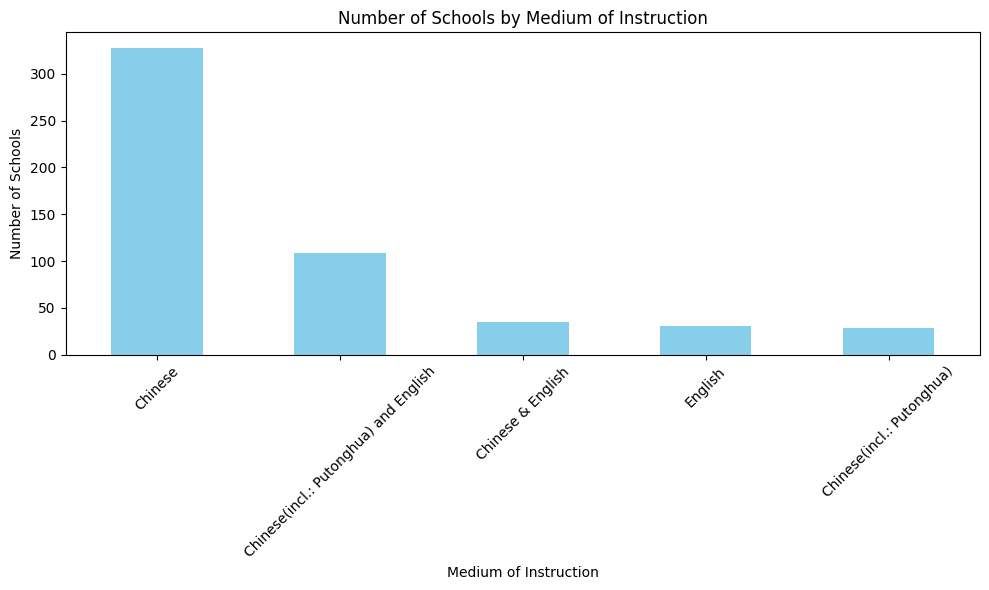

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the combined dataset
combined_df = pd.read_csv('/content/drive/MyDrive/COM6001 Group Project/Part 1 (Wing)'+'/final_school_profiles.csv')

# Count the number of schools for each medium of instruction
medium_counts = combined_df['medium_of_instruction'].value_counts()

# Print the counts for each medium
print(medium_counts)

# Plotting the results
plt.figure(figsize=(10, 6))
medium_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Schools by Medium of Instruction')
plt.xlabel('Medium of Instruction')
plt.ylabel('Number of Schools')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Fun insight:**
*   Predominantly Chinese instruction.
*   Significant bilingual instruction (Chinese and English).
*   Less frequent use of English alone.



# 1.4. Find the number of school using different mediums in 18 Districts

In [ ]:
import pandas as pd

# Load the combined dataset
combined_df = pd.read_csv('/content/drive/MyDrive/COM6001 Group Project/Part 1 (Wing)'+'/final_school_profiles.csv')

# Get unique mediums of instruction
unique_mediums = combined_df['district'].unique()

# Count the number of unique mediums
num_unique_mediums = len(unique_mediums)

# Print the results
print("Unique district:", unique_mediums)
print("Number of unique district:", num_unique_mediums)

Unique district: ['Central & Western' 'Southern' 'Eastern' 'Wan Chai' 'Islands'
 'Kowloon City' 'Kwun Tong' 'Kwai Tsing' 'North' 'Sai Kung' 'Sham Shui Po'
 'Sha Tin' 'Tuen Mun' 'Tai Po' 'Tsuen Wan' 'Wong Tai Sin' 'Yuen Long'
 'Yau Tsim  Mong']
Number of unique district: 18


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/COM6001 Group Project/Part 1 (Wing)'+'/final_school_profiles.csv')

# Count the number of schools in each district by medium of instruction
district_medium_count = df.groupby(['district', 'medium_of_instruction']).size().unstack(fill_value=0)

# Display the result
print(district_medium_count)

medium_of_instruction  Chinese  Chinese & English  Chinese(incl.: Putonghua)  \
district                                                                       
Central & Western           10                  2                          1   
Eastern                     22                  0                          4   
Islands                     10                  2                          1   
Kowloon City                23                  3                          3   
Kwai Tsing                  22                  2                          1   
Kwun Tong                   20                  3                          2   
North                       25                  2                          1   
Sai Kung                    14                  3                          2   
Sha Tin                     24                  3                          1   
Sham Shui Po                18                  2                          3   
Southern                    11          

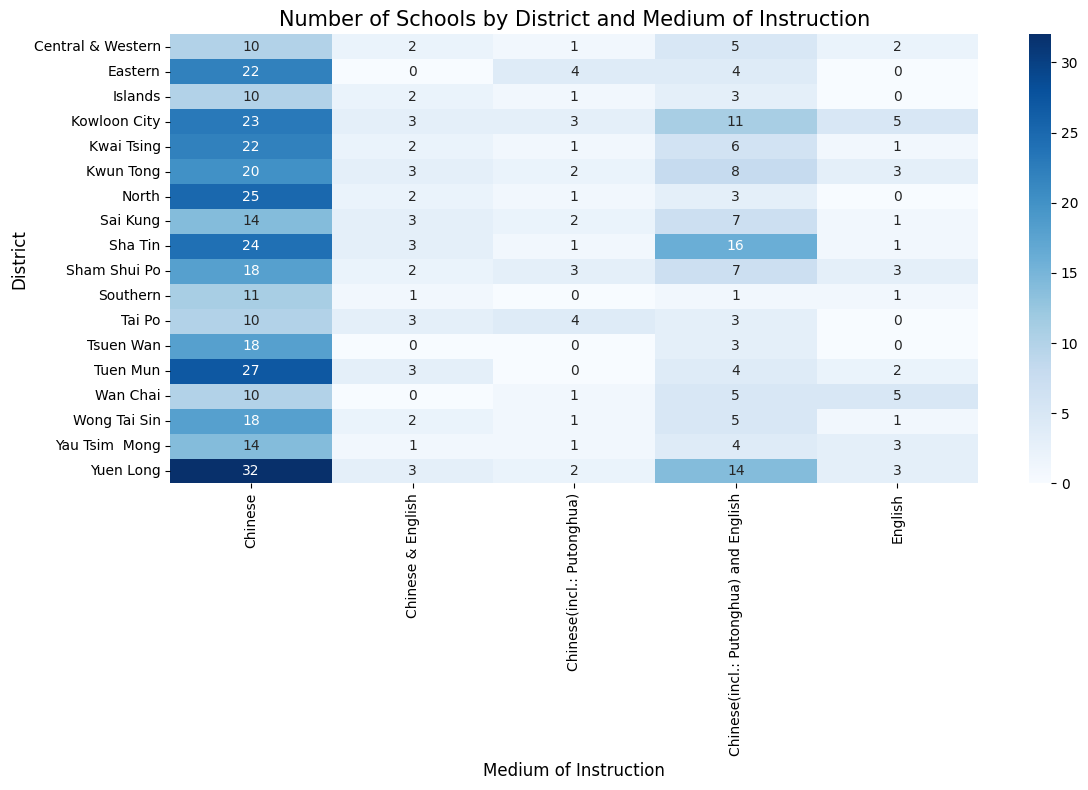

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/COM6001 Group Project/Part 1 (Wing)'+'/final_school_profiles.csv')

# Count the number of schools in each district by medium of instruction
district_medium_count = df.groupby(['district', 'medium_of_instruction']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(district_medium_count, annot=True, fmt='d', cmap='Blues')

# Adding titles and labels
plt.title('Number of Schools by District and Medium of Instruction', fontsize=15)
plt.xlabel('Medium of Instruction', fontsize=12)
plt.ylabel('District', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

**Fun Insight:**
*   Chinese Dominance: Predominantly used as the medium of instruction across all districts.
*   Yuen Long: Highest instances of Chinese (32) and some bilingual instruction (3).
*   Kowloon City: Strong bilingual presence with 23 in Chinese and 11 in Chinese (incl. Putonghua) and English.
*   Sha Tin: Significant bilingual instruction (16 instances of Chinese (incl. Putonghua) and English).
*   Central & Western: Moderate use of English (2 instances), alongside Chinese.
*   Low English Instances: Tsuen Wan and Tai Po show no English instruction, focusing primarily on Chinese.

# 1.5. Find the school type from different mediums of school

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/COM6001 Group Project/Part 1 (Wing)'+'/final_school_profiles.csv')

# Count the number of schools in each district by medium of instruction and school type
district_type_count = df.groupby(['district', 'medium_of_instruction', 'school_type_1']).size().unstack(fill_value=0)

# Display the result
print(district_type_count)

school_type_1                                            Aided  DSS  Gov't  \
district          medium_of_instruction                                      
Central & Western Chinese                                    7    0      2   
                  Chinese & English                          1    0      0   
                  Chinese(incl.: Putonghua)                  0    0      0   
                  Chinese(incl.: Putonghua) and English      5    0      0   
                  English                                    1    0      0   
...                                                        ...  ...    ...   
Yuen Long         Chinese                                   29    0      3   
                  Chinese & English                          3    0      0   
                  Chinese(incl.: Putonghua)                  2    0      0   
                  Chinese(incl.: Putonghua) and English     11    1      0   
                  English                                    0  

**1.5.1 Using "Chinese" as the medium of instruction**

In [ ]:
import pandas as pd

# Filter the DataFrame for schools with "Chinese" as the medium of instruction
chinese_schools = df[df['medium_of_instruction'] == 'Chinese']

# Count the number of schools in each district by school_type_1
district_type_count_chinese = chinese_schools.groupby(['district', 'school_type_1']).size().unstack(fill_value=0)

# Display the result
print(district_type_count_chinese)

school_type_1      Aided  DSS  Gov't  Private
district                                     
Central & Western      7    0      2        1
Eastern               17    0      3        2
Islands               10    0      0        0
Kowloon City          16    0      4        3
Kwai Tsing            22    0      0        0
Kwun Tong             18    0      2        0
North                 24    0      1        0
Sai Kung              12    0      2        0
Sha Tin               23    0      1        0
Sham Shui Po          13    1      2        2
Southern               8    1      2        0
Tai Po                 9    0      1        0
Tsuen Wan             16    0      2        0
Tuen Mun              26    0      1        0
Wan Chai               6    0      3        1
Wong Tai Sin          17    0      1        0
Yau Tsim  Mong        11    0      3        0
Yuen Long             29    0      3        0


school_type_1
Aided      284
DSS          2
Gov't       33
Private      9
dtype: int64


<ipython-input-12-49db77844bfc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_school_type_count.index, y=total_school_type_count.values, palette='viridis')


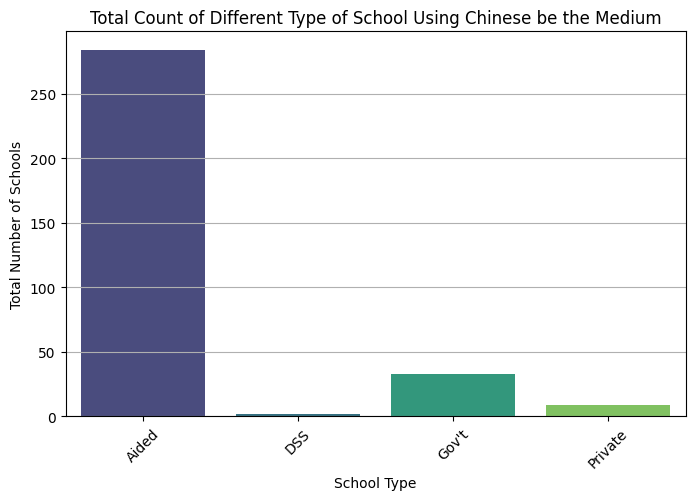

In [ ]:
# Calculate the total number of each type of school
total_school_type_count = district_type_count_chinese.sum()

# Display the total counts for each school type
print(total_school_type_count)

plt.figure(figsize=(8, 5))
sns.barplot(x=total_school_type_count.index, y=total_school_type_count.values, palette='viridis')
plt.title('Total Count of Different Type of School Using Chinese be the Medium')
plt.xlabel('School Type')
plt.ylabel('Total Number of Schools')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**1.5.2 Using "English" as the medium of instruction**

In [ ]:
# Filter the DataFrame for schools with "English" as the medium of instruction
english_schools = df[df['medium_of_instruction'] == 'English']

# Count the number of schools in each district by school_type_1
district_type_count_english = english_schools.groupby(['district', 'school_type_1']).size().unstack(fill_value=0)

# Display the result
print(district_type_count_english)

school_type_1      Aided  DSS  Gov't  Private
district                                     
Central & Western      1    0      0        1
Kowloon City           2    2      0        1
Kwai Tsing             0    1      0        0
Kwun Tong              1    1      0        1
Sai Kung               0    1      0        0
Sha Tin                0    1      0        0
Sham Shui Po           0    1      1        1
Southern               0    0      0        1
Tuen Mun               1    1      0        0
Wan Chai               3    0      1        1
Wong Tai Sin           1    0      0        0
Yau Tsim  Mong         0    2      0        1
Yuen Long              0    1      0        2


school_type_1
Aided       9
DSS        11
Gov't       2
Private     9
dtype: int64


<ipython-input-14-2565c681baa3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_school_type_count.index, y=total_school_type_count.values, palette='viridis')


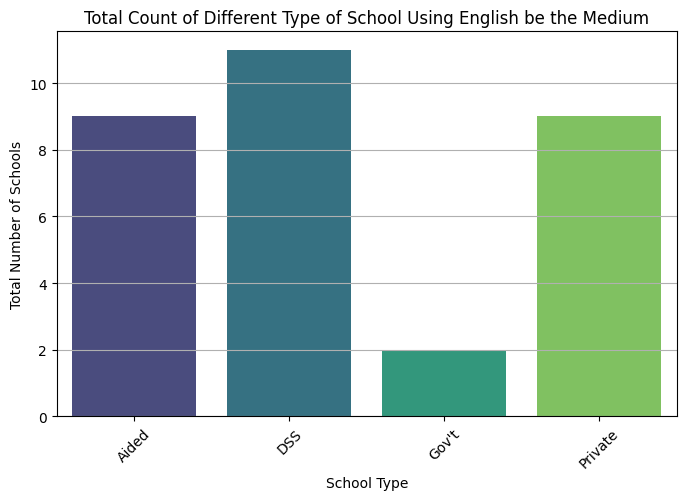

In [ ]:
# Calculate the total number of each type of school
total_school_type_count = district_type_count_english.sum()

# Display the total counts for each school type
print(total_school_type_count)

plt.figure(figsize=(8, 5))
sns.barplot(x=total_school_type_count.index, y=total_school_type_count.values, palette='viridis')
plt.title('Total Count of Different Type of School Using English be the Medium')
plt.xlabel('School Type')
plt.ylabel('Total Number of Schools')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**1.5.3 Using "Chinese & English" as the medium of instruction**

In [ ]:
# Filter the DataFrame for schools with "Chinese & English" as the medium of instruction
chinese_english_schools = df[df['medium_of_instruction'] == 'Chinese & English']

# Count the number of schools in each district by school_type_1
district_type_count_chinese_english = chinese_english_schools.groupby(['district', 'school_type_1']).size().unstack(fill_value=0)

# Display the result
print(district_type_count_chinese_english)

school_type_1      Aided  DSS  Private
district                              
Central & Western      1    0        1
Islands                2    0        0
Kowloon City           1    0        2
Kwai Tsing             2    0        0
Kwun Tong              3    0        0
North                  2    0        0
Sai Kung               1    2        0
Sha Tin                3    0        0
Sham Shui Po           0    1        1
Southern               1    0        0
Tai Po                 3    0        0
Tuen Mun               3    0        0
Wong Tai Sin           0    0        2
Yau Tsim  Mong         1    0        0
Yuen Long              3    0        0


school_type_1
Aided      26
DSS         3
Private     6
dtype: int64


<ipython-input-16-f96e8793436b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_school_type_count.index, y=total_school_type_count.values, palette='viridis')


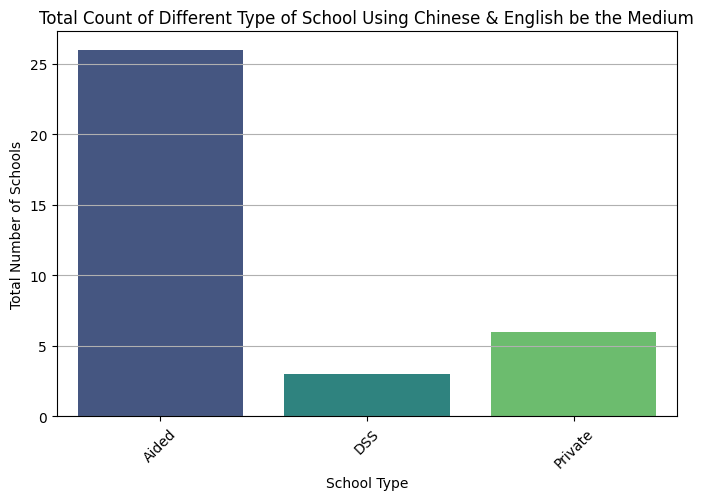

In [ ]:
# Calculate the total number of each type of school
total_school_type_count = district_type_count_chinese_english.sum()

# Display the total counts for each school type
print(total_school_type_count)

plt.figure(figsize=(8, 5))
sns.barplot(x=total_school_type_count.index, y=total_school_type_count.values, palette='viridis')
plt.title('Total Count of Different Type of School Using Chinese & English be the Medium')
plt.xlabel('School Type')
plt.ylabel('Total Number of Schools')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**1.5.4 Using "Chinese(incl.: Putonghua)" as the medium of instruction**

In [ ]:
# Filter the DataFrame for schools with "Chinese(incl.: Putonghua)" as the medium of instruction
chinese_putonghua_schools = df[df['medium_of_instruction'] == 'Chinese(incl.: Putonghua)']

# Count the number of schools in each district by school_type_1
district_type_count_chinese_putonghua = chinese_putonghua_schools.groupby(['district', 'school_type_1']).size().unstack(fill_value=0)

# Display the result
print(district_type_count_chinese_putonghua)

school_type_1      Aided  Private
district                         
Central & Western      0        1
Eastern                4        0
Islands                1        0
Kowloon City           3        0
Kwai Tsing             1        0
Kwun Tong              2        0
North                  1        0
Sai Kung               2        0
Sha Tin                1        0
Sham Shui Po           3        0
Tai Po                 4        0
Wan Chai               1        0
Wong Tai Sin           1        0
Yau Tsim  Mong         1        0
Yuen Long              2        0


school_type_1
Aided      27
Private     1
dtype: int64


<ipython-input-18-99ece6c24f4f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_school_type_count.index, y=total_school_type_count.values, palette='viridis')


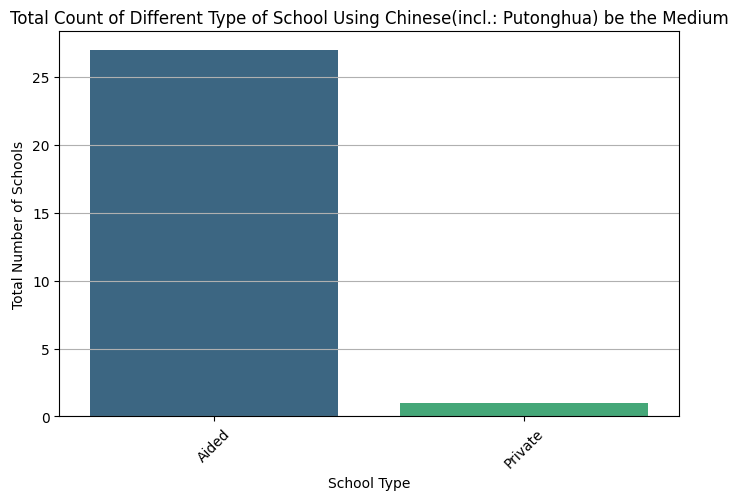

In [ ]:
# Calculate the total number of each type of school
total_school_type_count = district_type_count_chinese_putonghua.sum()

# Display the total counts for each school type
print(total_school_type_count)

plt.figure(figsize=(8, 5))
sns.barplot(x=total_school_type_count.index, y=total_school_type_count.values, palette='viridis')
plt.title('Total Count of Different Type of School Using Chinese(incl.: Putonghua) be the Medium')
plt.xlabel('School Type')
plt.ylabel('Total Number of Schools')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**1.5.5 Using "Chinese(incl.: Putonghua) and English" as the medium of instruction**

In [ ]:
# Filter the DataFrame for schools with "Chinese(incl.: Putonghua) and English" as the medium of instruction
chinese_putonghua_english_schools = df[df['medium_of_instruction'] == 'Chinese(incl.: Putonghua) and English']

# Count the number of schools in each district by school_type_1
district_type_count_chinese_putonghua_english = chinese_putonghua_english_schools.groupby(['district', 'school_type_1']).size().unstack(fill_value=0)

# Display the result
print(district_type_count_chinese_putonghua_english)

school_type_1      Aided  DSS  Private
district                              
Central & Western      5    0        0
Eastern                2    2        0
Islands                3    0        0
Kowloon City           7    0        4
Kwai Tsing             6    0        0
Kwun Tong              8    0        0
North                  3    0        0
Sai Kung               6    1        0
Sha Tin               15    1        0
Sham Shui Po           4    0        3
Southern               0    1        0
Tai Po                 3    0        0
Tsuen Wan              3    0        0
Tuen Mun               4    0        0
Wan Chai               1    0        4
Wong Tai Sin           4    0        1
Yau Tsim  Mong         4    0        0
Yuen Long             11    1        2


school_type_1
Aided      89
DSS         6
Private    14
dtype: int64


<ipython-input-20-768279de5c5a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_school_type_count.index, y=total_school_type_count.values, palette='viridis')


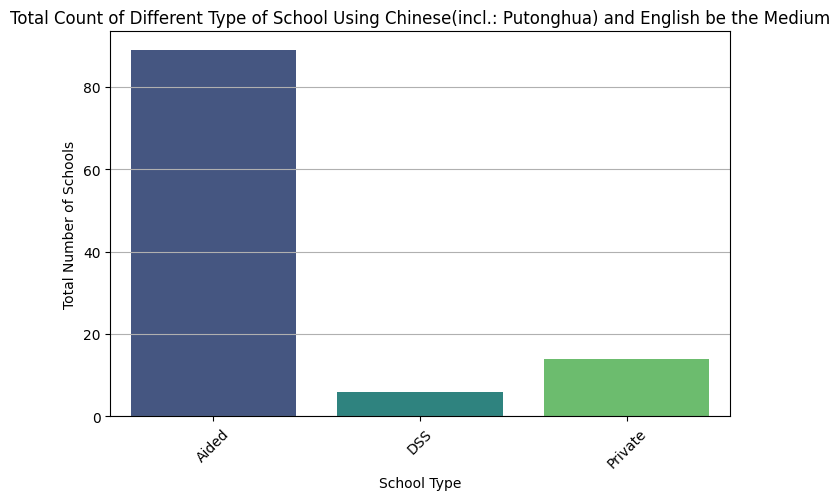

In [ ]:
# Calculate the total number of each type of school
total_school_type_count = district_type_count_chinese_putonghua_english.sum()

# Display the total counts for each school type
print(total_school_type_count)

plt.figure(figsize=(8, 5))
sns.barplot(x=total_school_type_count.index, y=total_school_type_count.values, palette='viridis')
plt.title('Total Count of Different Type of School Using Chinese(incl.: Putonghua) and English be the Medium')
plt.xlabel('School Type')
plt.ylabel('Total Number of Schools')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**1.5.6 Comparison**

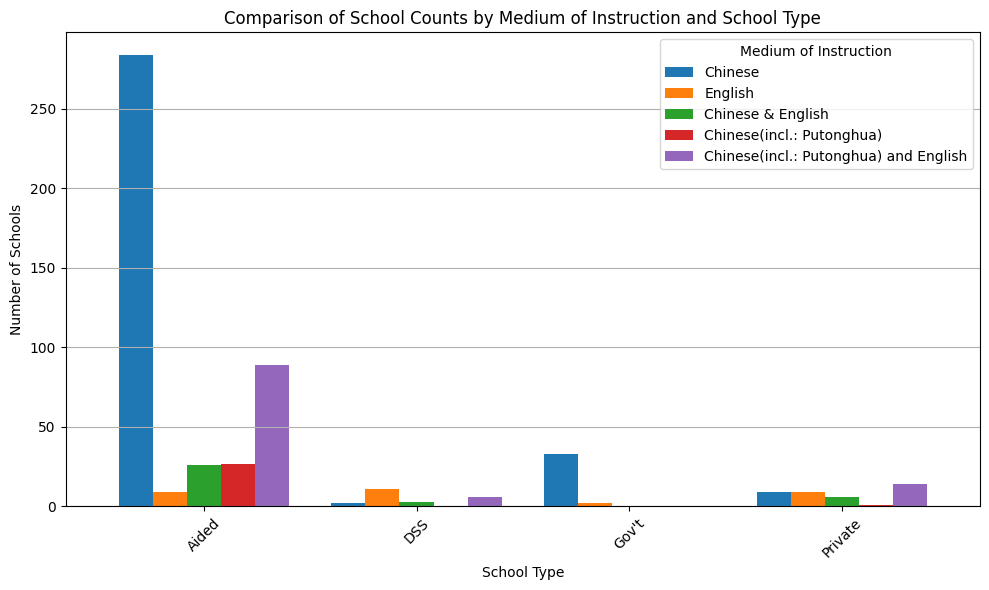

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for each medium of instruction
mediums = [
    'Chinese',
    'English',
    'Chinese & English',
    'Chinese(incl.: Putonghua)',
    'Chinese(incl.: Putonghua) and English'
]

# Create an empty DataFrame to store counts
school_type_counts = {medium: df[df['medium_of_instruction'] == medium]['school_type_1'].value_counts() for medium in mediums}

# Convert to DataFrame for easier plotting
comparison_df = pd.DataFrame(school_type_counts).fillna(0)

# Plotting the grouped bar chart
comparison_df.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Comparison of School Counts by Medium of Instruction and School Type')
plt.xlabel('School Type')
plt.ylabel('Number of Schools')
plt.xticks(rotation=45)
plt.legend(title='Medium of Instruction')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

1.5.6.1 Count of Private Schools by Medium of Instruction

medium_of_instruction
Chinese(incl.: Putonghua) and English    14
Chinese                                   9
English                                   9
Chinese & English                         6
Chinese(incl.: Putonghua)                 1
Name: count, dtype: int64


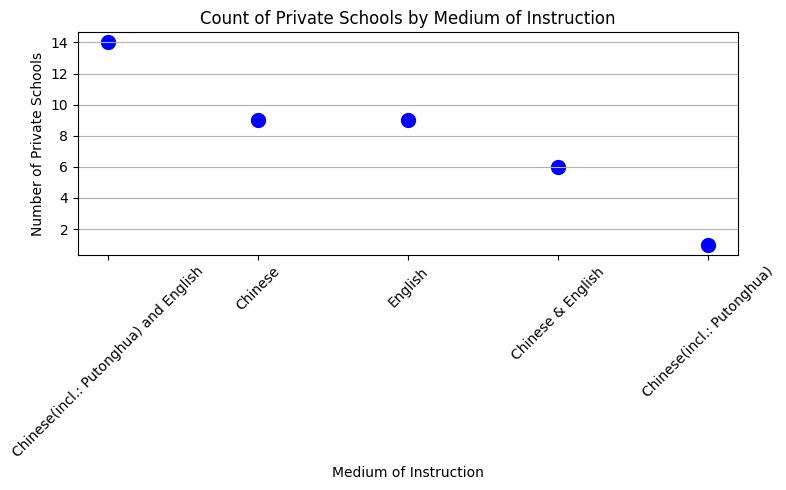

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame for private schools
private_schools = df[df['school_type_1'] == 'Private']

# Count the number of private schools by medium of instruction
private_school_counts = private_schools['medium_of_instruction'].value_counts()

# Display the result
print(private_school_counts)

# Plotting the scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(private_school_counts.index, private_school_counts.values, color='blue', s=100)  # 's' controls the size of the points
plt.title('Count of Private Schools by Medium of Instruction')
plt.xlabel('Medium of Instruction')
plt.ylabel('Number of Private Schools')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

1.5.6.2 Count of Government Schools by Medium of Instruction

medium_of_instruction
Chinese    33
English     2
Name: count, dtype: int64


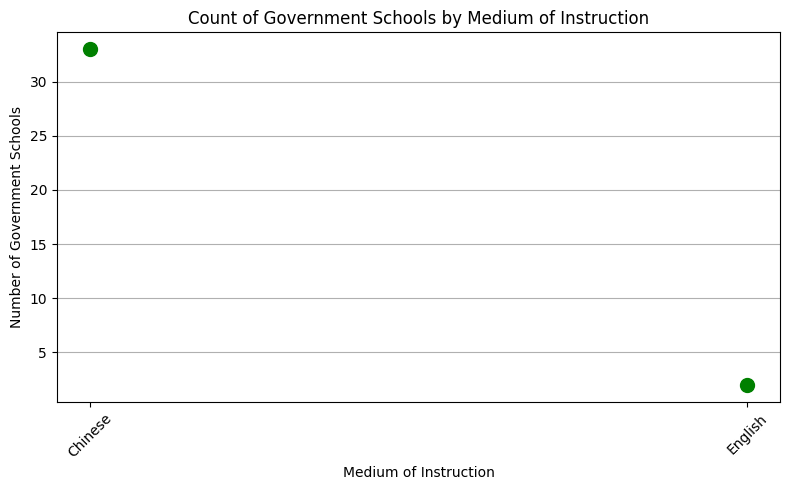

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame for government schools
govt_schools = df[df['school_type_1'] == 'Gov\'t']

# Count the number of government schools by medium of instruction
govt_school_counts = govt_schools['medium_of_instruction'].value_counts()

# Display the result
print(govt_school_counts)

# Plotting the scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(govt_school_counts.index, govt_school_counts.values, color='green', s=100)  # 's' controls the size of the points
plt.title('Count of Government Schools by Medium of Instruction')
plt.xlabel('Medium of Instruction')
plt.ylabel('Number of Government Schools')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

1.5.6.3 Count of DSS Schools by Medium of Instruction

medium_of_instruction
English                                  11
Chinese(incl.: Putonghua) and English     6
Chinese & English                         3
Chinese                                   2
Name: count, dtype: int64


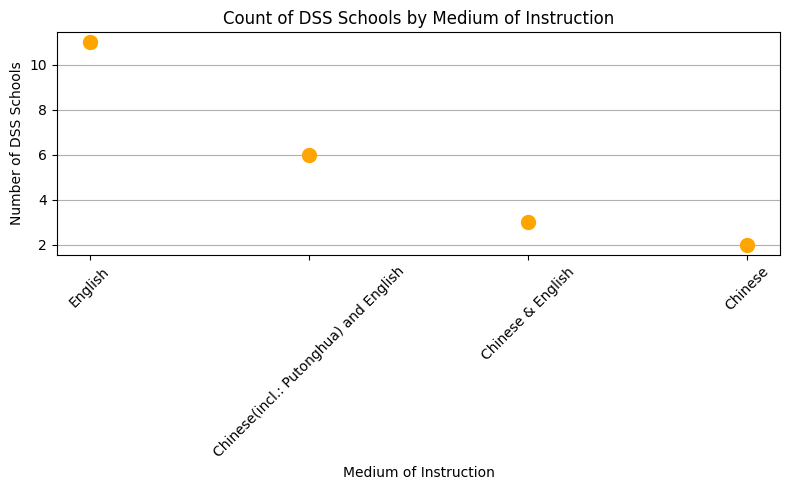

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame for DSS schools
dss_schools = df[df['school_type_1'] == 'DSS']

# Count the number of DSS schools by medium of instruction
dss_school_counts = dss_schools['medium_of_instruction'].value_counts()

# Display the result
print(dss_school_counts)

# Plotting the scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(dss_school_counts.index, dss_school_counts.values, color='orange', s=100)  # 's' controls the size of the points
plt.title('Count of DSS Schools by Medium of Instruction')
plt.xlabel('Medium of Instruction')
plt.ylabel('Number of DSS Schools')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

1.5.6.4 Count of Aided Schools by Medium of Instruction

medium_of_instruction
Chinese                                  284
Chinese(incl.: Putonghua) and English     89
Chinese(incl.: Putonghua)                 27
Chinese & English                         26
English                                    9
Name: count, dtype: int64


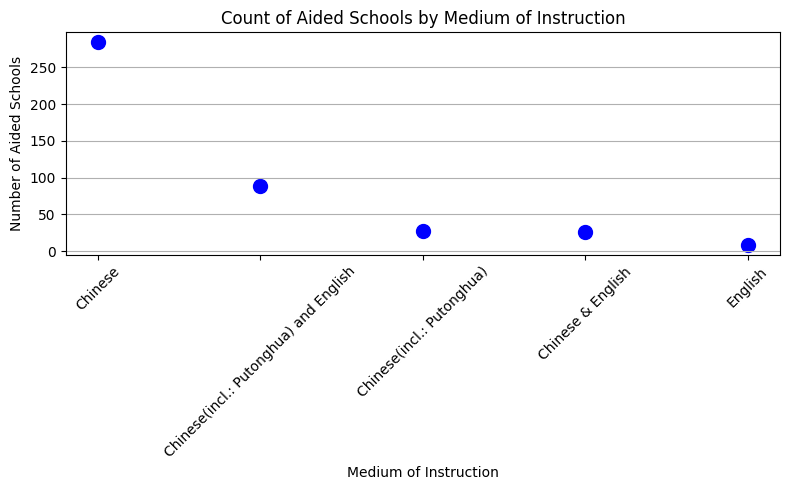

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame for Aided schools
aided_schools = df[df['school_type_1'] == 'Aided']

# Count the number of Aided schools by medium of instruction
aided_school_counts = aided_schools['medium_of_instruction'].value_counts()

# Display the result
print(aided_school_counts)

# Plotting the scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(aided_school_counts.index, aided_school_counts.values, color='blue', s=100)  # 's' controls the size of the points
plt.title('Count of Aided Schools by Medium of Instruction')
plt.xlabel('Medium of Instruction')
plt.ylabel('Number of Aided Schools')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 1.6. Conclusion

In [ ]:
import pandas as pd
import plotly.express as px

# Load the data from the CSV file
combined_df = pd.read_csv('/content/drive/MyDrive/COM6001 Group Project/Part 1 (Wing)/final_school_profiles.csv')

# Grouping the data by school type, medium of instruction, and school name
grouped_data = combined_df.groupby(['school_type_1', 'medium_of_instruction', 'school_name']).size().reset_index(name='count')

# Create a sunburst chart
fig = px.sunburst(
    grouped_data,
    path=['school_type_1', 'medium_of_instruction', 'school_name'],
    values='count',
    title='Distribution of Schools by Type, Medium of Instruction, and School Name'
)

# Show the figure
fig.show()

**Fun Insight:**


*   Government Schools only has "Chinese" and "English" be the medium
*   Most of the primary school is aided school
*   Private school and DSS school across various medium are relatively average

# 1.7. summarize and describe Hong Kong’s primary schools various characteristics

**Medium of Instruction**
1. Chinese:
- Predominantly used across most districts.
- Notable districts include Kowloon City (16 aided schools), North (24 aided schools), and Sha Tin (23 aided schools).
- A few schools also offer instruction in Putonghua.

2. Chinese & English:
- Available in several districts, facilitating bilingual education.
- Significant presence in Kowloon City (7 aided schools) and Sha Tin (15 aided schools).

3. English:
- Less common, with a few districts like Kowloon City (2 aided schools) and Wan Chai (3 aided schools) providing English medium instruction.

4. Chinese (incl. Putonghua):
- Found mainly in Central & Western and Eastern districts, with a focus on Chinese language proficiency.

5. Chinese (incl. Putonghua) and English:
- Offered in select districts, enhancing bilingual capabilities, especially in urban areas like Kowloon City.


**School Types**
1. Aided Schools:
- Predominant in most districts, especially those using Chinese as the medium of instruction.
- Kowloon City and Sha Tin have a substantial number of aided schools compared to other types.

2. Direct Subsidy Scheme (DSS):
- Present in various districts, providing some flexibility in curriculum and teaching methods.
- Notable DSS presence in Kowloon City and Sha Tin.

3. Government Schools:
- Limited in number, primarily offering Chinese medium instruction.
- Found in districts like Sham Shui Po and North.

4. Private Schools:
- Offer diverse curricula and are found in most districts, particularly in Central & Western and Kowloon City.

**District Insights**
1. Central & Western:
- Offers a mix of Chinese, English, and Chinese & English instruction with both aided and private schools.

2. Kowloon City:
- Diverse offerings with notable aided and DSS schools, emphasizing bilingual education.

3. Sha Tin:
- High number of aided schools with a strong focus on Chinese medium instruction.

4. Eastern:
- Predominantly Chinese medium with a significant number of aided schools.


# **2 Use aggregate statistics to show different patterns in different groups**

### 2.1 Load the Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/Computing With Big Data/Group Project/Datasets/'
data = pd.read_csv(path+'primary school code and list.csv')
data2019 = pd.read_csv(path+'psp_2019_tc.csv')

### 2.2 Data preprocessing

Drop the useless column

In [ ]:
data_dropped = data.drop('Unnamed: 0', axis=1)

Rename the data_dropped

In [ ]:
data_dropped.rename(columns={'District': '區域', 'Sub_District': '子區域', 'School Code': '學校代碼', 'School Name': '學校名稱'}, inplace=True)

Drop those columns that are meaningless in the whole datasets

In [ ]:
dataframes = {
    2019: data2019
}

columns_to_keep = ['區域','學校名稱','學校類別1','學生性別','教學語言','課室數目','教師總人數','學士人數百分率',
                   '碩士_博士或以上人數百分率','特殊教育培訓人數百分率','0至4年經驗人數百分率',
                   '5至9年經驗人數百分率','10年經驗或以上人數百分率','本學年小一班數','本學年小二班數',
                   '本學年小三班數','本學年小四班數','本學年小五班數','本學年小六班數','本學年總班數',
                   '全年全科測驗次數','每日一般上課節數','每節一般時間']

for year, df in dataframes.items():
    all_columns = df.columns.tolist()
    columns_to_drop = [col for col in all_columns if col not in columns_to_keep]
    df_dropped = df.drop(columns=columns_to_drop)
    dataframes[year] = df_dropped


data2019_dropped = dataframes[2019]

In [ ]:
data2019_dropped.columns

Index(['區域', '學校名稱', '學校類別1', '學生性別', '教學語言', '課室數目', '教師總人數', '學士人數百分率',
       '碩士_博士或以上人數百分率', '特殊教育培訓人數百分率', '0至4年經驗人數百分率', '5至9年經驗人數百分率',
       '10年經驗或以上人數百分率', '本學年小一班數', '本學年小二班數', '本學年小三班數', '本學年小四班數', '本學年小五班數',
       '本學年小六班數', '本學年總班數', '全年全科測驗次數', '每日一般上課節數', '每節一般時間'],
      dtype='object')

### 2.3 Data Cleaning



1.   Merge the tables(data_dropped with 2019)


In [ ]:
merged_data2019 = pd.merge(data_dropped, data2019_dropped, on='學校名稱', how='inner')
merged_data2019.rename(columns={'區域_x': '區域'}, inplace=True)
merged_data2019.drop(columns=['區域_y'], inplace=True)
merged_data2019

區域  子區域    學校代碼          學校名稱 學校類別1 學生性別           教學語言  課室數目  教師總人數  \
0    港島  中西區  AP0078     中西區聖安多尼學校    資助   男女             中文    18     36   
1    港島  中西區  AP0052      天主教總堂區學校    資助   男女             英文    24     36   
2    港島  中西區  AP0311          李陞小學    官立   男女             中文    12     25   
3    港島  中西區  AP0280     英皇書院同學會小學    資助   男女  中文（包括:普通話）及英文    12     24   
4    港島  中西區  AP0281  英皇書院同學會小學第二校    資助   男女             中文    18     34   
..   ..  ...     ...           ...   ...  ...            ...   ...    ...   
485  新界  西貢區  AP0566   順德聯誼總會梁潔華小學    資助   男女             中文    30     52   
486  新界  西貢區  AP0430    聖公會將軍澳基德小學    資助   男女             中文    30     47   
487  新界  西貢區  AP0135          播道書院    直資   男女             英文    30     68   
488  新界  西貢區  AP0319       樂善堂劉德學校    資助   男女             中文    24     23   
489  新界  西貢區  AP0153    優才（楊殷有娣）書院    直資   男女          中文及英文    34     54   

     學士人數百分率  ...  本學年小一班數  本學年小二班數  本學年小三班數  本學年小四班數  本學年小五班數  本學年小六班數  \
0        100  ...      3.0      3.0      3.0      3.0        3      3.0   
1         95  ...      3.0      4.0      4.0      4.0        4      4.0   
2         92  ...      2.0      2.0      2.0      2.0        2      2.0   
3        100  ...      2.0      2.0      2.0      2.0        2      2.0   
4        100  ...      3.0      3.0      3.0      3.0        3      3.0   
..       ...  ...      ...      ...      ...      ...      ...      ...   
485       98  ...      5.0      5.0      5.0      5.0        5      5.0   
486      100  ...      5.0      5.0      5.0      4.0        4      4.0   
487       75  ...      5.0      5.0      5.0      5.0        5      5.0   
488       96  ...      2.0      2.0      3.0      1.0        1      2.0   
489      100  ...      4.0      4.0      4.0      4.0        4      4.0   

     本學年總班數  全年全科測驗次數  每日一般上課節數  每節一般時間  
0        18         2         9      35  
1        23         2         9      35  
2        12         2         8      35  
3        12         1         9      35  
4        18         2        10      30  
..      ...       ...       ...     ...  
485      30         0         8      35  
486      27         2        10      30  
487      30         0        10      35  
488      11         2         9      40  
489      24         1         9      35  

[490 rows x 25 columns]


2.   Check if there are missing values




In [ ]:
missing_values = merged_data2019.isnull().sum()
print(missing_values)
has_missing_values = merged_data2019.isnull().values.any()
print("数据集中是否存在缺失值:", has_missing_values)

區域               0
子區域              0
學校代碼             0
學校名稱             0
學校類別1            0
學生性別             0
教學語言             0
課室數目             0
教師總人數            0
學士人數百分率          0
碩士_博士或以上人數百分率    0
特殊教育培訓人數百分率      0
0至4年經驗人數百分率      0
5至9年經驗人數百分率      0
10年經驗或以上人數百分率    0
本學年小一班數          4
本學年小二班數          1
本學年小三班數          2
本學年小四班數          2
本學年小五班數          0
本學年小六班數          3
本學年總班數           0
全年全科測驗次數         0
每日一般上課節數         0
每節一般時間           0
dtype: int64
数据集中是否存在缺失值: True




*   Handle with the missing values



In [ ]:
# Mean values
mean_value2019_1 = merged_data2019['本學年小一班數'].mean()
mean_value2019_2 = merged_data2019['本學年小二班數'].mean()
mean_value2019_3 = merged_data2019['本學年小三班數'].mean()
mean_value2019_4 = merged_data2019['本學年小四班數'].mean()
mean_value2019_5 = merged_data2019['本學年小六班數'].mean()
# Median values
median_value2019_1 = merged_data2019['本學年小一班數'].median()
median_value2019_2 = merged_data2019['本學年小二班數'].median()
median_value2019_3 = merged_data2019['本學年小三班數'].median()
median_value2019_4 = merged_data2019['本學年小四班數'].median()
median_value2019_5 = merged_data2019['本學年小六班數'].median()

# Mode values
mode_value2019_1 = merged_data2019['本學年小一班數'].mode().iloc[0]
mode_value2019_2 = merged_data2019['本學年小二班數'].mode().iloc[0]
mode_value2019_3 = merged_data2019['本學年小三班數'].mode().iloc[0]
mode_value2019_4 = merged_data2019['本學年小四班數'].mode().iloc[0]
mode_value2019_5 = merged_data2019['本學年小六班數'].mode().iloc[0]

print(f"平均数: {mean_value2019_1, mean_value2019_2, mean_value2019_3, mean_value2019_4, mean_value2019_5}")
print(f"中位数: {median_value2019_1, median_value2019_2, median_value2019_3, median_value2019_4, median_value2019_5}")
print(f"众数: {mode_value2019_1, mode_value2019_2, mode_value2019_3, mode_value2019_4, mode_value2019_5}")

平均数: (3.960905349794239, 4.118609406952965, 4.120901639344262, 4.016393442622951, 3.9856262833675564)
中位数: (4.0, 4.0, 4.0, 4.0, 4.0)
众数: (4.0, 4.0, 4.0, 4.0, 4.0)


**Result:**

*   According to the results, the mean, median, mode values are all close to 4, so 4 will be used to fill in the missing values later



*   Fill in the missing values with number of 4




In [ ]:
merged_data2019 = merged_data2019.fillna(4)



*   Check the missing value again



In [ ]:
missing_values = merged_data2019.isnull().sum()
print(missing_values)
has_missing_values = merged_data2019.isnull().values.any()
print("数据集中是否存在缺失值:", has_missing_values)

區域               0
子區域              0
學校代碼             0
學校名稱             0
學校類別1            0
學生性別             0
教學語言             0
課室數目             0
教師總人數            0
學士人數百分率          0
碩士_博士或以上人數百分率    0
特殊教育培訓人數百分率      0
0至4年經驗人數百分率      0
5至9年經驗人數百分率      0
10年經驗或以上人數百分率    0
本學年小一班數          0
本學年小二班數          0
本學年小三班數          0
本學年小四班數          0
本學年小五班數          0
本學年小六班數          0
本學年總班數           0
全年全科測驗次數         0
每日一般上課節數         0
每節一般時間           0
dtype: int64
数据集中是否存在缺失值: False




*   Convert the column into the type 'int'



In [ ]:
def clean_and_convert(value):
    try:
        # Replace all non-numeric characters (except decimal point) using regular expression
        cleaned_value = pd.to_numeric(value.split('/')[0], errors='coerce')
        return int(cleaned_value) if not pd.isna(cleaned_value) else 0
    except:
        return 0

merged_data2019['每節一般時間'] = merged_data2019['每節一般時間'].apply(clean_and_convert)

3.   Divide the whole data into categorial part and numerical part


In [ ]:
import numpy as np

categorical_columns = merged_data2019.select_dtypes(exclude= np.number)
numerical_columns = merged_data2019.select_dtypes(include= np.number)

categorical_uniques = categorical_columns.nunique()
numerical_describe = numerical_columns.describe()

print("分类列的唯一值数量：")
print(categorical_uniques)
print("\n数值列的描述性统计：")
print(numerical_describe)

分类列的唯一值数量：
區域         3
子區域       18
學校代碼     489
學校名稱     489
學校類別1      4
學生性別       3
教學語言       5
dtype: int64

数值列的描述性统计：
             課室數目       教師總人數     學士人數百分率  碩士_博士或以上人數百分率  特殊教育培訓人數百分率  \
count  490.000000  490.000000  490.000000     490.000000   490.000000   
mean    25.200000   49.004082   96.777551      32.504082    39.120408   
std      6.879685   14.424898    6.619169      10.942917    16.641283   
min      6.000000   12.000000   48.000000       8.000000     0.000000   
25%     24.000000   41.000000   96.000000      25.000000    30.000000   
50%     25.000000   50.000000   98.000000      31.500000    40.000000   
75%     30.000000   57.000000  100.000000      39.000000    49.000000   
max     76.000000  166.000000  100.000000      73.000000   100.000000   

       0至4年經驗人數百分率  5至9年經驗人數百分率  10年經驗或以上人數百分率     本學年小一班數     本學年小二班數  \
count   490.000000   490.000000     490.000000  490.000000  490.000000   
mean     22.820408    14.083673      63.095918    3.961224    4.118



4.   Solve the problem that Traditional Chinese cannot be displayed



In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.7/dist-packages/matplotlib//mpl-data/fonts/ttf

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

--2024-12-06 08:14:56--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 108.177.125.100, 108.177.125.101, 108.177.125.113, ...
Connecting to drive.google.com (drive.google.com)|108.177.125.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-12-06 08:14:57--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.187.132, 2404:6800:4008:c05::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.187.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘taipei_sans_tc_beta.ttf’

taipei_sans_tc_beta 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2024-12-06 08:15:0

In [ ]:
font_path = '/content/taipei_sans_tc_beta.ttf'
fm.fontManager.addfont(font_path)
prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = prop.get_name()
sns.set(font=prop.get_name(), style="whitegrid")



5.   Divide the data into 3 categories.
*   Number of classrooms
*   Teachers information
*   Students information

*   Then check all the outliers of these 3 categories



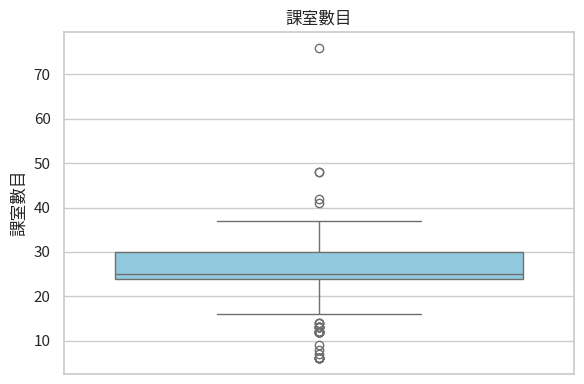

<ipython-input-16-725c6ea0250b>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Teacher Category', y='Percentage', data=teacher_data, palette='Set2')


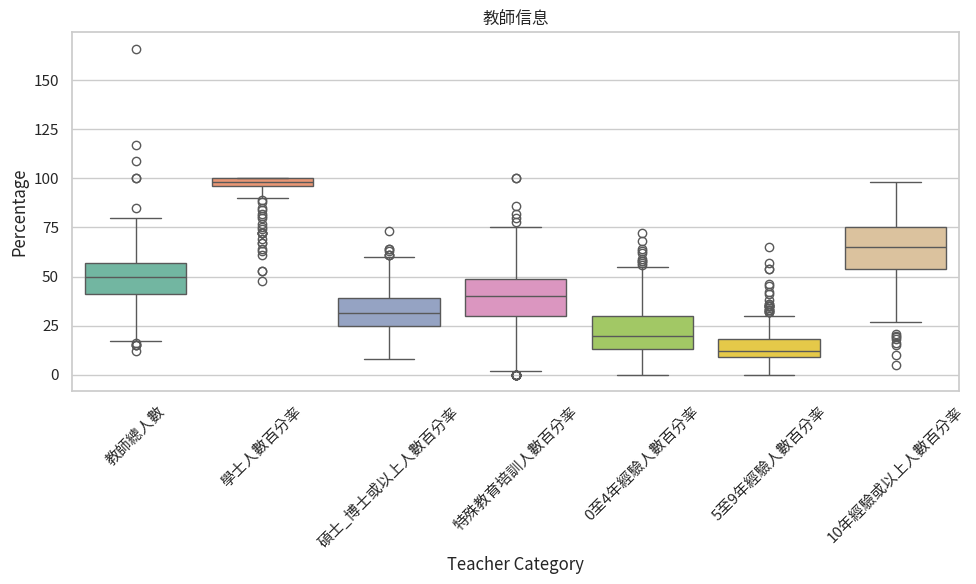

<ipython-input-16-725c6ea0250b>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Student Category', y='Count', data=student_data, palette='Set1')


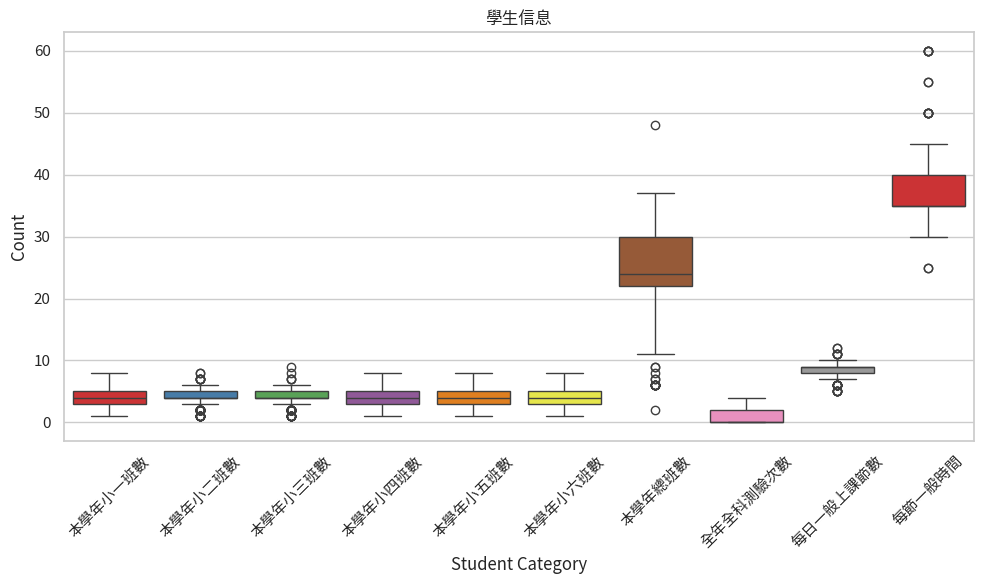

In [ ]:
teacher_columns = [
    '教師總人數', '學士人數百分率', '碩士_博士或以上人數百分率',
    '特殊教育培訓人數百分率', '0至4年經驗人數百分率', '5至9年經驗人數百分率',
    '10年經驗或以上人數百分率'
]

student_columns = [
    '本學年小一班數', '本學年小二班數', '本學年小三班數',
    '本學年小四班數', '本學年小五班數', '本學年小六班數',
    '本學年總班數', '全年全科測驗次數', '每日一般上課節數', '每節一般時間'
]

# Reorganize data into long format
teacher_data = merged_data2019[teacher_columns].melt(var_name='Teacher Category', value_name='Percentage')
student_data = merged_data2019[student_columns].melt(var_name='Student Category', value_name='Count')

plt.figure(figsize=(6, 4))
sns.boxplot(y=merged_data2019['課室數目'], color='skyblue')
plt.title('課室數目')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Teacher Category', y='Percentage', data=teacher_data, palette='Set2')
plt.title('教師信息')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Student Category', y='Count', data=student_data, palette='Set1')
plt.title('學生信息')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Result:**

*   The outliers can be seen clearly, but maybe these values are meaningful in the analysis later


In [ ]:
import plotly.express as px

df = pd.DataFrame(merged_data2019)

agg_columns = [
    '課室數目', '教師總人數', '學士人數百分率', '碩士_博士或以上人數百分率',
    '特殊教育培訓人數百分率', '0至4年經驗人數百分率', '5至9年經驗人數百分率',
    '10年經驗或以上人數百分率', '本學年小一班數', '本學年小二班數',
    '本學年小三班數', '本學年小四班數', '本學年小五班數', '本學年小六班數',
    '本學年總班數', '全年全科測驗次數', '每日一般上課節數', '每節一般時間'
]

df_agg = df.groupby(['區域', '子區域', '學校類別1'], as_index=False)[agg_columns].sum()

df_agg['區域_合計'] = df_agg.groupby('區域')[agg_columns].transform('sum')['課室數目']
df_agg['子區域_合計'] = df_agg.groupby('子區域')[agg_columns].transform('sum')['課室數目']

fig = px.sunburst(df_agg,
                  path=['區域', '子區域', '學校類別1'],
                  values='課室數目',
                  hover_name='學校類別1',
                  hover_data={
                      '課室數目': True,
                      '教師總人數': True,
                      '學士人數百分率': True,
                      '碩士_博士或以上人數百分率': True,
                      '特殊教育培訓人數百分率': True,
                      '0至4年經驗人數百分率': True,
                      '5至9年經驗人數百分率': True,
                      '10年經驗或以上人數百分率': True,
                      '本學年小一班數': True,
                      '本學年小二班數': True,
                      '本學年小三班數': True,
                      '本學年小四班數': True,
                      '本學年小五班數': True,
                      '本學年小六班數': True,
                      '本學年總班數': True,
                      '全年全科測驗次數': True,
                      '每日一般上課節數': True,
                      '每節一般時間': True,
                      '區域_合計': True,
                      '子區域_合計': True,
                  },
                  title="學區總體數據分布 Sunburst 圖")

fig.update_layout(
    width=800,
    height=600,
)

fig.show()


### 2.4 Group and analyze patterns across different groups

#### 2.4.1 Classify by major category and view the general situation and distribution of data




1.   Analysis based on the three major regions of Hong Kong

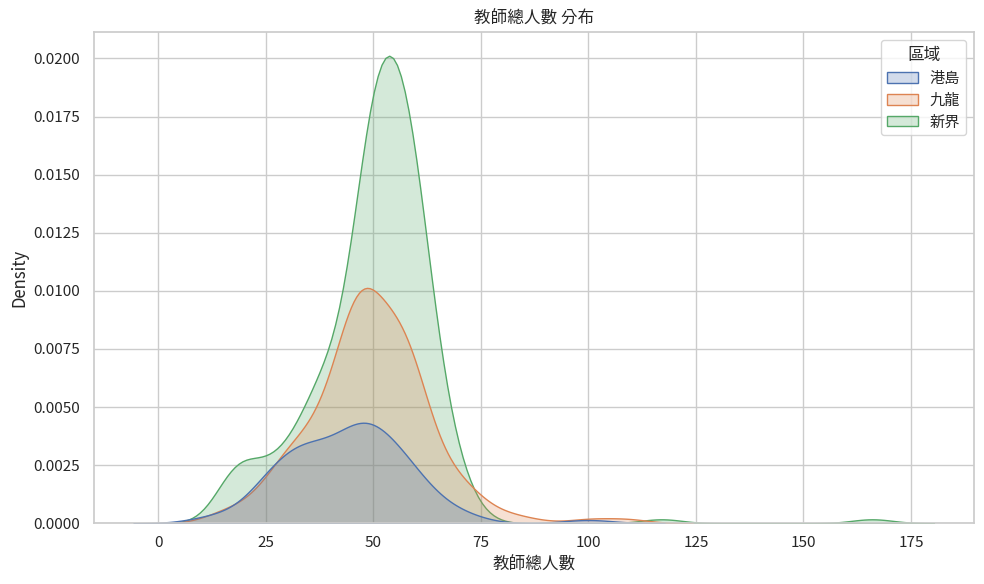

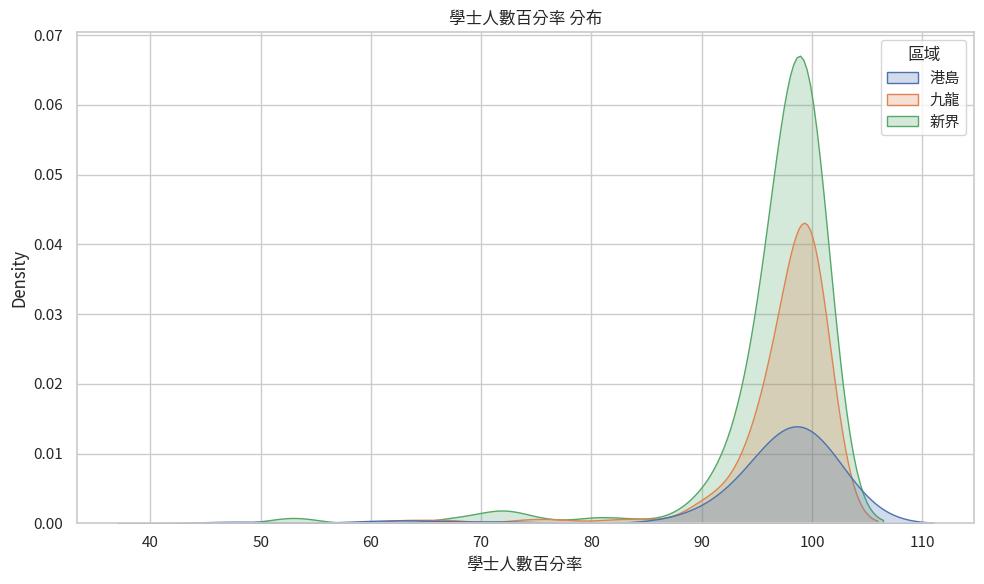

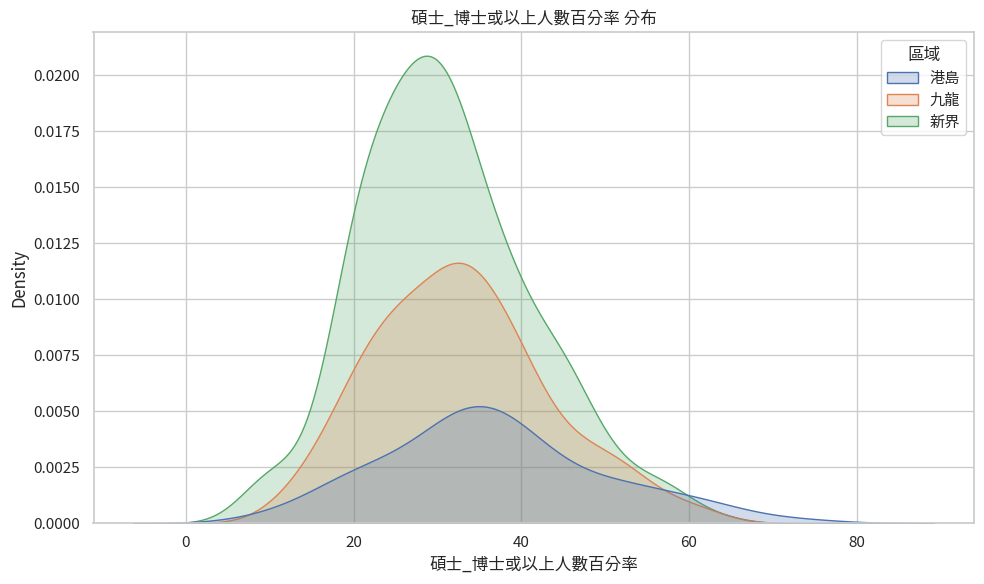

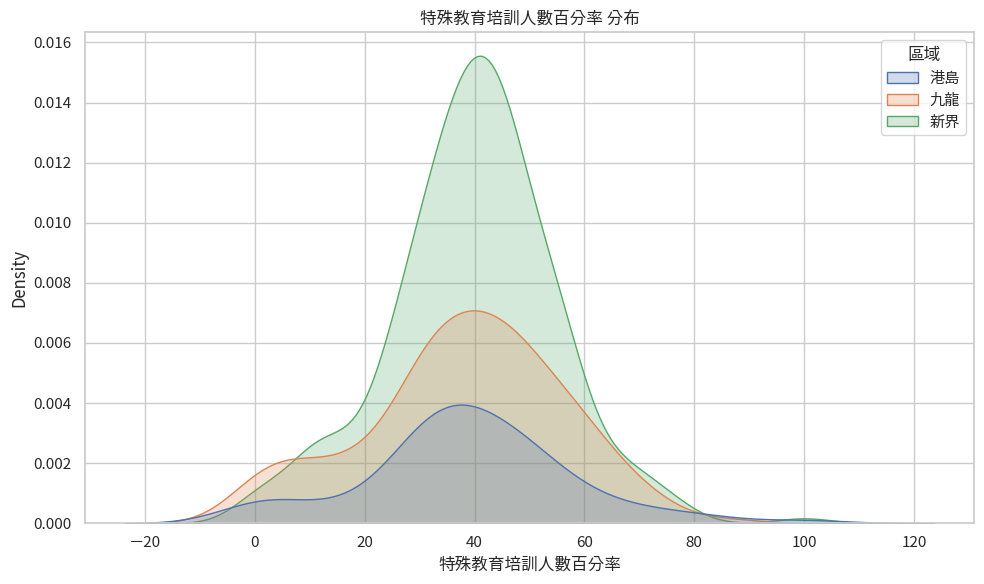

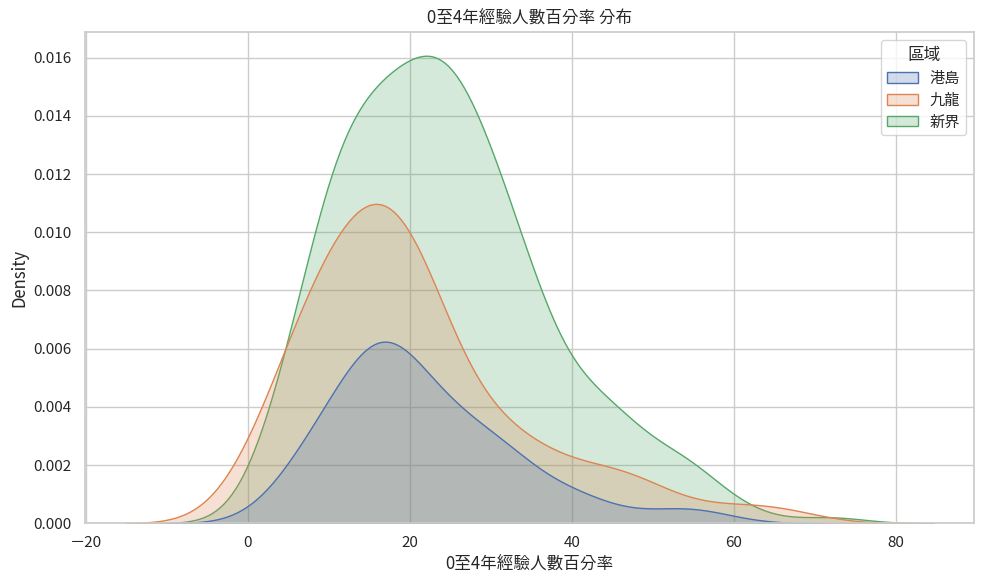

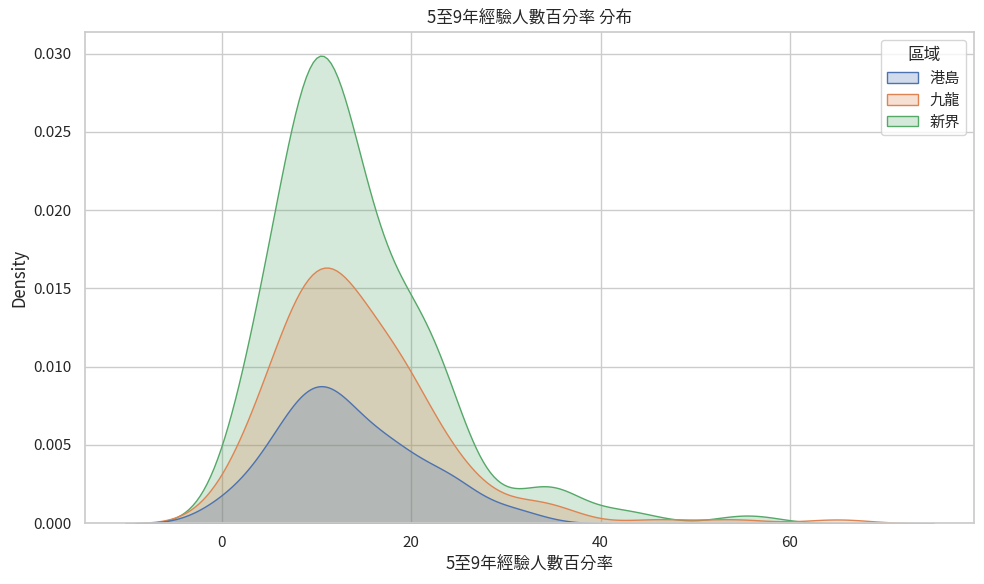

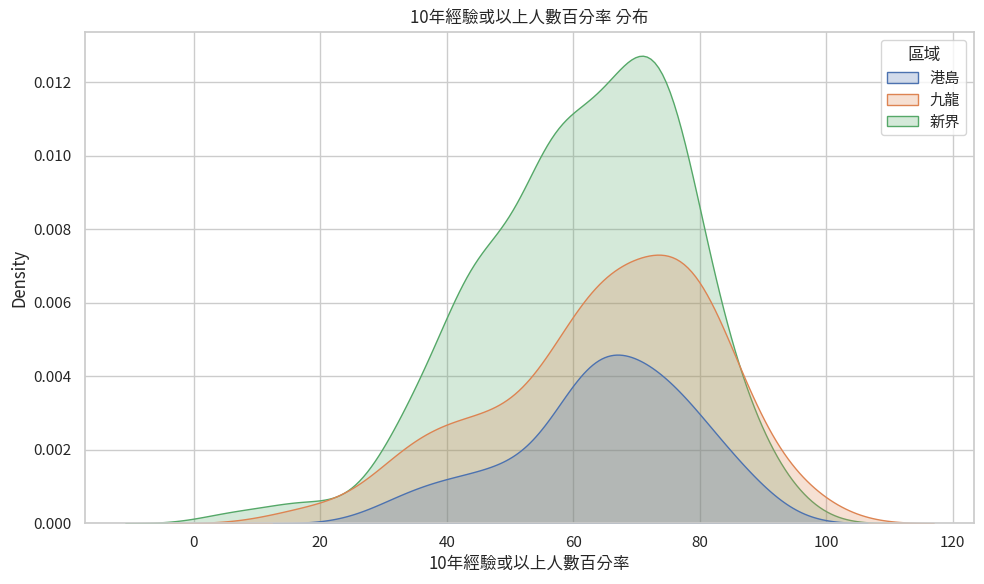

In [ ]:
for col in teacher_columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(
        data=merged_data2019,
        x=col,
        hue='區域',
        fill=True,
        common_norm=True
    )
    plt.title(f'{col} 分布')
    plt.tight_layout()
    plt.show()

**Result:**

*   According to the data shown in the above figure, it can be obtained that when dividing the data from the larger regions of Hong Kong, the distribution of the total number of teachers, the percentage of teachers with a bachelor's degree, the percentage of teachers with a master's degree or doctoral degree or above, the percentage of special education training, the percentage of teachers with a teaching age of 0-4 years, the percentage of teachers with a teaching age of 5-9 years, and the percentage of teachers with a teaching age of 10 years to or above, etc., are all most distributed in the New Territories, and the preliminary results obtained may be This preliminary result may be due to the fact that there are more sub-regions in the New Territories, so these percentages are larger, so further analysis will be conducted for the sub-regions later.


2.   Analyzed based on the four types of schools in Hong Kong (aided, government-run, private, and direct subsidy)


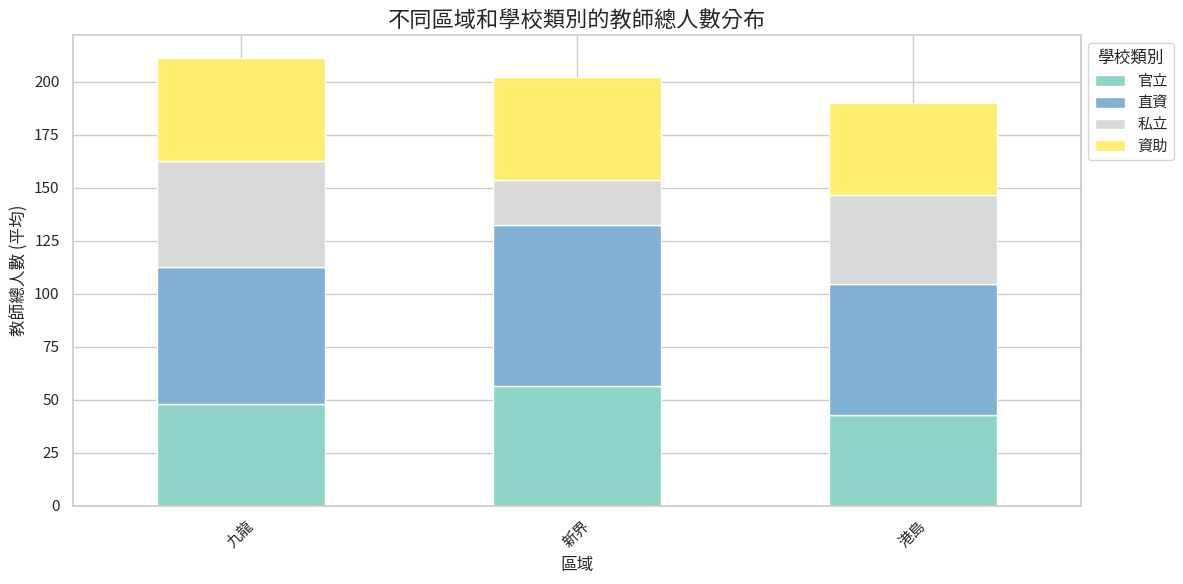

In [ ]:
grouped_by_region = merged_data2019.groupby(['區域', '學校類別1'])['教師總人數'].mean().unstack()
grouped_by_region.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')

plt.title('不同區域和學校類別的教師總人數分布', fontsize=16)
plt.xlabel('區域', fontsize=12)
plt.ylabel('教師總人數 (平均)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='學校類別', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

**Result:**
*   With the addition of school categories to this chart, it can be seen that the distribution of aided and government schools is not too far apart in all three districts, but DSS schools have the largest share in the New Territories, while private schools have a larger share in Kowloon and Hong Kong Island.
*   This may be because Hong Kong Island and Kowloon are usually the economic and commercial centers of Hong Kong, with more wealthy and high-income families. These families may prefer private schools, which usually offer smaller class sizes, more personalized educational services and better facilities. Given the higher cost of living in these districts, parents may be willing to invest more in their children's education, especially in choosing private schools, which may offer education quality and resources that meet their expectations.
*   The New Territories is a relatively large area, but it is mostly residential, especially in some of the more remote areas. Residents in the New Territories may rely more on public schools, especially because the property prices in the New Territories are lower compared to those on Hong Kong Island and Kowloon, and residents may not be as well-off as the higher-income families on Hong Kong Island and Kowloon, which leads to a greater preference for public schools.



3.   View the approximate distribution and situation of teachers in 18 sub-regions of Hong Kong

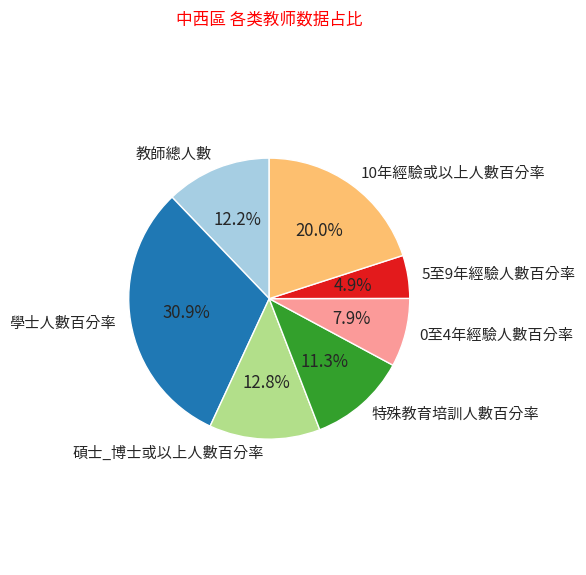

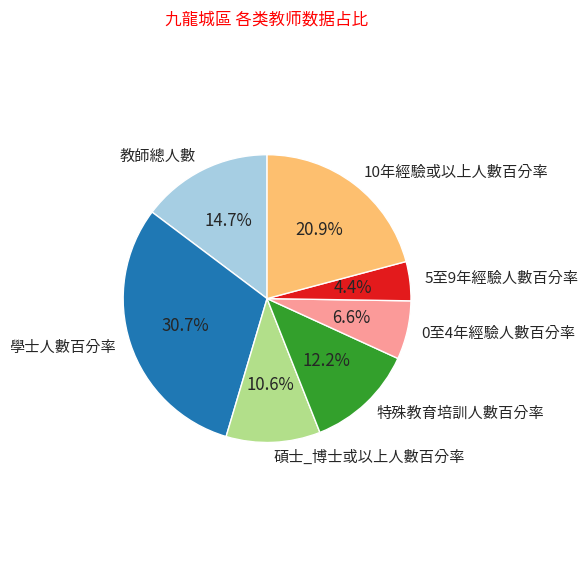

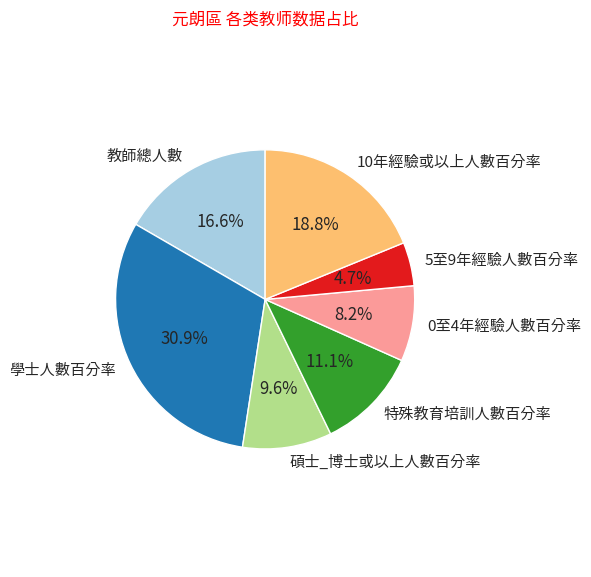

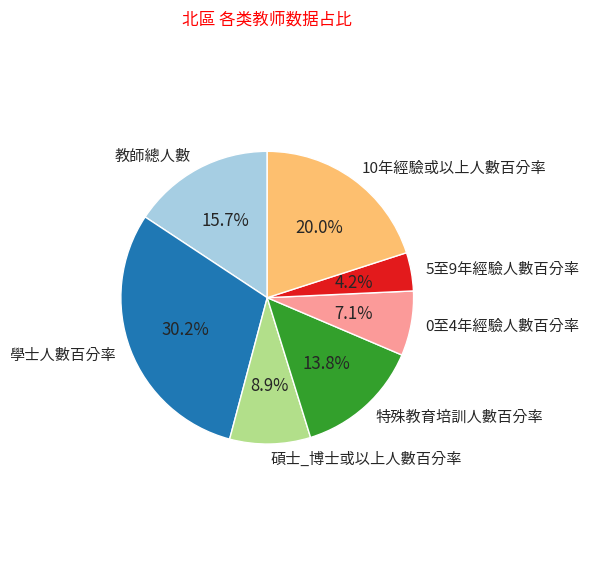

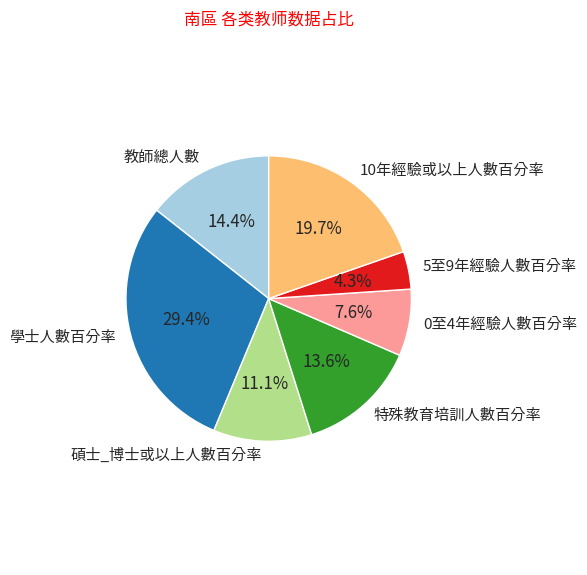

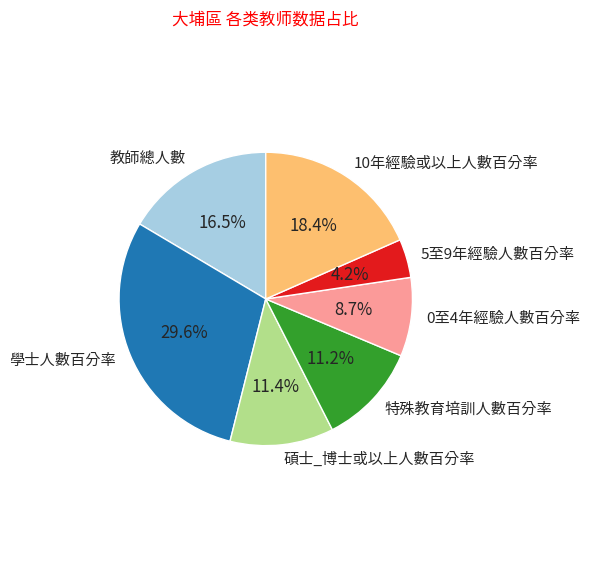

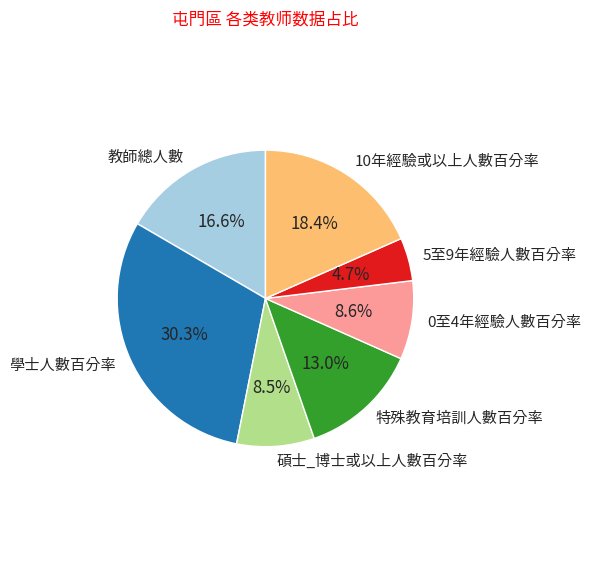

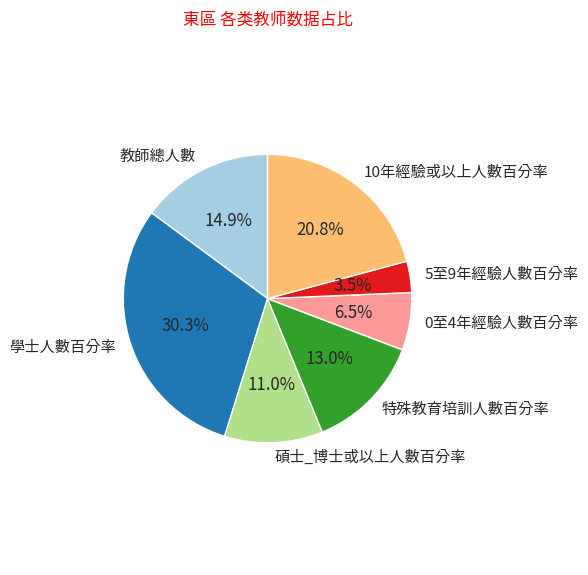

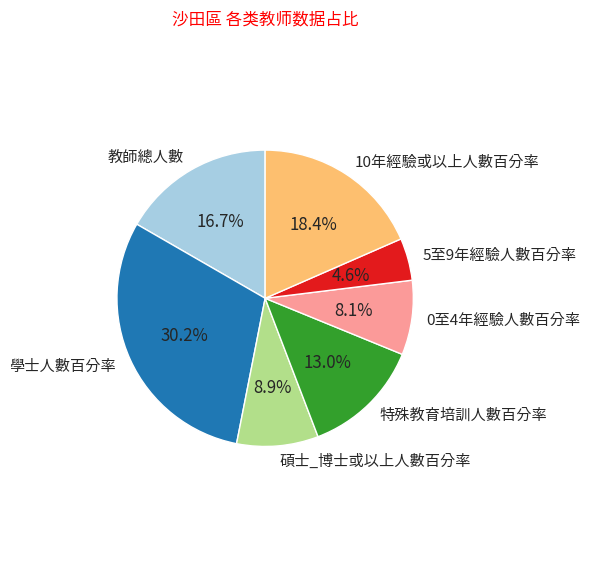

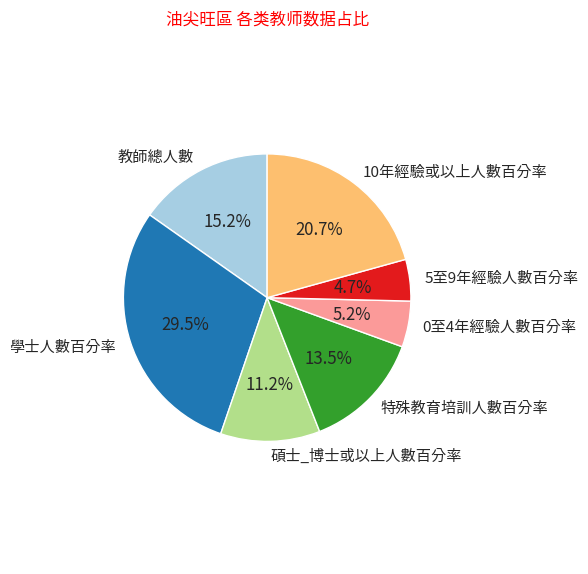

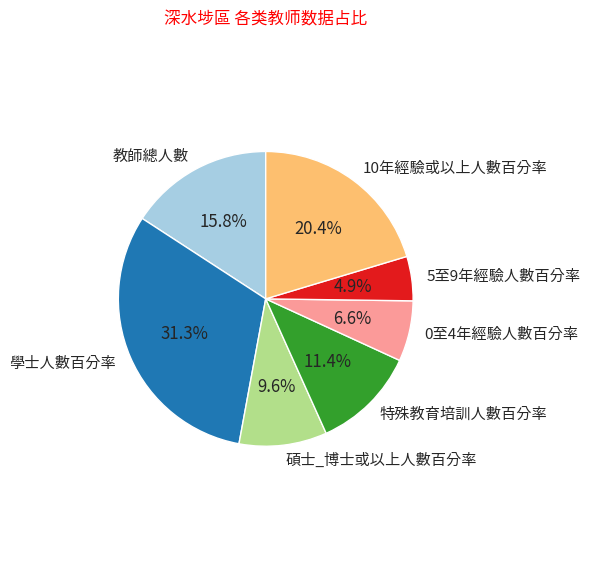

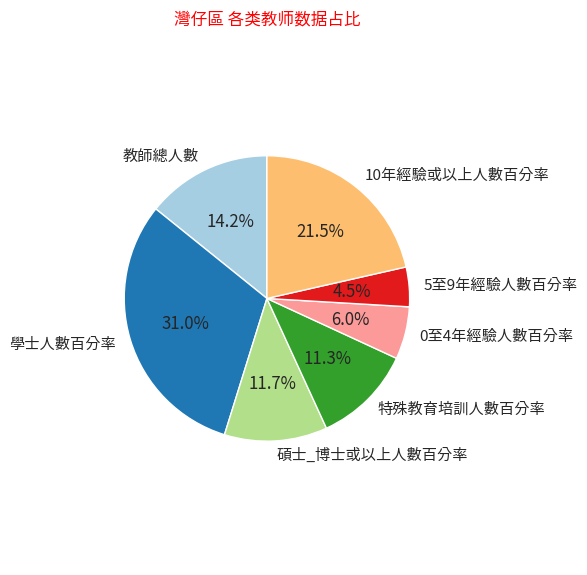

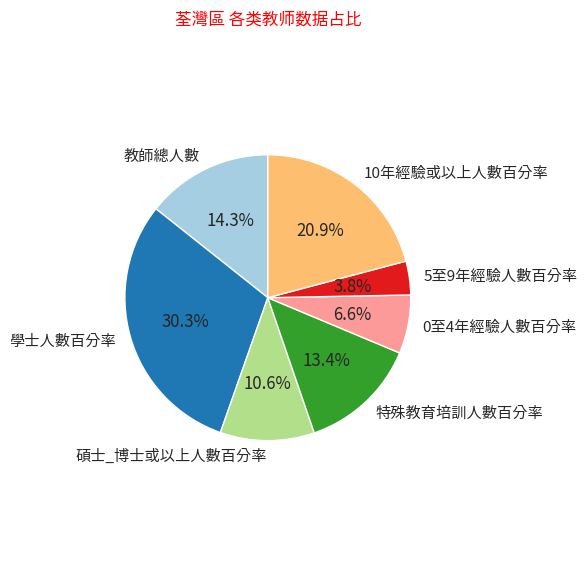

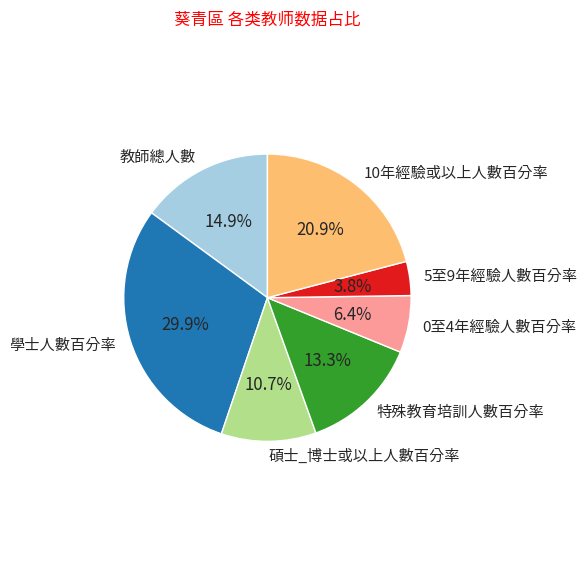

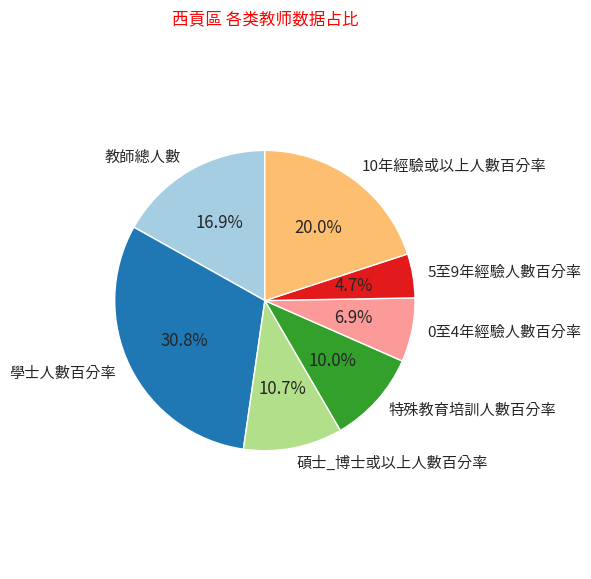

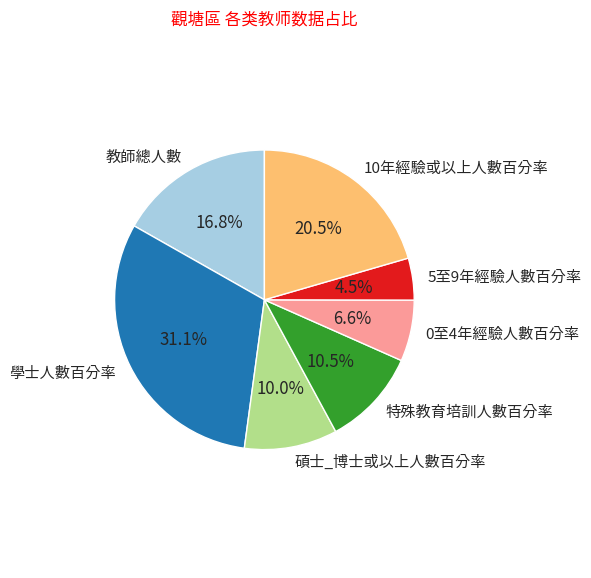

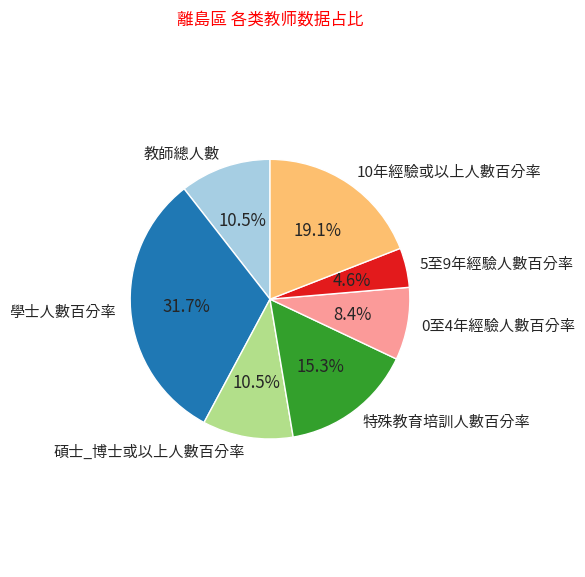

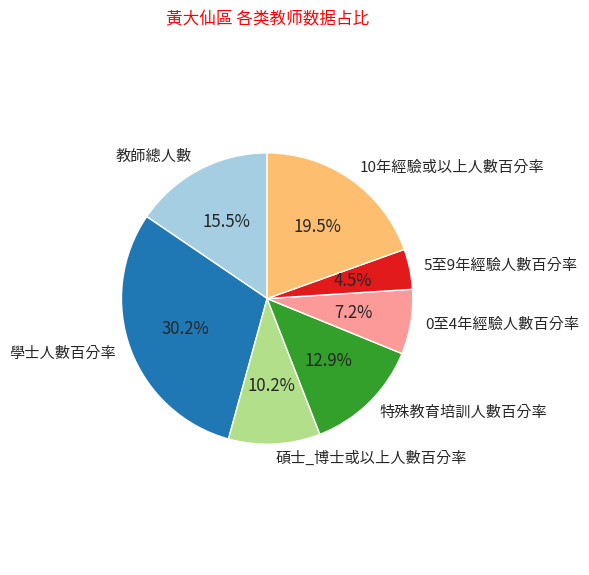

In [ ]:
columns_to_plot_teachers = [
    '教師總人數', '學士人數百分率', '碩士_博士或以上人數百分率', '特殊教育培訓人數百分率',
    '0至4年經驗人數百分率', '5至9年經驗人數百分率', '10年經驗或以上人數百分率'
]

region_summary = merged_data2019.groupby('子區域')[columns_to_plot_teachers].mean()

for region in region_summary.index:
    region_data = region_summary.loc[region]

    plt.figure(figsize=(6, 6))
    plt.pie(region_data, labels=region_data.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title(f'{region} 各类教师数据占比', color='red', fontweight='bold')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

4.   View the approximate distribution and situation of students in 18 sub-regions of Hong Kong

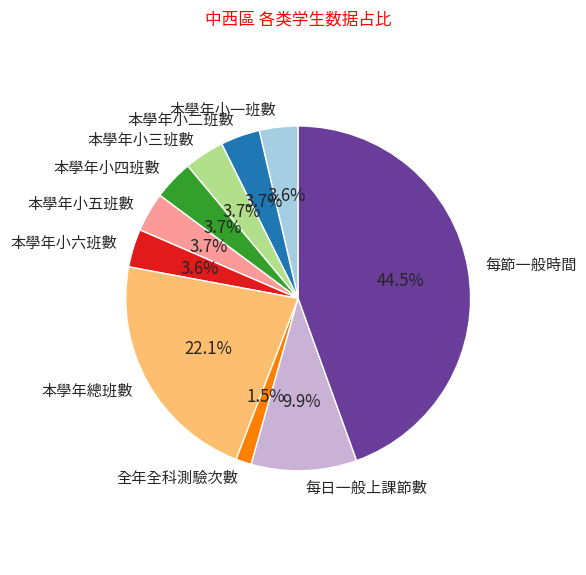

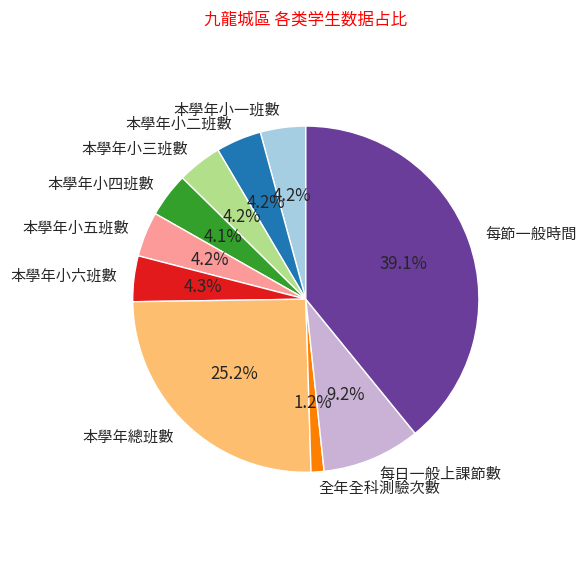

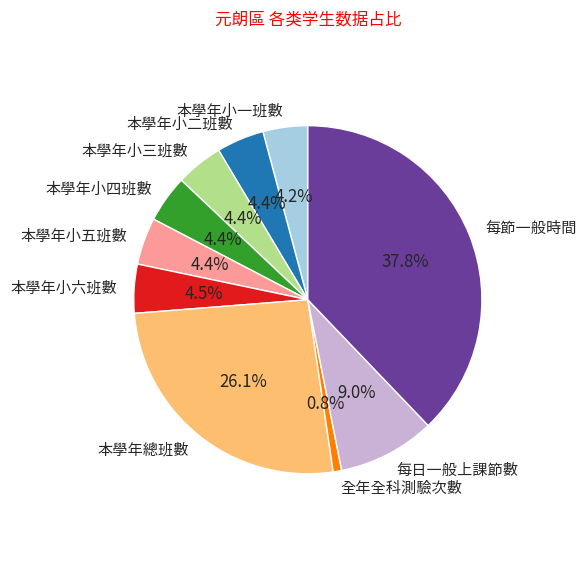

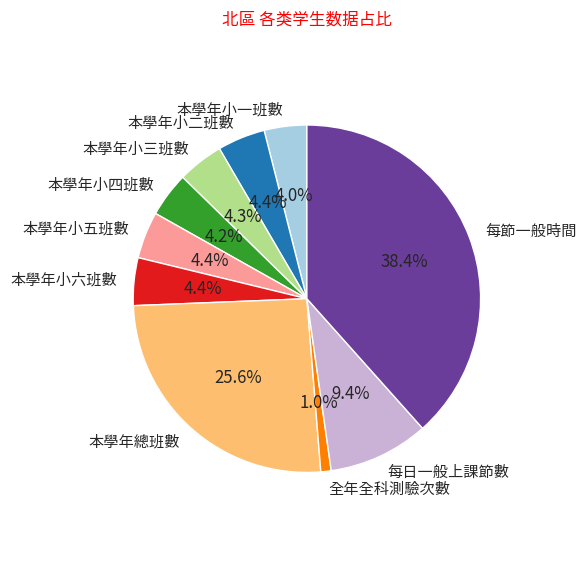

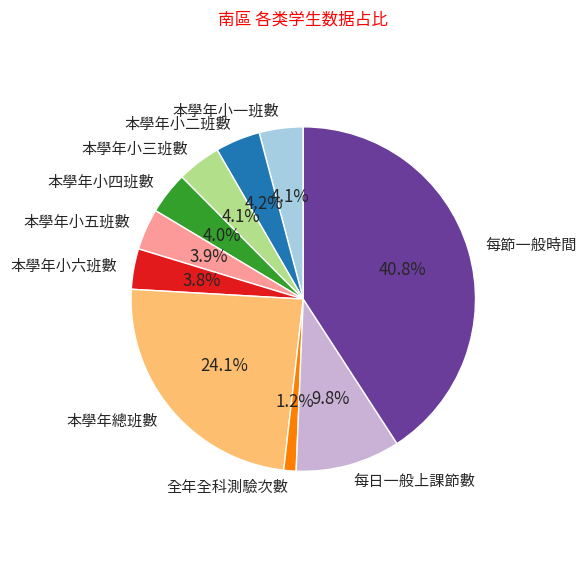

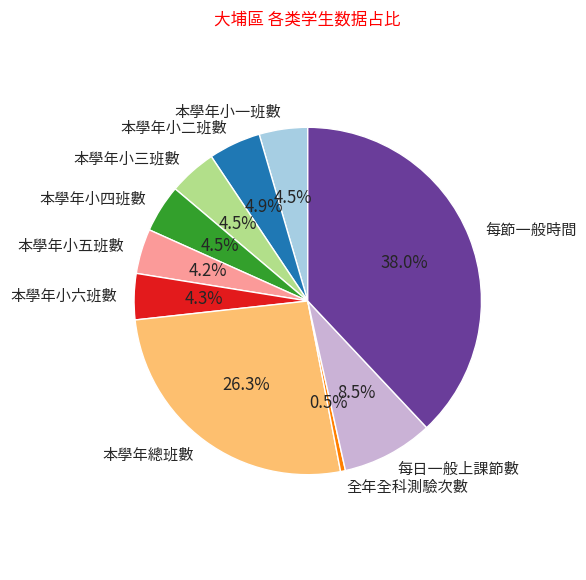

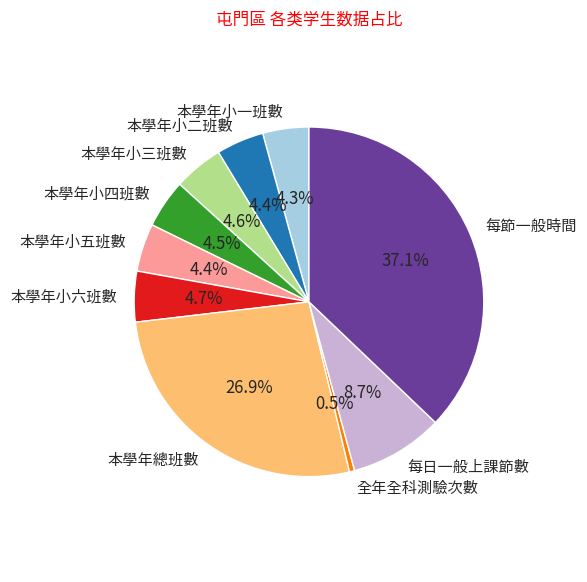

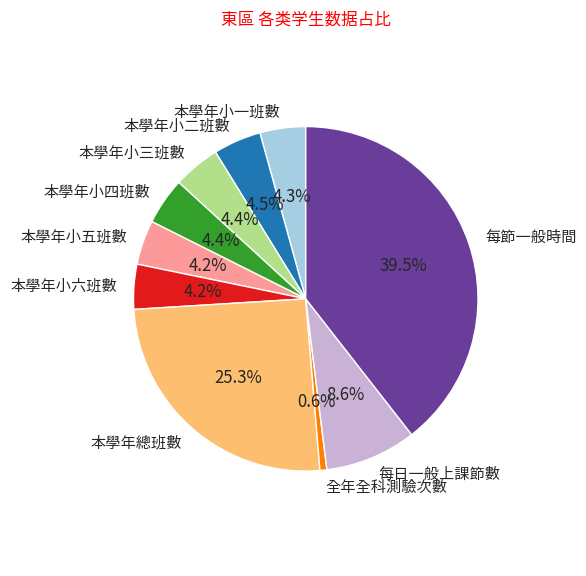

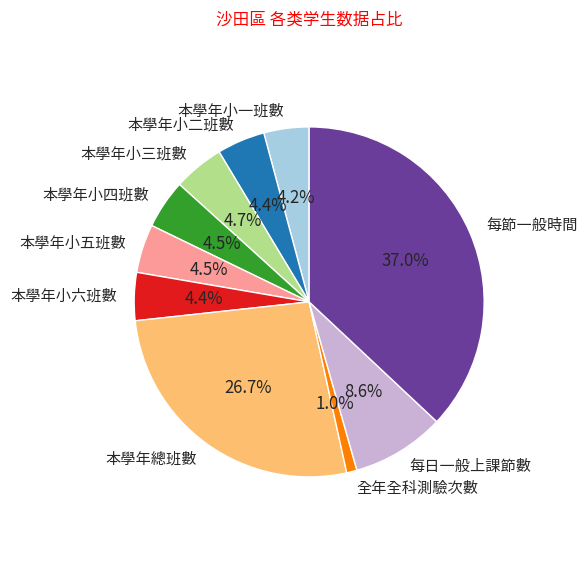

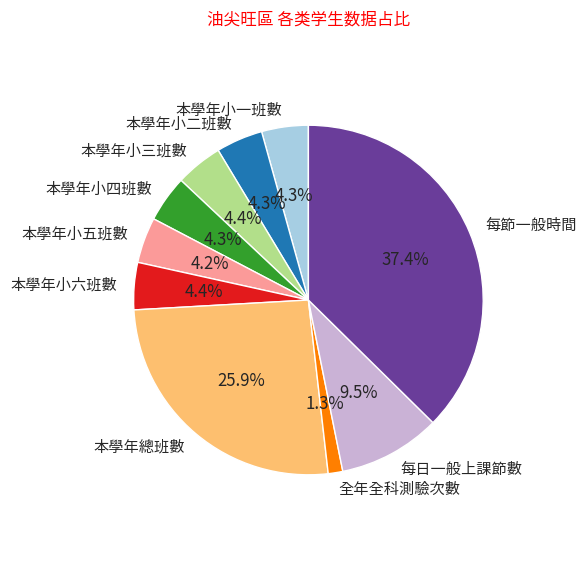

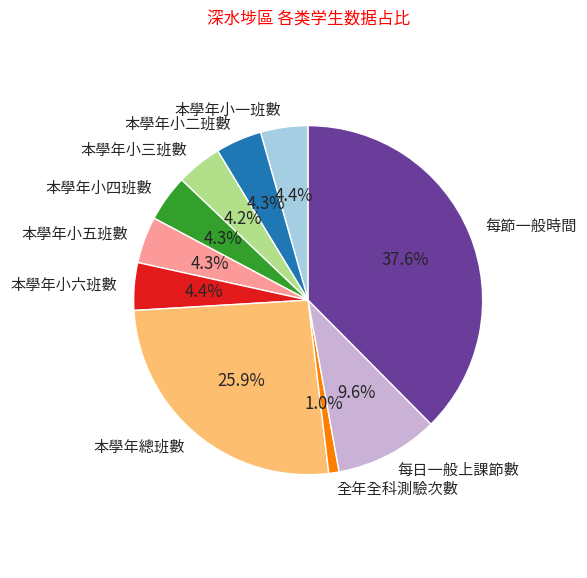

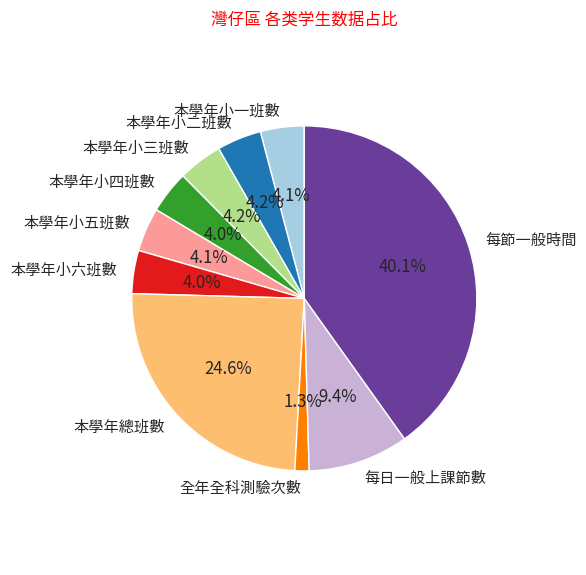

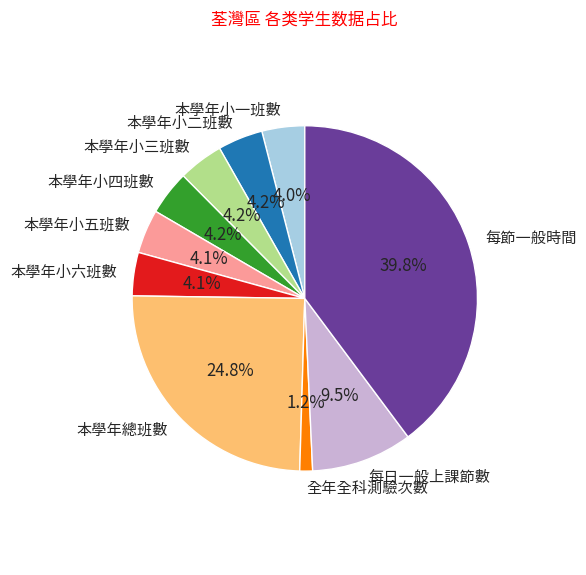

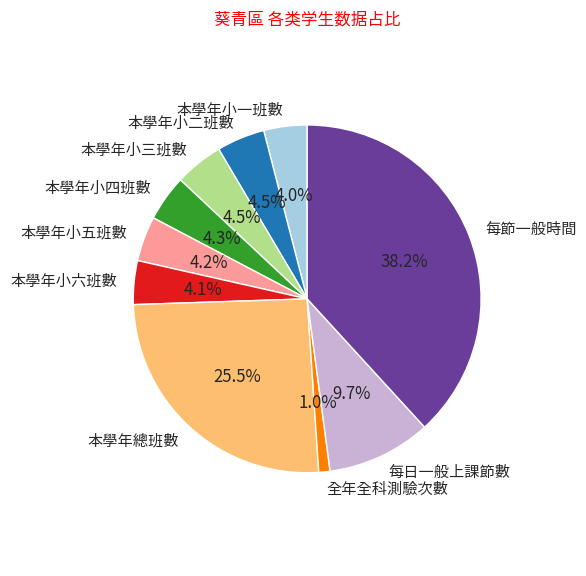

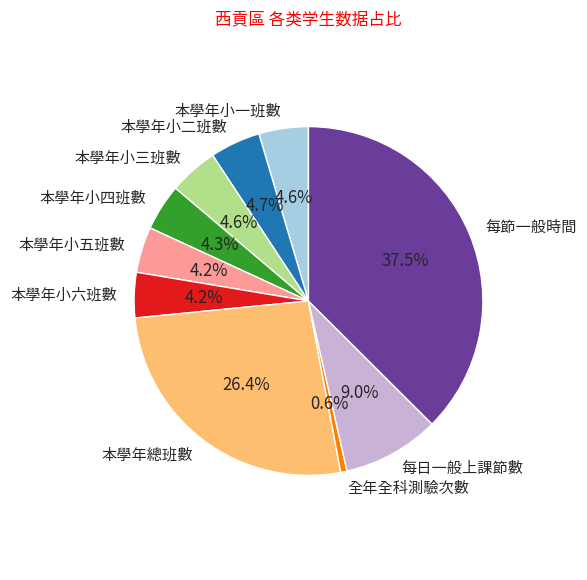

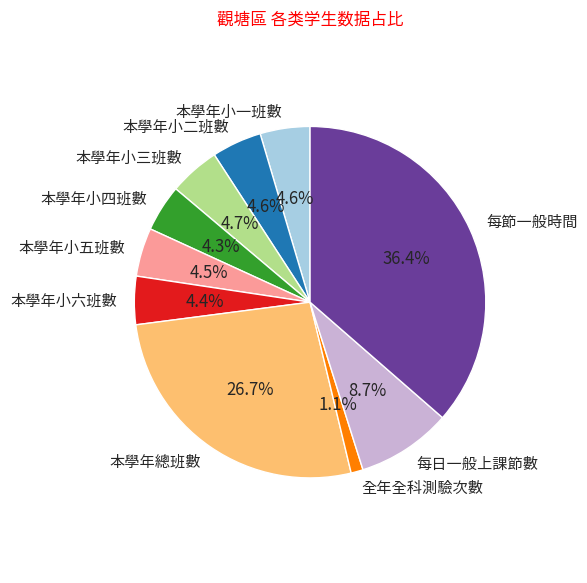

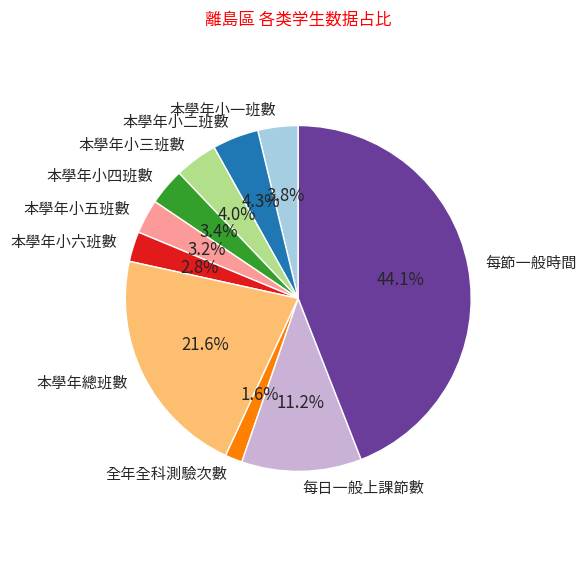

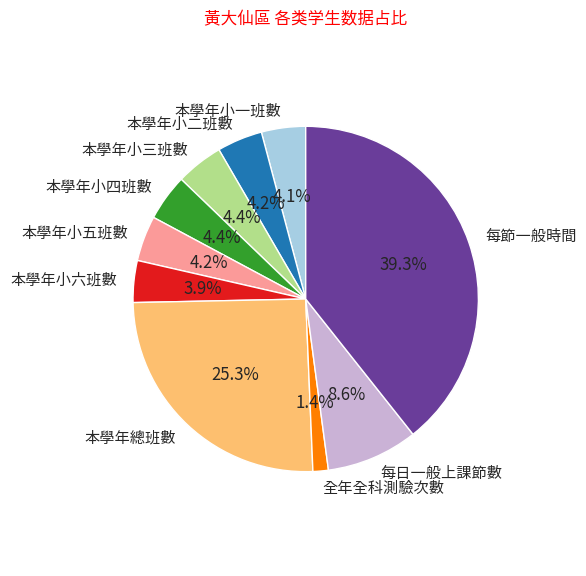

In [ ]:
columns_to_plot_students = [
    '本學年小一班數', '本學年小二班數', '本學年小三班數',
    '本學年小四班數', '本學年小五班數', '本學年小六班數',
    '本學年總班數', '全年全科測驗次數', '每日一般上課節數', '每節一般時間'
]

region_summary = merged_data2019.groupby('子區域')[columns_to_plot_students].mean()

for region in region_summary.index:
    region_data = region_summary.loc[region]

    plt.figure(figsize=(6, 6))
    plt.pie(region_data, labels=region_data.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title(f'{region} 各类学生数据占比', color='red', fontweight='bold')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

**Result:**

*   From the above pie charts of teacher information and student information, we can see that there are differences in the distribution of teacher resources and students between different regions. This will be analyzed and compared in detail later.



#### 2.4.2 A detailed analysis from the perspective of Hong Kong’s 18 sub-regions


##### 2.4.2.1   Divide the data into two groups: sub-regions and school categories, and then view and analyze the specific situation based on this grouping.

In [ ]:
group1 = merged_data2019.groupby(['子區域', '學校類別1']).agg({
    '課室數目': ['mean', 'std'],
    '教師總人數': ['mean', 'std'],
    '學士人數百分率': ['mean', 'std'],
    '碩士_博士或以上人數百分率': ['mean', 'std'],
    '特殊教育培訓人數百分率': ['mean', 'std'],
    '0至4年經驗人數百分率': ['mean', 'std'],
    '5至9年經驗人數百分率': ['mean', 'std'],
    '10年經驗或以上人數百分率': ['mean', 'std'],
    '本學年小一班數': ['mean', 'std'],
    '全年全科測驗次數': ['mean', 'std'],
    '每日一般上課節數': ['mean', 'std'],
    '每節一般時間': ['mean', 'std'],
    '本學年總班數': ['mean']
}).reset_index()

<ipython-input-24-4fa5713417ca>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




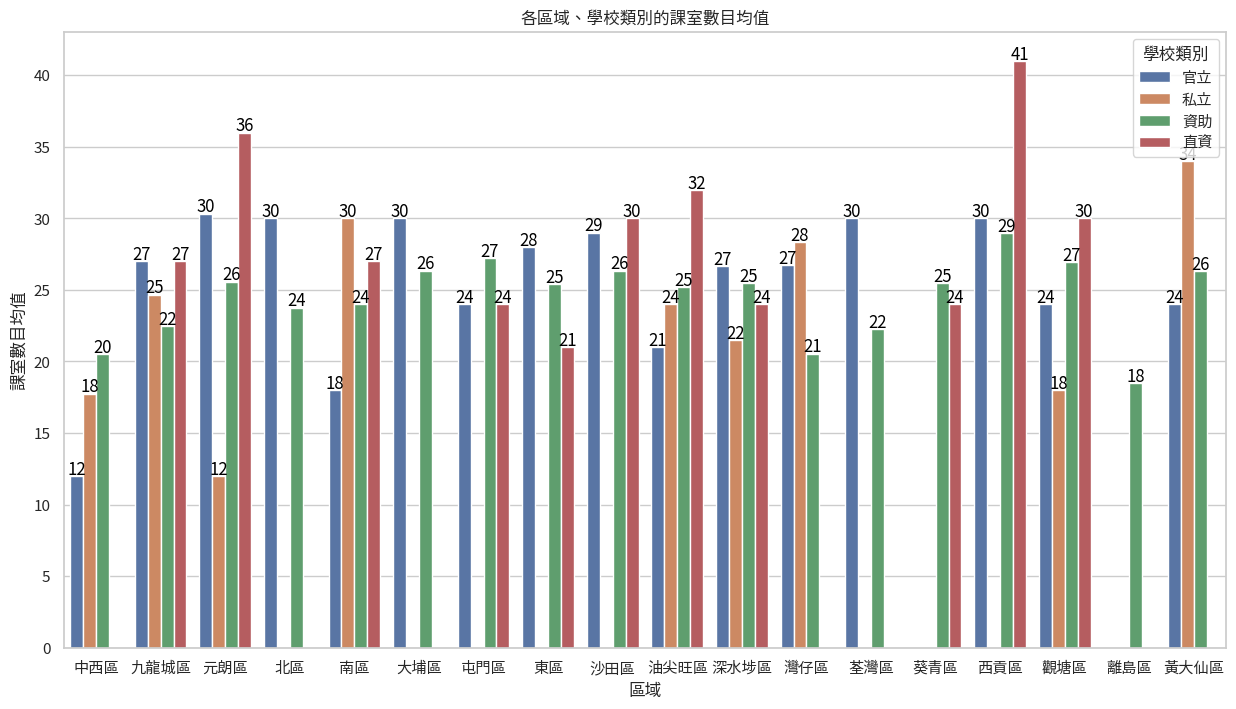

<ipython-input-24-4fa5713417ca>:24: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




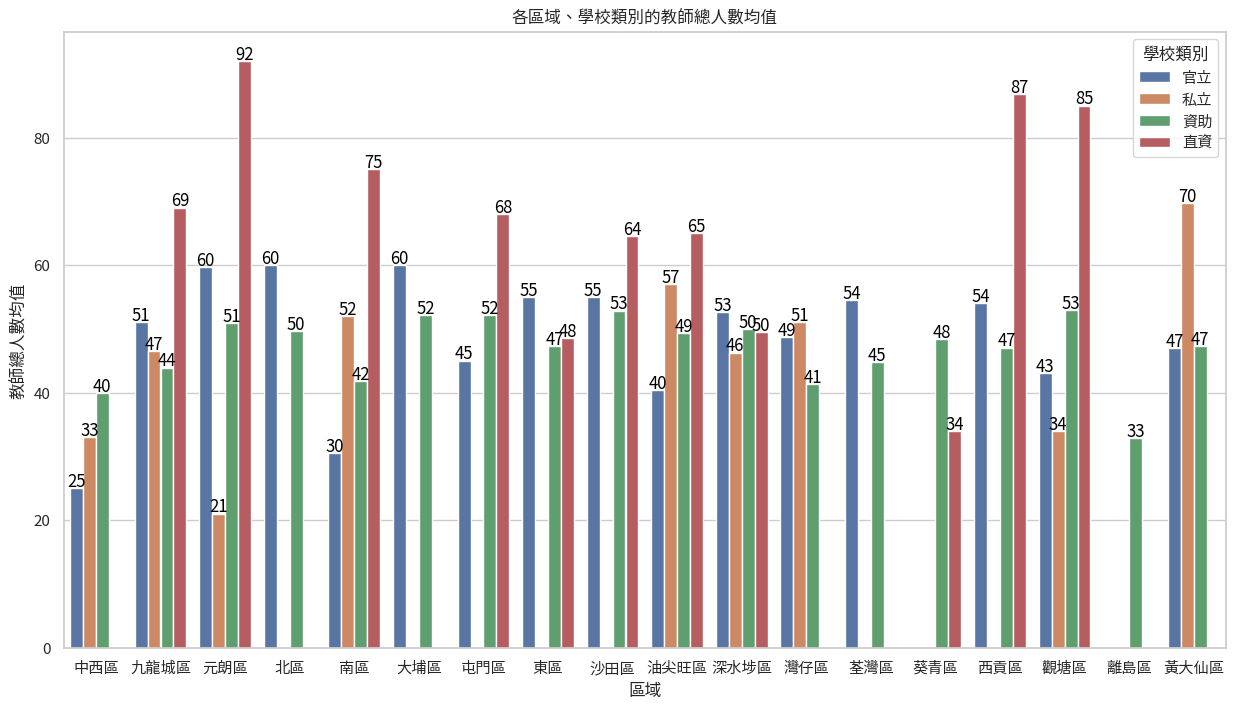

<ipython-input-24-4fa5713417ca>:44: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




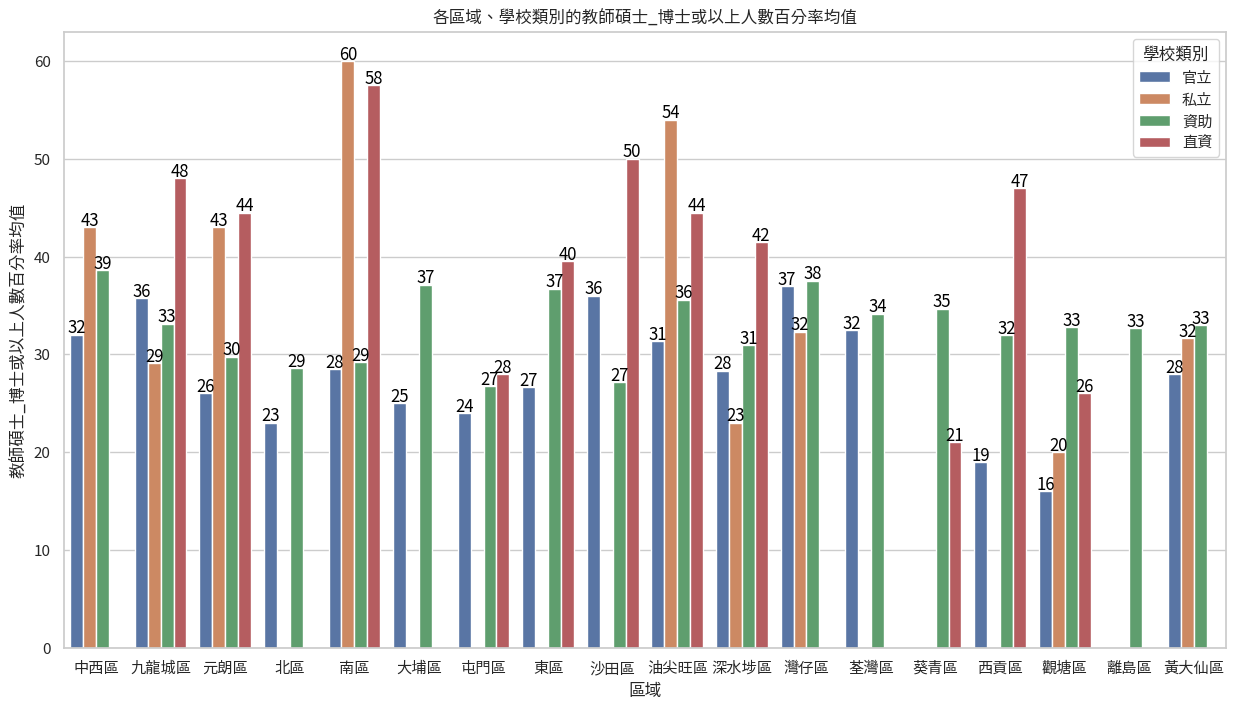

<ipython-input-24-4fa5713417ca>:64: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




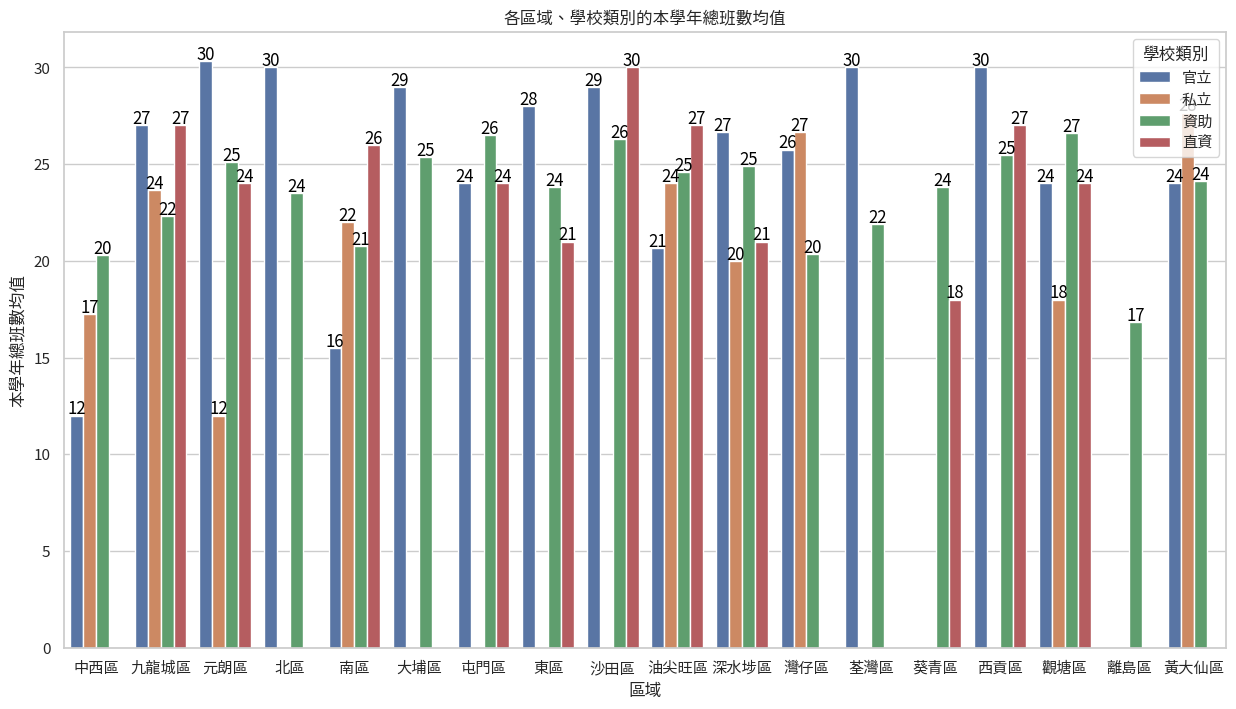

In [ ]:
plt.figure(figsize=(15, 8))
# Using calculated columns after aggregation
ax1 = sns.barplot(data=group1, x='子區域', y=('課室數目', 'mean'), hue='學校類別1', ci=None)

for p in ax1.patches:
    height = p.get_height()
    # Only display values ​​greater than 0 to avoid displaying extra 0s
    if height > 0:
        ax1.annotate(f'{height:.0f}',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center',
                     fontsize=12, color='black',
                     xytext=(0, 5), textcoords='offset points')

plt.title('各區域、學校類別的課室數目均值')
plt.xlabel('區域')
plt.ylabel('課室數目均值')
plt.legend(title='學校類別')
plt.show()



plt.figure(figsize=(15, 8))
ax2 = sns.barplot(data=group1, x='子區域', y=('教師總人數', 'mean'), hue='學校類別1', ci=None)

for p in ax2.patches:
    height = p.get_height()
    if height > 0:
        ax2.annotate(f'{height:.0f}',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center',
                     fontsize=12, color='black',
                     xytext=(0, 5), textcoords='offset points')

plt.title('各區域、學校類別的教師總人數均值')
plt.xlabel('區域')
plt.ylabel('教師總人數均值')
plt.legend(title='學校類別')
plt.show()



plt.figure(figsize=(15, 8))
ax3 = sns.barplot(data=group1, x='子區域', y=('碩士_博士或以上人數百分率', 'mean'), hue='學校類別1', ci=None)

for p in ax3.patches:
    height = p.get_height()
    if height > 0:
        ax3.annotate(f'{height:.0f}',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center',
                     fontsize=12, color='black',
                     xytext=(0, 5), textcoords='offset points')

plt.title('各區域、學校類別的教師碩士_博士或以上人數百分率均值')
plt.xlabel('區域')
plt.ylabel('教師碩士_博士或以上人數百分率均值')
plt.legend(title='學校類別')
plt.show()



plt.figure(figsize=(15, 8))
ax4 = sns.barplot(data=group1, x='子區域', y=('本學年總班數', 'mean'), hue='學校類別1', ci=None)

for p in ax4.patches:
    height = p.get_height()
    if height > 0:
        ax4.annotate(f'{height:.0f}',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center',
                     fontsize=12, color='black',
                     xytext=(0, 5), textcoords='offset points')

plt.title('各區域、學校類別的本學年總班數均值')
plt.xlabel('區域')
plt.ylabel('本學年總班數均值')
plt.legend(title='學校類別')
plt.show()

**Result:**
*   In the first graph, all the schools are first divided into four categories, and then you want to see the difference in the number of classrooms in each category of school, because the facilities of a school can also be a factor that can affect the performance of the students, and schools that have more classrooms can have different types of classrooms for different types of classes, such as music classrooms, computer instructors, and heart healing rooms. It can be clearly seen that DSS schools have more classrooms, which shows that these schools have sufficient funds to expand more classrooms to offer more kinds of courses, providing good resources for the diversified development of students.
*   The second graph shows the total number of teachers in each school category in each district. Since teachers are the key to teaching students, this factor has a more direct impact on student achievement. It can be seen that DSS schools generally have more teachers than other types of schools, probably because DSS schools enjoy greater autonomy in management, including financial management and personnel arrangements. And DSS schools usually offer a wider range of curricular and extra-curricular activities, which require more teachers to support. For example, DSS schools may offer more special programs in art, music, and physical education, which require specialized teams of teachers.
*   The third one shows the percentage of teachers who are masters and doctoral degree or above in each type and district. It can be visualized that private and DSS schools have a larger proportion of these teachers, which also shows that private and DSS schools are more inclined to recruit teachers with higher academic qualifications. This may be because they believe that teachers with higher qualifications can provide higher quality education or can better support the school's academic research and extracurricular activities. And private and DSS schools offer more attractive salaries and benefits to attract highly educated teachers. These schools may have greater budgetary flexibility and are able to offer better working conditions for teachers with advanced degrees.
*   The fourth table shows the total class averages for the current school year. The classification and number of various types of classes in each district do not vary much but it is obvious that there are no private and DSS schools in the North, Tai Po, Tsuen Wan, and Islands Districts, probably because these districts may have a smaller population or a lower population density that is insufficient to support the operation of private and DSS schools. Moreover, the tuition fees of private and DSS schools are usually high, and families in these districts may have limited financial means to afford the high tuition fees. Also, these areas are geographically remote, which is not conducive to attracting teachers and students, and also increases the cost of operating the school.


**Part 2 Conclusion:**
*   The second part can be summarized as follows:
In areas such as Hong Kong Island and Kowloon, there are abundant teaching resources, many teachers with relatively high academic qualifications, and almost all boys' and girls' schools are distributed in these two areas. Students from these schools are more likely to win awards in competitions than students from other schools.




##### 2.4.2.2   The data were divided into three groups: sub-region, school gender and language of instruction, and then the specific situation was examined and analyzed according to this grouping.

In [ ]:
group2 = merged_data2019.groupby(['子區域', '學生性別', '教學語言']).agg({
    '教師總人數': 'sum',
    '學士人數百分率': 'mean',
    '碩士_博士或以上人數百分率': 'mean',
    '特殊教育培訓人數百分率': 'mean',
    '0至4年經驗人數百分率': 'mean',
    '5至9年經驗人數百分率': 'mean',
    '10年經驗或以上人數百分率': 'mean',
    '全年全科測驗次數': ['mean', 'std'],
    '每日一般上課節數': ['mean', 'std'],
    '每節一般時間': ['mean', 'std'],
    '本學年總班數': ['mean']
}).reset_index()

<ipython-input-26-0f5bb5d077a3>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




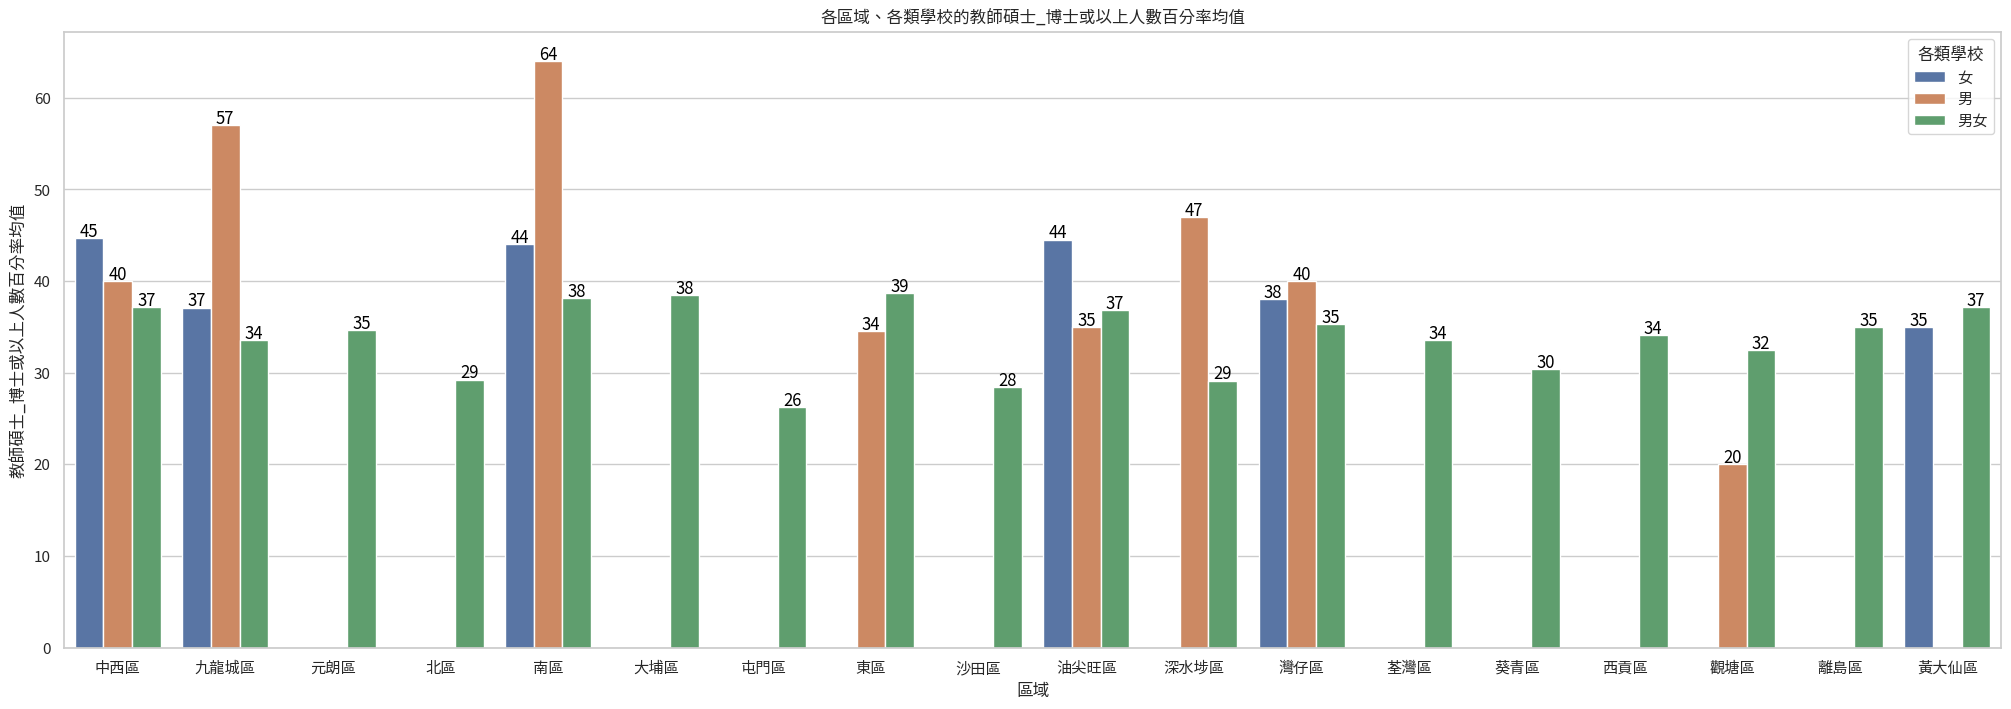

In [ ]:
plt.figure(figsize=(25, 8))

ax5 = sns.barplot(data=group2, x='子區域', y=('碩士_博士或以上人數百分率','mean'), hue='學生性別', ci=None)

for p in ax5.patches:
    height = p.get_height()
    if height > 0:
        ax5.annotate(f'{height:.0f}',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center',
                     fontsize=12, color='black',
                     xytext=(0, 5), textcoords='offset points')

plt.title('各區域、各類學校的教師碩士_博士或以上人數百分率均值')
plt.xlabel('區域')
plt.ylabel('教師碩士_博士或以上人數百分率均值')
plt.legend(title='各類學校')
plt.show()

**Result:**
*   This chart can be obtained from the fact that all girls' and boys' schools are located in Hong Kong Island and Kowloon districts, probably because Hong Kong Island and Kowloon districts are the economic, cultural and educational centers of Hong Kong, and these two districts are more rich in educational resources and facilities, thus many girls' and boys' schools have chosen to set up in these districts. Due to the higher level of economic development on Hong Kong Island and in Kowloon, some private schools offer single-sex education to meet parents' expectations on the quality of education and the need for specialized education. These private schools may have easier access to funding and resources than those in the New Territories and are able to provide single-sex education.

*   It can also be seen in this chart that it is teachers with master's and doctoral degrees and above that are more prevalent in boys' and girls' schools, illustrating that parents and students in gender-specific schools tend to be more concerned about academic achievement and performance in further education. As a result, these schools are more inclined to hire teachers with higher academic qualifications in order to improve the quality of teaching and learning in their schools, especially in subjects where there is strong academic competition (e.g., in the areas of science, mathematics and languages), and these teachers are able to provide a higher level of teaching and learning that will help students to achieve better results in further studies and examinations.





<ipython-input-27-7d4c8bc67e91>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




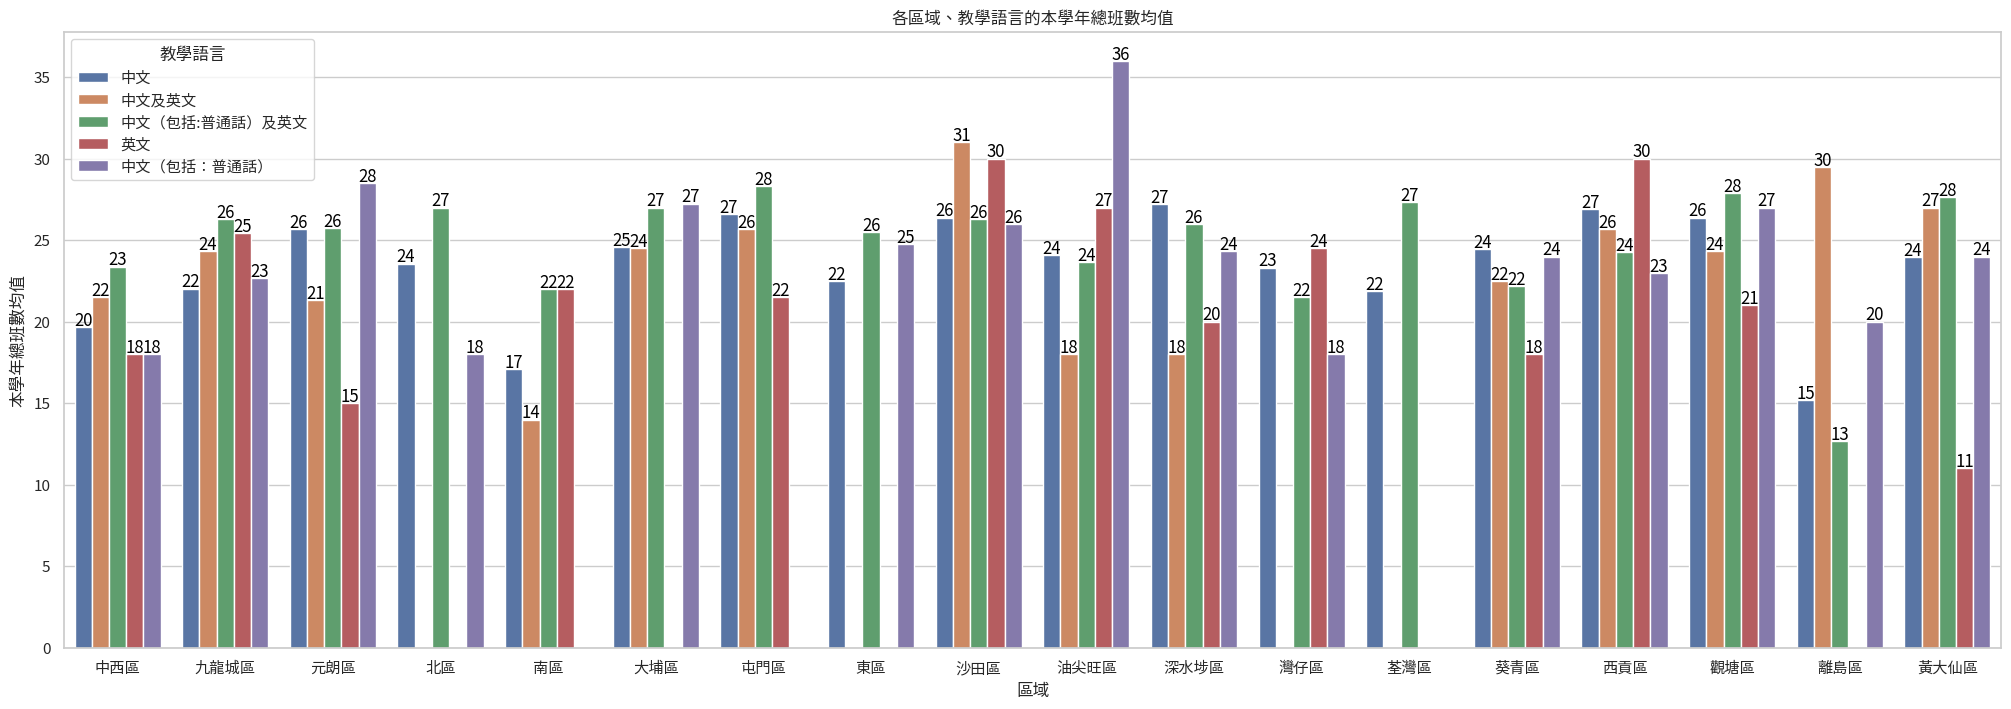

In [ ]:
plt.figure(figsize=(25, 8))

ax6 = sns.barplot(data=group2, x='子區域', y=('本學年總班數', 'mean'), hue='教學語言', ci=None)

for p in ax6.patches:
    height = p.get_height()
    if height > 0:
        ax6.annotate(f'{height:.0f}',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center',
                     fontsize=12, color='black',
                     xytext=(0, 5), textcoords='offset points')

plt.title('各區域、教學語言的本學年總班數均值')
plt.xlabel('區域')
plt.ylabel('本學年總班數均值')
plt.legend(title='教學語言')
plt.show()

**Result:**
*   From this chart, we can get that the language of instruction in each district can cover almost all types of teaching, but the only districts that do not have full English teaching are North, East and Tsuen Wan, and almost every district has teaching that includes Chinese, Putonghua, and English. Perhaps because of the differences in economic and educational resources, North, East and Tsuen Wan districts may be at a lower level of economic status compared to the Hong Kong Island and Kowloon districts, which leads to the fact that the schools in these districts have not invested sufficiently in educational resources , foreign teachers and English language teaching, etc. are not sufficiently invested. As a result, there may not be schools with wholly English-medium teaching in these districts. Whole English teaching usually requires a higher percentage of expatriate or native English-speaking students in order to ensure the effectiveness of English teaching. These districts have relatively few expatriate or bilingual students and do not have sufficient demand to promote full English language teaching.

<ipython-input-28-f836fe2fc1a4>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




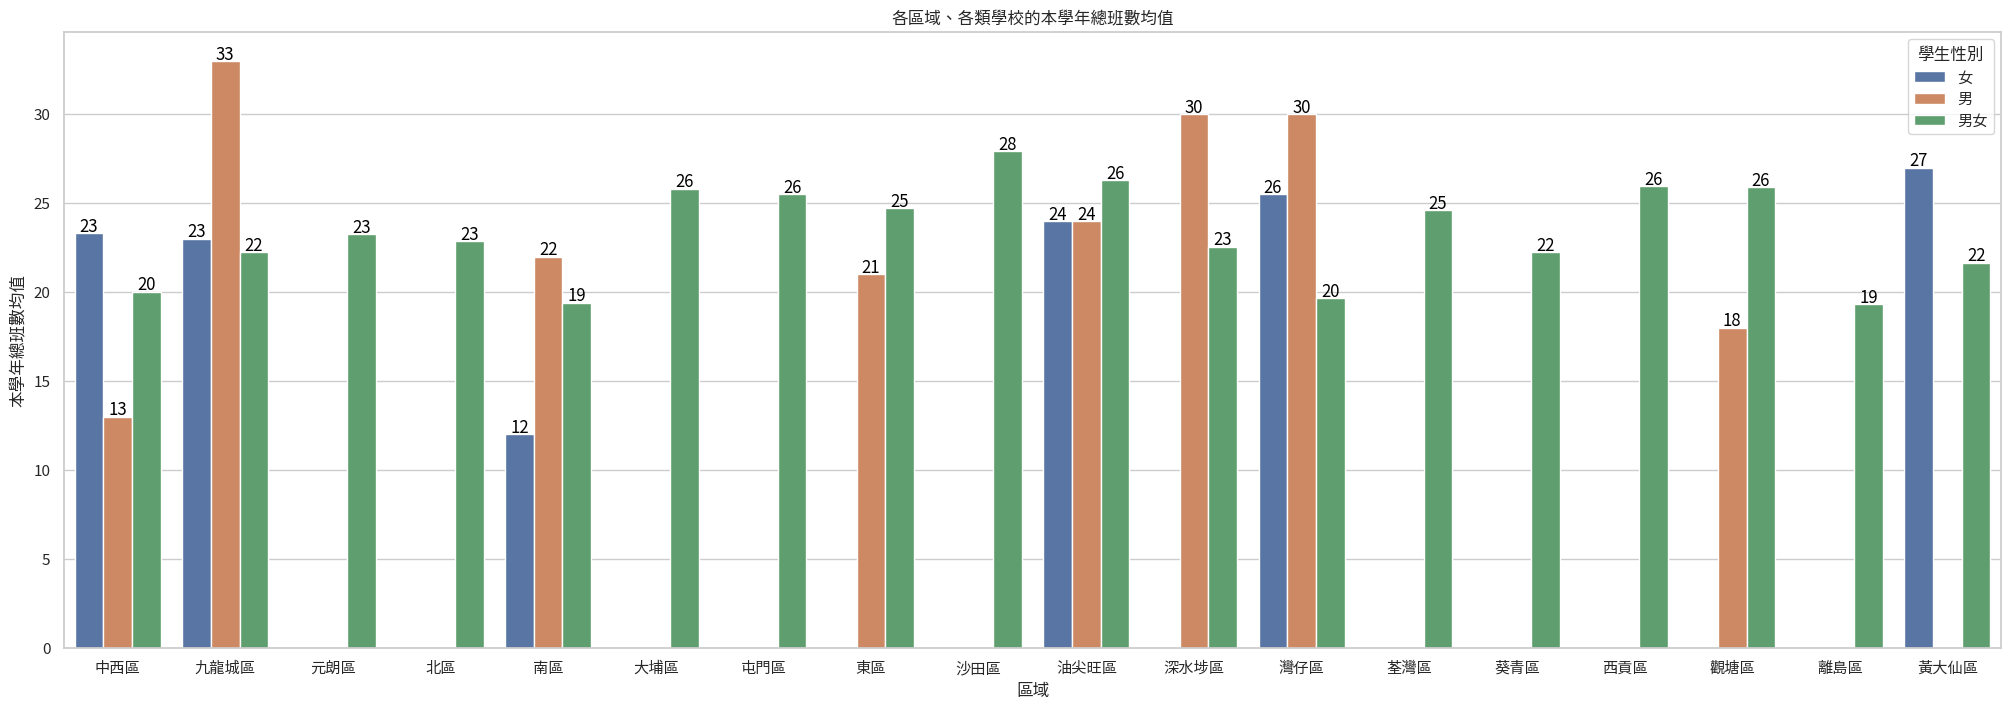

In [ ]:
plt.figure(figsize=(25, 8))

ax7 = sns.barplot(data=group2, x='子區域', y=('本學年總班數', 'mean'), hue='學生性別', ci=None)

for p in ax7.patches:
    height = p.get_height()
    if height > 0:
        ax7.annotate(f'{height:.0f}',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center',
                     fontsize=12, color='black',
                     xytext=(0, 5), textcoords='offset points')

plt.title('各區域、各類學校的本學年總班數均值')
plt.xlabel('區域')
plt.ylabel('本學年總班數均值')
plt.legend(title='學生性別')
plt.show()


*   It can be noticed that there is a more prominent part of the total number of classes in boys' schools, while the number of girls' schools does not differ much from the number of co-educational schools, which shows that although it is a boys' school, the number of people is not considerable, and it also reflects the importance of parents to their children side by side.

**Part2 Conclusion:**

*   In summary, through the above analysis, we can
conclude that boys' and girls' schools are mainly distributed in economically developed areas such as Hong Kong Island and Kowloon. Moreover, the schools in Hong Kong Island and Kowloon are superior to those in other areas in terms of facilities and teaching resources, such as teachers' academic qualifications and teaching experience, enabling students to receive more comprehensive and professional education.

# **3 Time series visualization showing any trends or changes over the years**

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
path = '/content/drive/MyDrive/BigProject6001/'

Mounted at /content/drive


**If we want to visualize the impact of different times on the dataset, we first need to integrate them together, but there is no column related to time in the dataset, so I first add a new column and fill it with year**

In [ ]:
df = pd.read_csv(path+'psp_2019_en.csv')
df['YearN'] = 2019
df.to_csv('updated_2019.csv', index=False)

df = pd.read_csv(path+'psp_2020_en.csv')
df['YearN'] = 2020
df.to_csv('updated_2020.csv', index=False)

df = pd.read_csv(path+'psp_2021_en.csv')
df['YearN'] = 2021
df.to_csv('updated_2021.csv', index=False)

df = pd.read_csv(path+'psp_2022_en.csv')
df['YearN'] = 2022
df.to_csv('updated_2022.csv', index=False)

df = pd.read_csv(path+'psp_2023_en.csv')
df['YearN'] = 2023
df.to_csv('updated_2023.csv', index=False)

df = pd.read_csv(path+'psp_2024_en.csv')
df['YearN'] = 2024
df.to_csv('updated_2024.csv', index=False)

**Then I use contact to merge them**

In [ ]:
file_names = [
    path+'updated_2019.csv',
    path+'updated_2020.csv',
    path+'updated_2021.csv',
    path+'updated_2022.csv',
    path+'updated_2023.csv',
    path+'updated_2024.csv'
]

# Read all datasets and store in list
dataframes = [pd.read_csv(file_name) for file_name in file_names]

# Merge all datasets, merge by column name
merged_df = pd.concat(dataframes, ignore_index=True)

# Save the merged dataset
merged_df.to_csv('contact_dataset.csv', index=False)

In [ ]:
Bob = pd.read_csv(path+'contact_dataset.csv') #run this

**By observing the data set , I noticed an interesting thing. As the years increase, the number of faculty members with 0-4 years of work experience in some school is slowly decreasing.**

In [ ]:
result = Bob.groupby(['district', 'YearN'], as_index=False)['tsi_percent_of_work_exp_0_4'].sum() #group by values

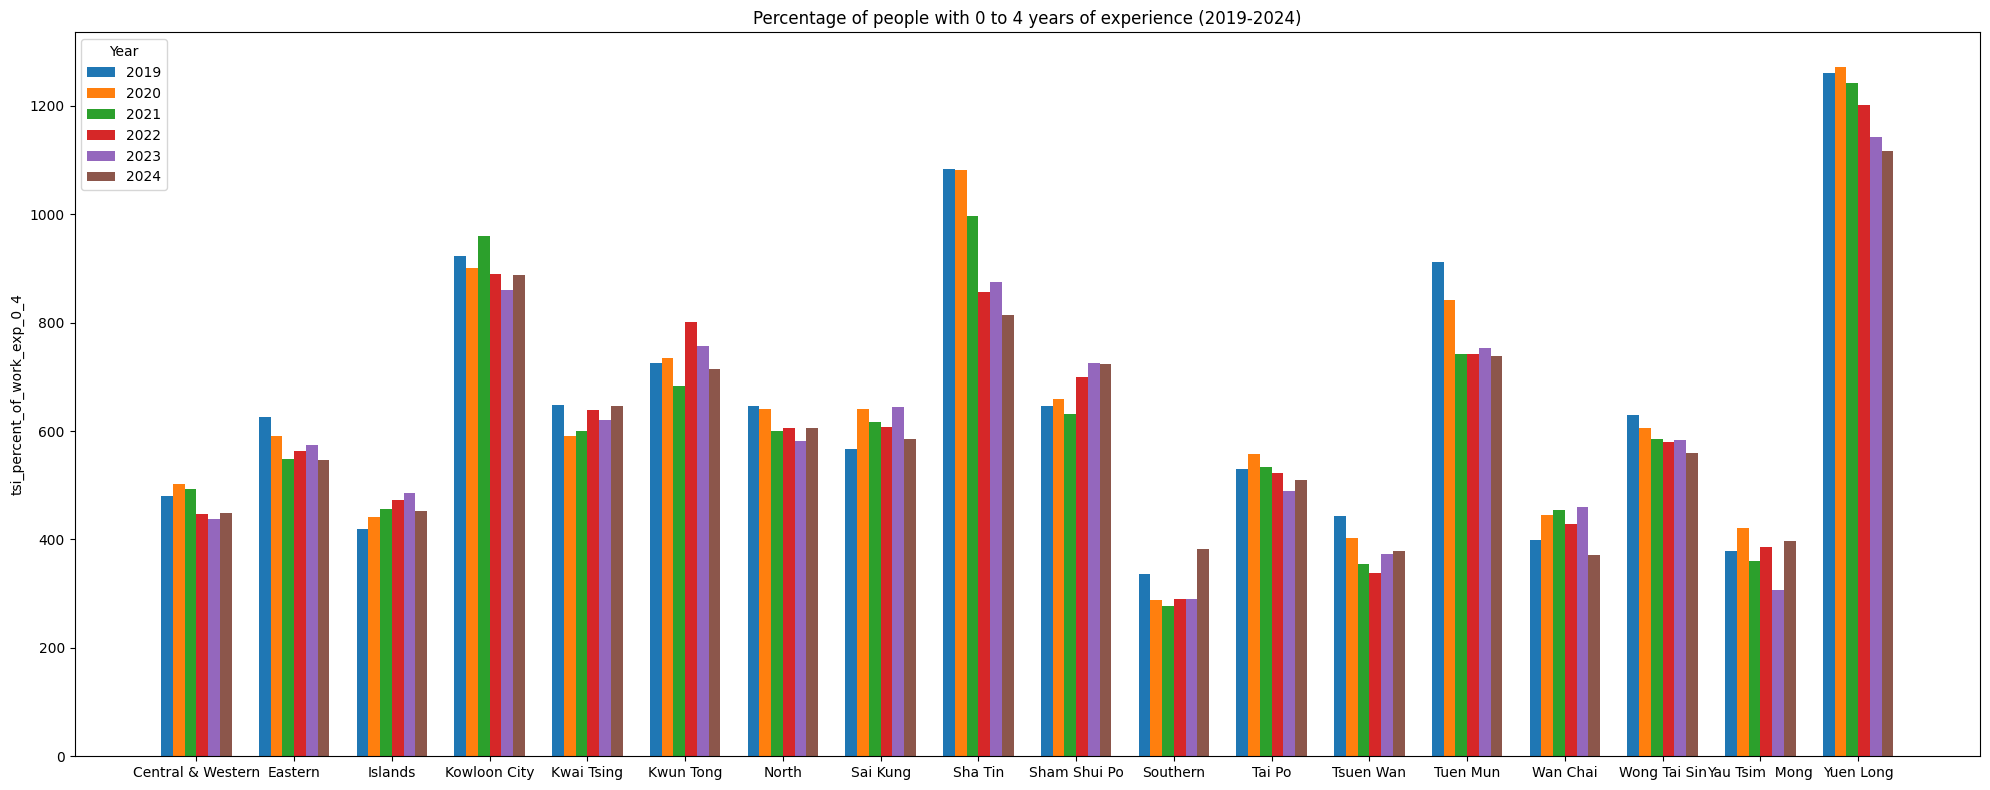

In [ ]:
# Group and calculate by region and year tsi_percent_of_work_exp_0_4 sum
result2 = result.groupby(['district', 'YearN'], as_index=False)['tsi_percent_of_work_exp_0_4'].sum()

# Set column width and position
bar_width = 0.12
positions = np.arange(len(result2['district'].unique()))  # location of each region

# Create graphs and axes
fig, ax = plt.subplots(figsize=(20, 8))

# Plot a histogram for each year
for i, year in enumerate(sorted(result2['YearN'].unique())):
    year_data = result2[result2['YearN'] == year]
    ax.bar(positions + i * bar_width, year_data['tsi_percent_of_work_exp_0_4'],
           width=bar_width, label=str(year))

# Set axis labels and titles
ax.set_xticks(positions + bar_width * (len(sorted(result2['YearN'].unique())) - 1) / 2)
ax.set_xticklabels(result2['district'].unique())
ax.set_ylabel('tsi_percent_of_work_exp_0_4')
ax.set_title('Percentage of people with 0 to 4 years of experience (2019-2024)')

# Add legend
ax.legend(title='Year')

# Show chart
plt.tight_layout()
plt.show()

**This discovery made me wonder if all the teachers are leaving their jobs? Until I found out there was data on 5-9 years of work experience, Then I guess it may be because 4 years of work experience has been changed to 5 years of record here. In order to verify my conjecture, we need to make a comparison. If these two data are inversely proportional, then my guess is possible correct**

In [ ]:
result3 = Bob.groupby(['district', 'YearN'], as_index=False)['tsi_percent_of_work_exp_5_9'].sum()

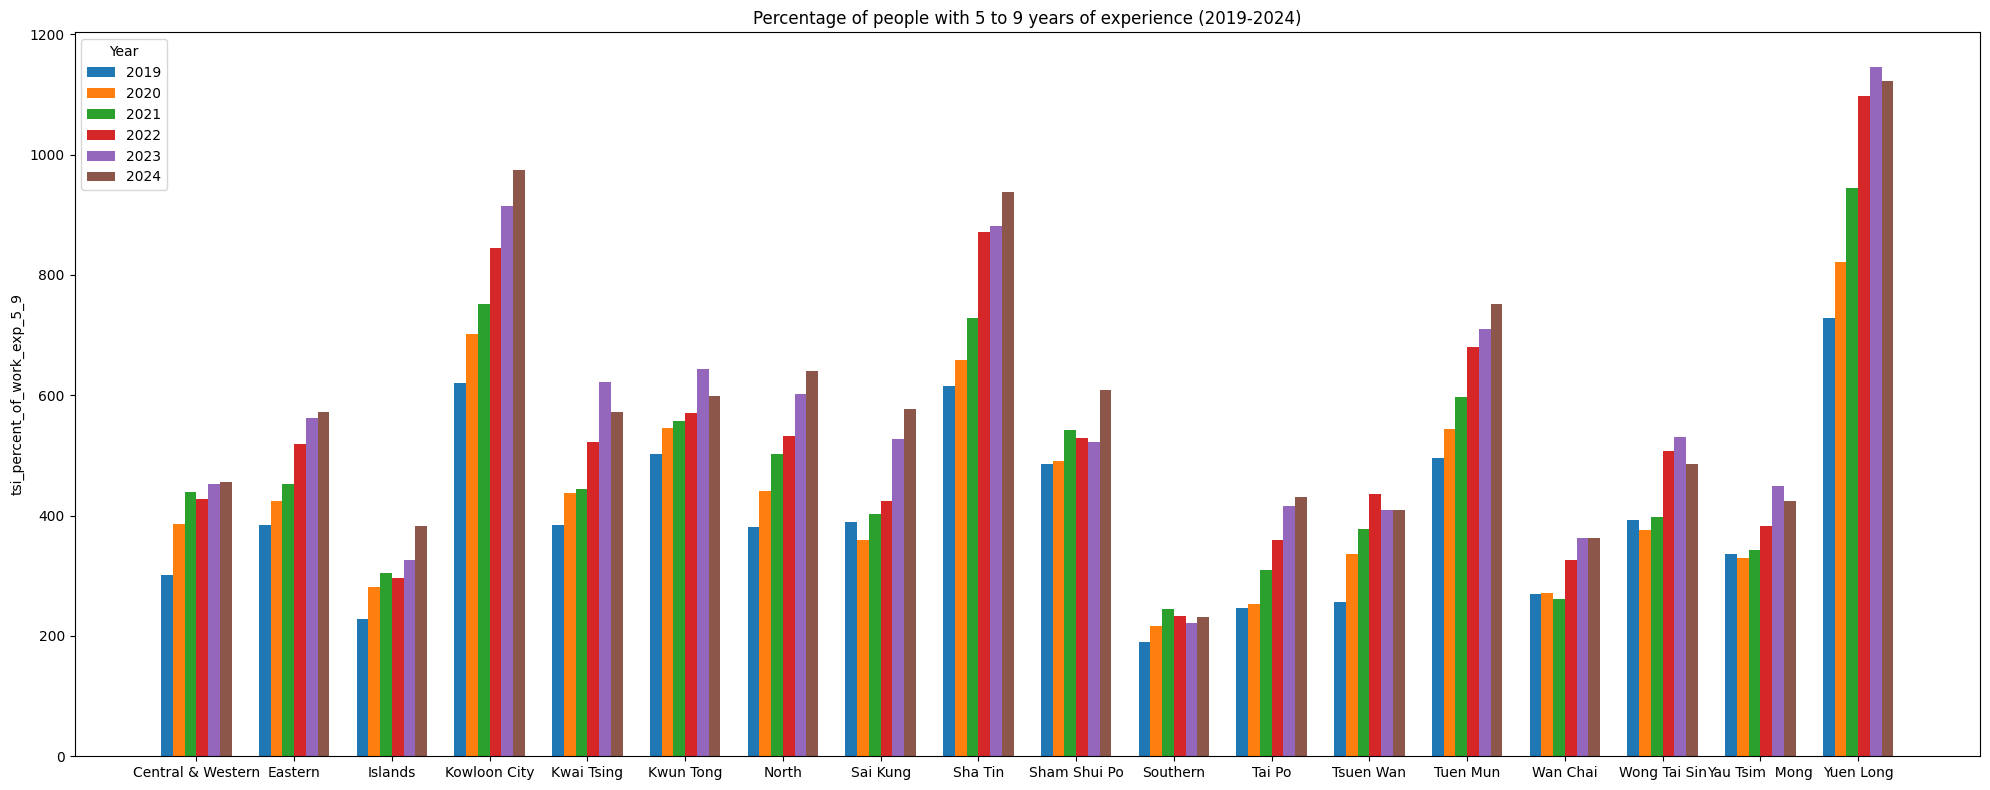

In [ ]:
# Group and calculate by region and year tsi_percent_of_work_exp_5_9 sum
result4 = result3.groupby(['district', 'YearN'], as_index=False)['tsi_percent_of_work_exp_5_9'].sum()

# Set column width and position
bar_width = 0.12
positions = np.arange(len(result3['district'].unique()))
fig, ax = plt.subplots(figsize=(20, 8))
for i, year in enumerate(sorted(result3['YearN'].unique())):
    year_data = result3[result3['YearN'] == year]
    ax.bar(positions + i * bar_width, year_data['tsi_percent_of_work_exp_5_9'],
           width=bar_width, label=str(year))
ax.set_xticks(positions + bar_width * (len(sorted(result3['YearN'].unique())) - 1) / 2)
ax.set_xticklabels(result3['district'].unique())
ax.set_ylabel('tsi_percent_of_work_exp_5_9')
ax.set_title('Percentage of people with 5 to 9 years of experience (2019-2024)')
ax.legend(title='Year')
plt.tight_layout()
plt.show()

**Okay, by combining these two pictures above and below, we should be able to draw some opinions, especially in Shatin and Yuen Long.**


**If you think this is not particularly intuitive, you might as well make a time scrolling sequence image to take a look.**

In [ ]:
result5 = Bob.groupby(['district', 'YearN'], as_index=False).agg({
    'tsi_percent_of_work_exp_0_4': 'sum',
    'tsi_percent_of_work_exp_5_9': 'sum'
})

In [ ]:
import plotly.express as px
fig = px.scatter(result5, x="tsi_percent_of_work_exp_5_9", y="tsi_percent_of_work_exp_0_4", size="tsi_percent_of_work_exp_0_4",
                 color='district', hover_name="district", animation_frame="YearN", size_max=60)
fig.show()

**In this animation, I set the X-axis to the number of teachers with 5-9 years of work experience, and the Y-axis to the number of teachers with 0-4 years of work experience. If the time series goes by, you can see that the ball is declining trends, can explain the relationship between them: We can find that all regions probably show a downward trend. Although we cannot completely guarantee that the conclusion is correct, it can explain the connection between them to a certain extent.**

**Then I discovered the non-standard item charges in this dataset, so i want to find out the changes in this charge, ok but before that, we have to do some data preprocessing because in this column include string and number, i have to extract values from them**

In [11]:
Bob2 = pd.read_csv(path+'contact_dataset1.csv',encoding='utf-8', encoding_errors='ignore')
Bob2['extracted_charges'] = Bob2['asc_charges_for_non_standard_items'].str.extract(r'([-+]?\d*\.\d+|\d+)') #regular expression

# Convert new column to float type (if needed)
Bob2['extracted_charges'] = Bob2['extracted_charges'].astype(float)

# View results
print(Bob2[['district', 'YearN', 'asc_charges_for_non_standard_items', 'extracted_charges']])

               district YearN  \
0     Central & Western  2019   
1              Southern  2019   
2     Central & Western  2019   
3     Central & Western  2019   
4     Central & Western  2019   
...                 ...   ...   
3049          Yuen Long  2024   
3050              North  2024   
3051              North  2024   
3052             Tai Po  2024   
3053                NaN   NaN   

                     asc_charges_for_non_standard_items  extracted_charges  
0                                                   "-"                NaN  
1                                                   "-"                NaN  
2     $300 (for non-standard items and air-condition...              300.0  
3                                         $310 (Annual)              310.0  
4                                                 $200               200.0  
...                                                 ...                ...  
3049                                                  -         

In [12]:
df_filtered = Bob2[Bob2['extracted_charges'] >= 100]
df_filtered.extracted_charges

2       300.0
3       310.0
4       200.0
5       150.0
7       200.0
        ...  
3045    200.0
3046    400.0
3047    450.0
3051    300.0
3052    450.0
Name: extracted_charges, Length: 2085, dtype: float64

In [13]:
summary = df_filtered.groupby(['district', 'YearN'])['extracted_charges'].sum().reset_index()

In [14]:
summary

district YearN  extracted_charges
0    Central & Western  2019             4290.0
1    Central & Western  2020             3660.0
2    Central & Western  2021             3690.0
3    Central & Western  2022             3690.0
4    Central & Western  2023             3490.0
..                 ...   ...                ...
104          Yuen Long  2020            11395.0
105          Yuen Long  2021            11405.0
106          Yuen Long  2022            11405.0
107          Yuen Long  2023            11835.0
108          Yuen Long  2024            12120.0

[109 rows x 3 columns]

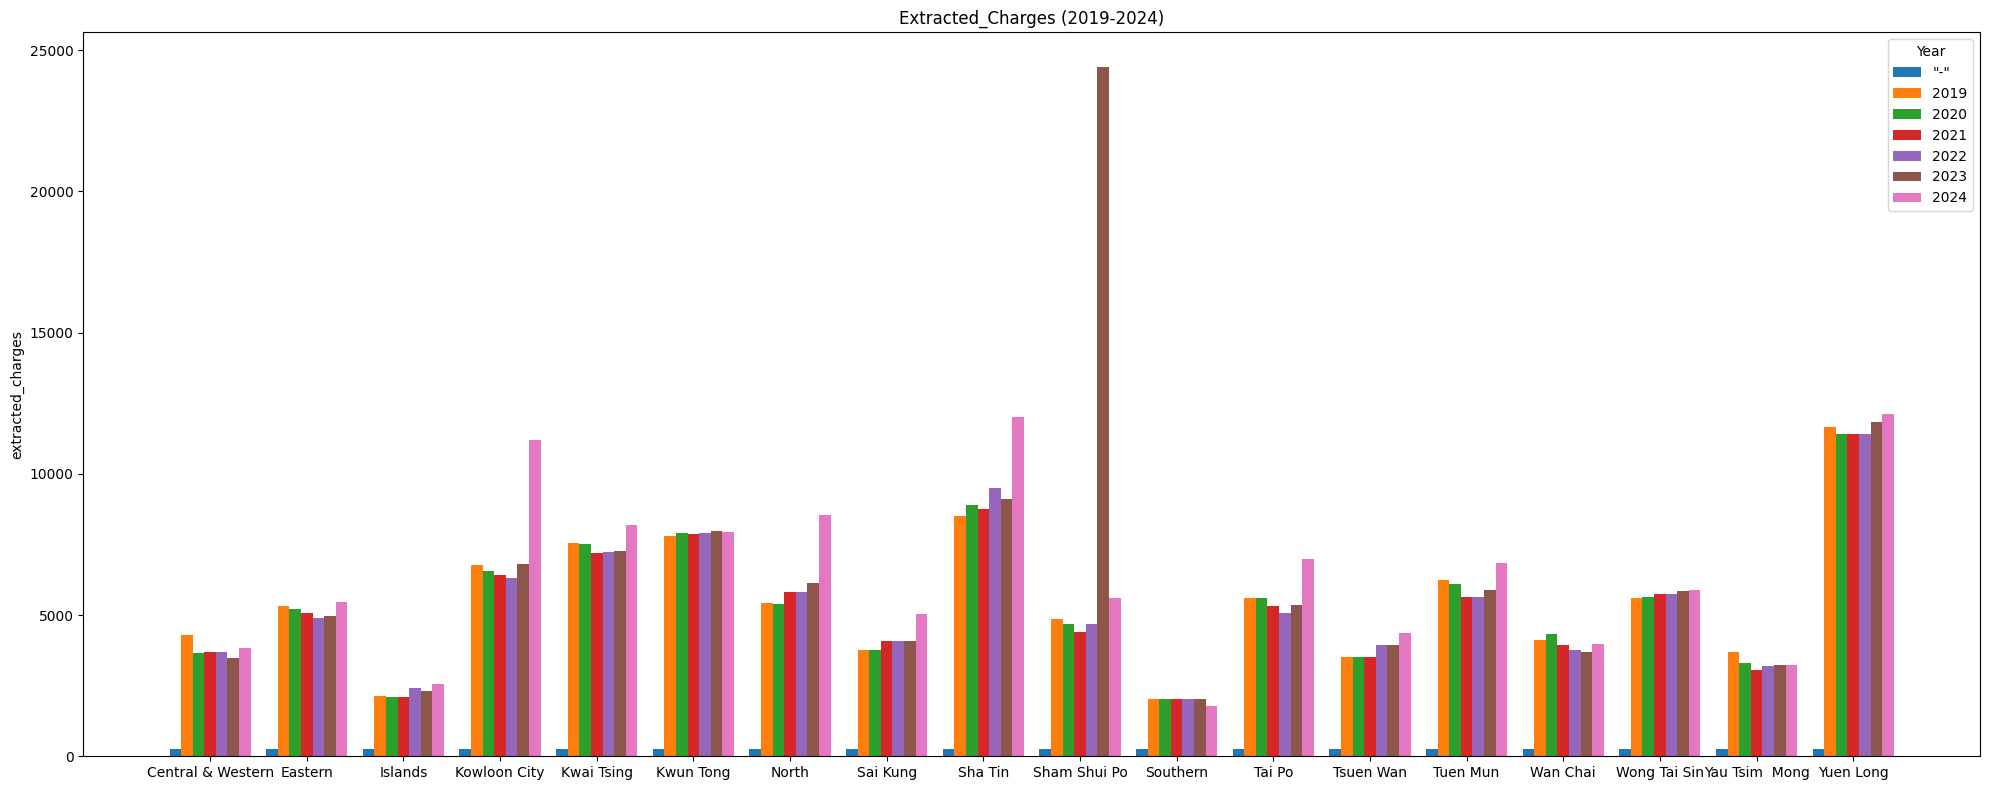

In [7]:
# Set column width and position
bar_width = 0.12
positions = np.arange(len(summary['district'].unique()))
fig, ax = plt.subplots(figsize=(20, 8))
for i, year in enumerate(sorted(summary['YearN'].unique())):
    year_data = summary[summary['YearN'] == year]
    ax.bar(positions + i * bar_width, year_data['extracted_charges'],
           width=bar_width, label=str(year))
ax.set_xticks(positions + bar_width * (len(sorted(summary['YearN'].unique())) - 1) / 2)
ax.set_xticklabels(summary['district'].unique())
ax.set_ylabel('extracted_charges')
ax.set_title('Extracted_Charges (2019-2024)')
ax.legend(title='Year')
plt.tight_layout()
plt.show()

**I'm very surprised that there is a data so huge, then I went back to the data set to check and found that one school held a special event and spent a lot of money. It was an outlier in this data, so I deleted it and regenerated it.**

In [ ]:
df_filtered1 = Bob2[(Bob2['extracted_charges'] >= 100) & (Bob2['extracted_charges'] <= 1000)]
summary1 = df_filtered1.groupby(['district', 'YearN'])['extracted_charges'].sum().reset_index()

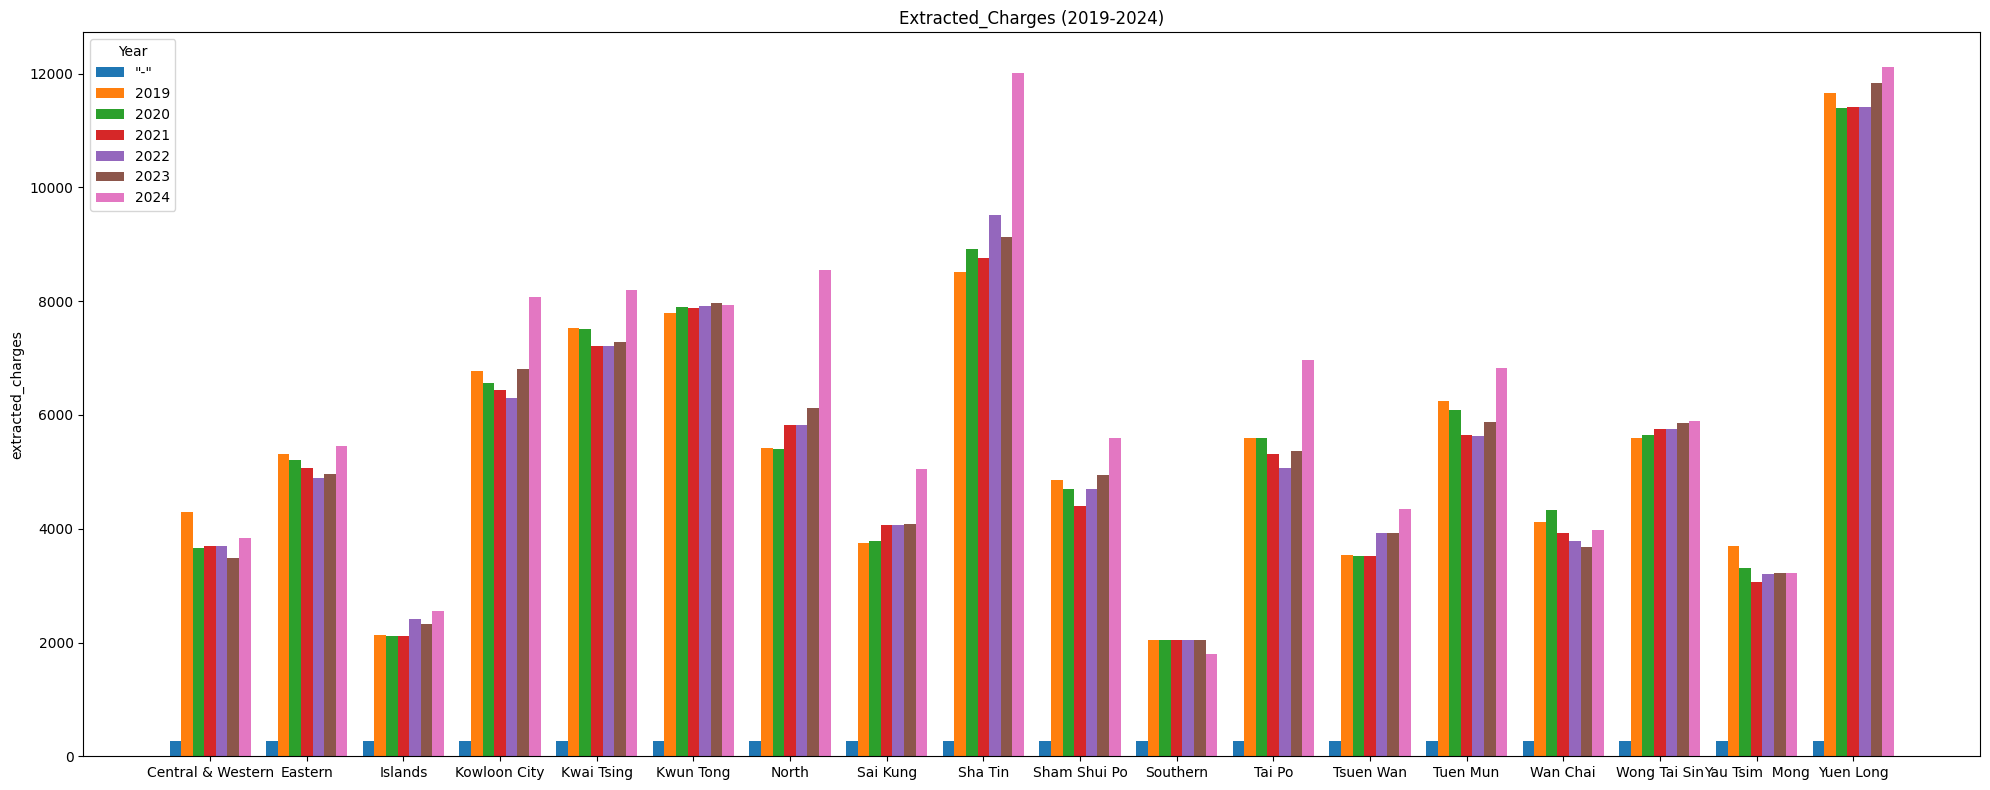

In [ ]:
# Set column width and position
bar_width = 0.12
positions = np.arange(len(summary1['district'].unique()))
fig, ax = plt.subplots(figsize=(20, 8))
for i, year in enumerate(sorted(summary1['YearN'].unique())):
    year_data = summary1[summary1['YearN'] == year]
    ax.bar(positions + i * bar_width, year_data['extracted_charges'],
           width=bar_width, label=str(year))
ax.set_xticks(positions + bar_width * (len(sorted(summary1['YearN'].unique())) - 1) / 2)
ax.set_xticklabels(summary1['district'].unique())
ax.set_ylabel('extracted_charges')
ax.set_title('Extracted_Charges (2019-2024)')
ax.legend(title='Year')
plt.tight_layout()
plt.show()

**After the data processing, I got the normal image and can find that most of the schools have increased their fees in 2024, i want to say in fact, visualization can also be used to help find outliers.**

In [ ]:
summary2 = df_filtered1.groupby(['district', 'YearN'], as_index=False).agg({
    'extracted_charges': 'sum',
    'tsi_percent_of_master_doctorate_or_above': 'sum'
})

**I am also curious about what these increased fees will be used for. Judging from the data set, I can only start from the quality of teachers, such as the percent of master or doctorate in school**

In [ ]:
import plotly.express as px
fig = px.scatter(summary2, x="tsi_percent_of_master_doctorate_or_above", y="extracted_charges", size="tsi_percent_of_master_doctorate_or_above",
                 color='district', hover_name="district", animation_frame="YearN", size_max=60)
fig.show()

**After the display, I think there may be some correlation between them, but it is difficult to draw conclusions based on these data. If we truly wanna know it more in-depth investigation and research are needed.**

# **4 The relationship between academic performance (e.g. HKMO/HKSMSA competition results) and various school attributes**

## 4.1  Analyzing the factors that affect students' winning of competitions




### 4.1.1 Load the Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/Computing With Big Data/Group Project/Competition/'
data2021 = pd.read_csv(path+'merged_data2021.csv')

In [ ]:
mergedData2021 = pd.read_csv(path+'mergedData2021.csv')

### 4.1.2 Data Preprocessing and Data Cleaning



1.   Check if there are missing values



In [ ]:
missing_values = data2021.isnull().sum()
print(missing_values)
has_missing_values = data2021.isnull().values.any()
print("数据集中是否存在缺失值:", has_missing_values)

區域      0
子區域     0
學校編號    0
學校名稱    0
年級      0
考生編號    0
學生姓名    0
獎項      0
dtype: int64
数据集中是否存在缺失值: False







2.  Solve the problem that Traditional Chinese cannot be displayed





In [ ]:
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.7/dist-packages/matplotlib//mpl-data/fonts/ttf

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

font_path = '/content/taipei_sans_tc_beta.ttf'
fm.fontManager.addfont(font_path)
prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = prop.get_name()
sns.set(font=prop.get_name(), style="whitegrid")

--2024-12-06 09:07:43--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 108.177.97.138, 108.177.97.100, 108.177.97.101, ...
Connecting to drive.google.com (drive.google.com)|108.177.97.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-12-06 09:07:44--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.187.132, 2404:6800:4008:c05::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.187.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘taipei_sans_tc_beta.ttf’

taipei_sans_tc_beta 100%[===================>]  19.70M  61.7MB/s    in 0.3s    

2024-12-06 09:07:47 (6

3.  Merge the dataframes(the whole information and the award one)

In [ ]:
merged_df = pd.merge(mergedData2021, data2021, on='學校名稱', how='left')

4.  Rename and drop the columns that are duplicated

In [ ]:
merged_df = merged_df[['區域_x', '子區域_x', '學校代碼', '學校名稱', '學校類別1', '學生性別', '教學語言', '課室數目',
       '教師總人數', '學士人數百分率', '碩士_博士或以上人數百分率', '特殊教育培訓人數百分率', '0至4年經驗人數百分率',
       '5至9年經驗人數百分率', '10年經驗或以上人數百分率', '本學年小一班數', '本學年小二班數', '本學年小三班數',
       '本學年小四班數', '本學年小五班數', '本學年小六班數', '本學年總班數', '全年全科測驗次數', '每日一般上課節數',
       '每節一般時間', '學校編號', '年級', '考生編號', '學生姓名', '獎項']]

In [ ]:
merged_df = merged_df.rename(columns={'區域_x':'區域','子區域_x':'子區域'})

### 4.1.3 Analyze from different perspectives in the combined data



#### 4.1.3.1   Check the relationship between the winning position and the two most likely factors



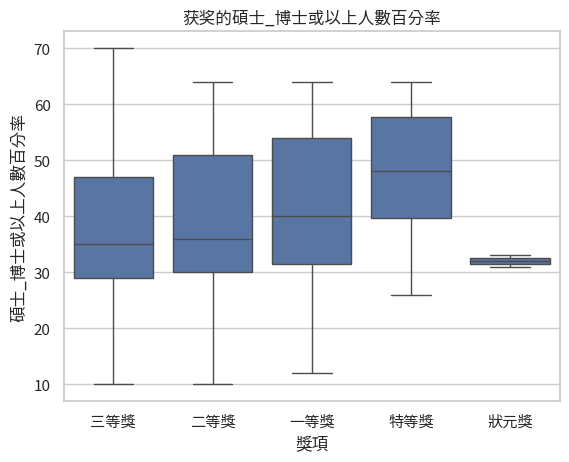

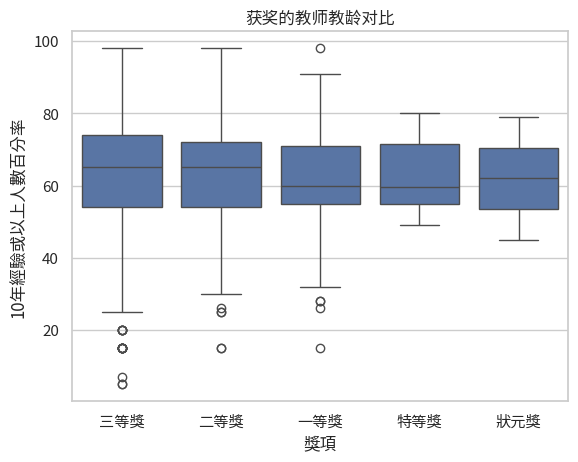

In [ ]:
sns.boxplot(x='獎項', y='碩士_博士或以上人數百分率', data=merged_df)
plt.title('获奖的碩士_博士或以上人數百分率')
plt.show()

sns.boxplot(x='獎項', y='10年經驗或以上人數百分率', data=merged_df)
plt.title('获奖的教师教龄对比')
plt.show()

**Result:**
*   From the first picture, we can see that schools with more teachers with master's and doctoral degrees are more likely to win the special prize, but the top prize is not in these highly educated schools.
*   The second picture shows that teachers with more than 10 years of teaching experience cannot obviously help students get better rankings in the competition.
*   There may be a more obvious relationship between these two pictures, which will be tested later using the t-test method.




#### 4.1.3.2 Use t-test to check specific influencing factors



1.   Mark whether the school has won an award by add a new label column





In [ ]:
merged_df_if_award = pd.merge(mergedData2021, data2021[['學校名稱', '獎項']], on='學校名稱', how='left')
merged_df_if_award['是否獲獎'] = merged_df_if_award['獎項'].notna().astype(int)

print(merged_df_if_award.head())

   區域  子區域    學校代碼       學校名稱 學校類別1 學生性別 教學語言  課室數目  教師總人數  學士人數百分率  ...  \
0  港島  中西區  AP0078  中西區聖安多尼學校    資助   男女   中文    18     40      100  ...   
1  港島  中西區  AP0078  中西區聖安多尼學校    資助   男女   中文    18     40      100  ...   
2  港島  中西區  AP0052   天主教總堂區學校    資助   男女   英文    24     36       95  ...   
3  港島  中西區  AP0311       李陞小學    官立   男女   中文    12     25       96  ...   
4  港島  中西區  AP0311       李陞小學    官立   男女   中文    12     25       96  ...   

   本學年小三班數  本學年小四班數  本學年小五班數  本學年小六班數  本學年總班數  全年全科測驗次數  每日一般上課節數  每節一般時間  \
0      3.0      3.0      3.0      3.0      18         2         9      35   
1      3.0      3.0      3.0      3.0      18         2         9      35   
2      4.0      4.0      4.0      4.0      24         2         9      35   
3      2.0      2.0      2.0      2.0      12         2         8      35   
4      2.0      2.0      2.0      2.0      12         2         8      35   

    獎項  是否獲獎  
0  三等獎     1  
1  三等獎     1  
2  NaN     0  
3  二等獎     1  
4  三等

In [ ]:
(merged_df_if_award['是否獲獎']).value_counts()

是否獲獎
1    1869
0     142
Name: count, dtype: int64

2.   Check the relationship between teachers' bachelor's degree and whether they have won awards



<ipython-input-58-52f5d35f33cc>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




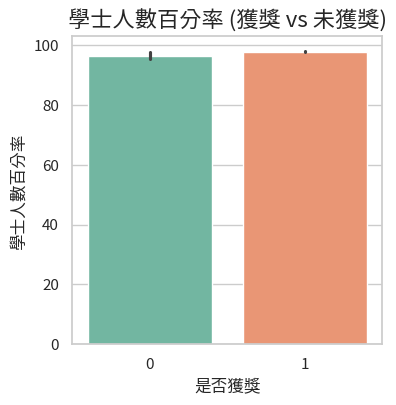

In [ ]:
award_info1 = merged_df_if_award[merged_df_if_award['是否獲獎'] == 1]['學士人數百分率'].dropna()
no_award_info1 = merged_df_if_award[merged_df_if_award['是否獲獎'] == 0]['學士人數百分率'].dropna()

data1 = pd.DataFrame({
    '是否獲獎': [1] * len(award_info1) + [0] * len(no_award_info1),
    '學士人數百分率': award_info1.tolist() + no_award_info1.tolist()
})

plt.figure(figsize=(4, 4))
ax1 = sns.barplot(x='是否獲獎', y='學士人數百分率', data=data1, palette='Set2')

plt.title('學士人數百分率 (獲獎 vs 未獲獎)', fontsize=16)
plt.xlabel('是否獲獎', fontsize=12)
plt.ylabel('學士人數百分率', fontsize=12)
plt.show()


**Result:**
*   Choosing a bar chart here can give us a more intuitive view of the distribution of the number of teachers with a bachelor's degree. You can see that the proportion of teachers with a bachelor's degree in the award-winning and non-award-winning groups is not much different, so it can be concluded that teachers with a bachelor's degree have little influence on whether students win awards.

3.   Check the relationship between teachers with master's, doctoral and above degrees and whether they have received awards

In [ ]:
from scipy import stats

award_info2 = merged_df_if_award[merged_df_if_award['是否獲獎'] == 1]['碩士_博士或以上人數百分率']
no_award_info2 = merged_df_if_award[merged_df_if_award['是否獲獎'] == 0]['碩士_博士或以上人數百分率']

t_stat, p_value = stats.ttest_ind(award_info2, no_award_info2, nan_policy='omit')

print(f"碩士_博士或以上人數百分率 t检验结果: T-statistic = {t_stat}, p-value = {p_value}")


碩士_博士或以上人數百分率 t检验结果: T-statistic = 6.760070325543405, p-value = 1.8016066240701707e-11


<ipython-input-60-493f0f932b16>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




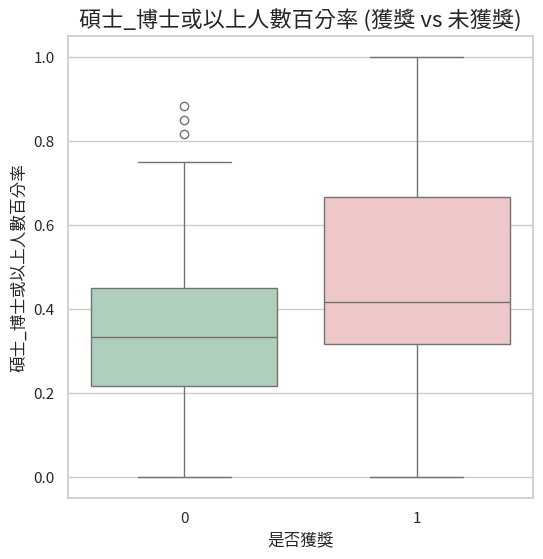

In [ ]:
from sklearn.preprocessing import MinMaxScaler

data2 = pd.DataFrame({
    '是否獲獎': [1] * len(award_info2) + [0] * len(no_award_info2),
    '碩士_博士或以上人數百分率': award_info2.tolist() + no_award_info2.tolist()
})

scaler = MinMaxScaler()
data2['碩士_博士或以上人數百分率'] = scaler.fit_transform(data2[['碩士_博士或以上人數百分率']])

plt.figure(figsize=(6, 6))
colors = ['#a8d5ba', '#f4c2c2']
ax2 = sns.boxplot(x='是否獲獎', y='碩士_博士或以上人數百分率', data=data2, palette=colors)

for box in ax2.artists:
    box.set_edgecolor('black')
    box.set_linewidth(1.5)

plt.title('碩士_博士或以上人數百分率 (獲獎 vs 未獲獎)', fontsize=16)
plt.xlabel('是否獲獎', fontsize=12)
plt.ylabel('碩士_博士或以上人數百分率', fontsize=12)
plt.show()

**Result:**
*   Through the t-test and box plot, we can see intuitively that among the award-winning schools, teachers with master's degrees or above account for a large proportion. This also shows that these highly educated teachers may have their own unique methods in teaching or have relevant competition experience, which can help students get a name in the competition more easily.

4.   Check the relationship between the total number of teachers and whether they have received awards

In [ ]:
award_info3 = merged_df_if_award[merged_df_if_award['是否獲獎'] == 1]['教師總人數']
no_award_info3 = merged_df_if_award[merged_df_if_award['是否獲獎'] == 0]['教師總人數']

t_stat, p_value = stats.ttest_ind(award_info3, no_award_info3, nan_policy='omit')

print(f"教師總人數百分率 t检验结果: T-statistic = {t_stat}, p-value = {p_value}")

教師總人數百分率 t检验结果: T-statistic = 11.194501894285755, p-value = 2.920173854310932e-28


<ipython-input-61-399765102af0>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




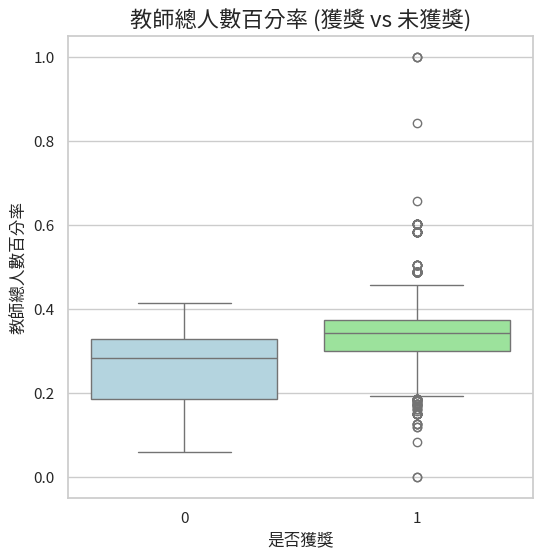

In [ ]:
data3 = pd.DataFrame({
    '是否獲獎': [1] * len(award_info3) + [0] * len(no_award_info3),
    '教師總人數百分率': award_info3.tolist() + no_award_info3.tolist()
})

scaler = MinMaxScaler()
data3['教師總人數百分率'] = scaler.fit_transform(data3[['教師總人數百分率']])

plt.figure(figsize=(6, 6))
colors = ['#add8e6', '#90ee90']
ax3 = sns.boxplot(x='是否獲獎', y='教師總人數百分率', data=data3, palette=colors)

for box in ax3.artists:
    box.set_edgecolor('black')
    box.set_linewidth(1.5)

plt.title('教師總人數百分率 (獲獎 vs 未獲獎)', fontsize=16)
plt.xlabel('是否獲獎', fontsize=12)
plt.ylabel('教師總人數百分率', fontsize=12)
plt.show()

**Result:**
*   Through the t-test and box plot, we can see intuitively that in the winning schools, the proportion of the total number of teachers is larger than that in the non-winning schools. This shows that these winning schools will hire many teachers to offer different courses to help students learn in all aspects, which is likely to enable students to achieve better results in the competition.

5.   Check the relationship between teachers with more than 10 years of teaching experience and whether they have won awards

In [ ]:
award_info4 = merged_df_if_award[merged_df_if_award['是否獲獎'] == 1]['10年經驗或以上人數百分率']
no_award_info4 = merged_df_if_award[merged_df_if_award['是否獲獎'] == 0]['10年經驗或以上人數百分率']

t_stat, p_value = stats.ttest_ind(award_info4, no_award_info4, nan_policy='omit')

print(f"10年經驗或以上人數百分率 t检验结果: T-statistic = {t_stat}, p-value = {p_value}")

10年經驗或以上人數百分率 t检验结果: T-statistic = 2.493239399374773, p-value = 0.012738266371757396


<ipython-input-62-3eea8e19e338>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




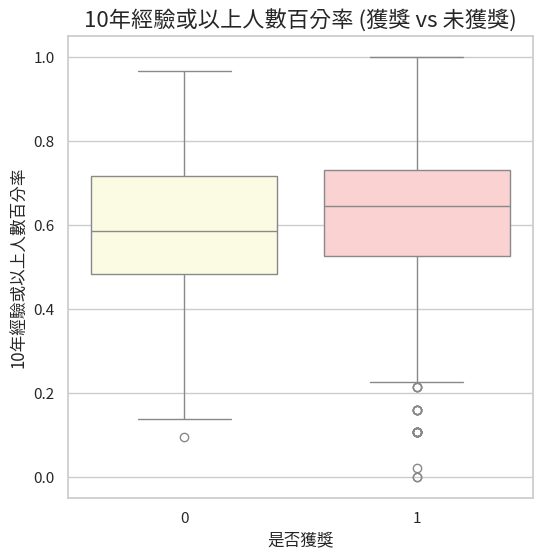

In [ ]:
data4 = pd.DataFrame({
    '是否獲獎': [1] * len(award_info4) + [0] * len(no_award_info4),
    '10年經驗或以上人數百分率': award_info4.tolist() + no_award_info4.tolist()
})

scaler = MinMaxScaler()
data4['10年經驗或以上人數百分率'] = scaler.fit_transform(data4[['10年經驗或以上人數百分率']])

plt.figure(figsize=(6, 6))
colors = ['#ffffe0', '#ffcccb']
ax4 = sns.boxplot(x='是否獲獎', y='10年經驗或以上人數百分率', data=data4, palette=colors)

for box in ax4.artists:
    box.set_edgecolor('black')
    box.set_linewidth(1.5)

plt.title('10年經驗或以上人數百分率 (獲獎 vs 未獲獎)', fontsize=16)
plt.xlabel('是否獲獎', fontsize=12)
plt.ylabel('10年經驗或以上人數百分率', fontsize=12)
plt.show()

**Result:**
*   Through the t-test and box plot, we can see intuitively that in the award-winning schools, the proportion of teachers with more than 10 years of teaching experience is larger than that in the non-award-winning schools. This shows that these award-winning schools will hire many teachers with rich teaching experience to teach courses, helping students to learn in an all-round, in-depth and methodical way, which is likely to enable students to achieve better results in the competition.

6.   See the relationship between teachers with 0 to 4 years of teaching experience and whether they have won awards

In [ ]:
award_info8 = merged_df_if_award[merged_df_if_award['是否獲獎'] == 1]['0至4年經驗人數百分率']
no_award_info8 = merged_df_if_award[merged_df_if_award['是否獲獎'] == 0]['0至4年經驗人數百分率']

t_stat, p_value = stats.ttest_ind(award_info8, no_award_info8, nan_policy='omit')

print(f"0至4年經驗人數百分率 t检验结果: T-statistic = {t_stat}, p-value = {p_value}")

0至4年經驗人數百分率 t检验结果: T-statistic = -2.245963216559003, p-value = 0.024814644887450582


<ipython-input-63-c453f71a7ff0>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




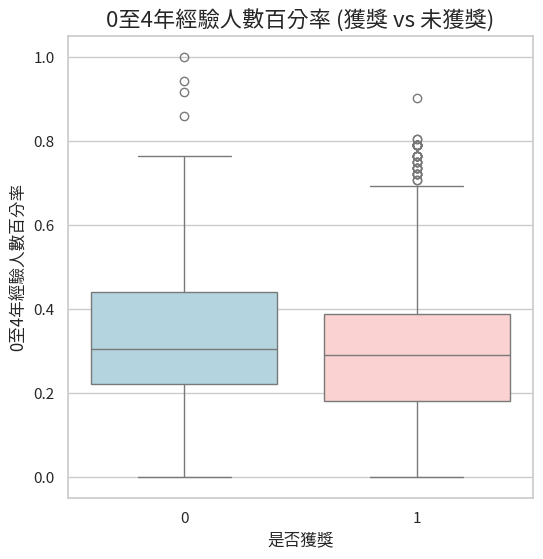

In [ ]:
data8 = pd.DataFrame({
    '是否獲獎': [1] * len(award_info8) + [0] * len(no_award_info8),
    '0至4年經驗人數百分率': award_info8.tolist() + no_award_info8.tolist()
})

scaler = MinMaxScaler()
data8['0至4年經驗人數百分率'] = scaler.fit_transform(data8[['0至4年經驗人數百分率']])

plt.figure(figsize=(6, 6))
colors = ['#add8e6', '#ffcccb']
ax8 = sns.boxplot(x='是否獲獎', y='0至4年經驗人數百分率', data=data8, palette=colors)

for box in ax8.artists:
    box.set_edgecolor('black')
    box.set_linewidth(1.5)

plt.title('0至4年經驗人數百分率 (獲獎 vs 未獲獎)', fontsize=16)
plt.xlabel('是否獲獎', fontsize=12)
plt.ylabel('0至4年經驗人數百分率', fontsize=12)
plt.show()

**Result:**
*   Through t-test and box plot, we can find that the proportion of teachers with 0-4 years of teaching experience in non-award-winning schools is higher than that in winning schools. That is to say, teachers with 0-4 years of teaching experience may still have a gap in teaching methods and approaches with teachers with more than 10 years of teaching experience. This is probably the reason why the probability of non-award-winning schools winning is not high.

7.   See the relationship between teachers with 5 to 9 years of teaching experience and whether they have won awards

In [ ]:
award_info9 = merged_df_if_award[merged_df_if_award['是否獲獎'] == 1]['5至9年經驗人數百分率']
no_award_info9 = merged_df_if_award[merged_df_if_award['是否獲獎'] == 0]['5至9年經驗人數百分率']

t_stat, p_value = stats.ttest_ind(award_info9, no_award_info9, nan_policy='omit')

print(f"5至9年經驗人數百分率 t检验结果: T-statistic = {t_stat}, p-value = {p_value}")

5至9年經驗人數百分率 t检验结果: T-statistic = -1.3779521637602967, p-value = 0.16837151365776526


<ipython-input-64-3990509ddeef>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




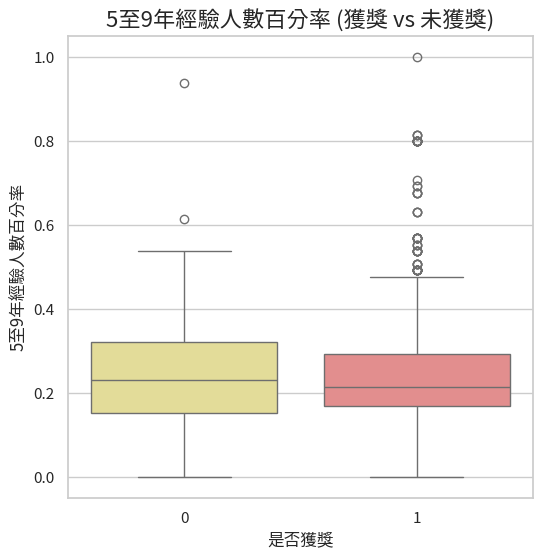

In [ ]:
data9 = pd.DataFrame({
    '是否獲獎': [1] * len(award_info9) + [0] * len(no_award_info9),
    '5至9年經驗人數百分率': award_info9.tolist() + no_award_info9.tolist()
})

scaler = MinMaxScaler()
data9['5至9年經驗人數百分率'] = scaler.fit_transform(data9[['5至9年經驗人數百分率']])

plt.figure(figsize=(6, 6))
colors = ['#f0e68c', '#f08080']
ax9 = sns.boxplot(x='是否獲獎', y='5至9年經驗人數百分率', data=data9, palette=colors)

for box in ax9.artists:
    box.set_edgecolor('black')
    box.set_linewidth(1.5)

plt.title('5至9年經驗人數百分率 (獲獎 vs 未獲獎)', fontsize=16)
plt.xlabel('是否獲獎', fontsize=12)
plt.ylabel('5至9年經驗人數百分率', fontsize=12)
plt.show()

**Result:**
*   Through t-test and box plot, we can find that the proportion of teachers with 5-9 years of teaching experience in non-award-winning schools is slightly higher than that in winning schools. It can be seen that teachers with 5-9 years of teaching experience may still have a gap in teaching methods and approaches with teachers with more than 10 years of teaching experience, but this gap is smaller than that of teachers with 0-4 years of teaching experience. This is most likely the reason why the probability of winning is not high for non-award-winning schools.

8.   Check the relationship between the number of full-subject tests throughout the year and whether or not an award is received

In [ ]:
award_info5 = merged_df_if_award[merged_df_if_award['是否獲獎'] == 1]['全年全科測驗次數']
no_award_info5 = merged_df_if_award[merged_df_if_award['是否獲獎'] == 0]['全年全科測驗次數']

t_stat, p_value = stats.ttest_ind(award_info5, no_award_info5, nan_policy='omit')

print(f"全年全科測驗次數 t检验结果: T-statistic = {t_stat}, p-value = {p_value}")

全年全科測驗次數 t检验结果: T-statistic = 0.14340496715275694, p-value = 0.8859847420582733


<ipython-input-66-7a1f4caefa7f>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




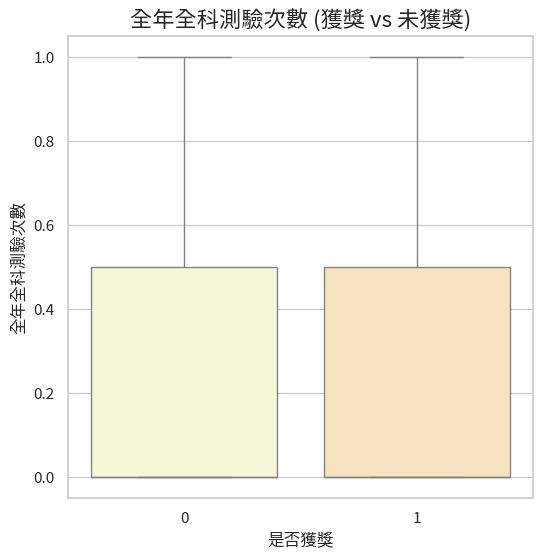

In [ ]:
data5 = pd.DataFrame({
    '是否獲獎': [1] * len(award_info5) + [0] * len(no_award_info5),
    '全年全科測驗次數': award_info5.tolist() + no_award_info5.tolist()
})

scaler = MinMaxScaler()
data5['全年全科測驗次數'] = scaler.fit_transform(data5[['全年全科測驗次數']])

plt.figure(figsize=(6, 6))
colors = ['#fafad2', '#ffe4b5']
ax5 = sns.boxplot(x='是否獲獎', y='全年全科測驗次數', data=data5, palette=colors)

for box in ax5.artists:
    box.set_edgecolor('black')
    box.set_linewidth(1.5)

plt.title('全年全科測驗次數 (獲獎 vs 未獲獎)', fontsize=16)
plt.xlabel('是否獲獎', fontsize=12)
plt.ylabel('全年全科測驗次數', fontsize=12)
plt.show()

**Result:**
*   Through t-test and box plot, we can find that the number of full-subject tests throughout the year is not much different in the two groups of award-winning and non-award-winning groups, indicating that the number of full-subject tests throughout the year has little effect on whether students win awards in the competition. This may be because the content of the competition is different from the content of the class. The knowledge in the competition is more profound and requires experienced teachers to provide specialized teaching, so that students can stand out in the competition.

9.   Check the relationship between the average time of each class and whether or not you get an award

In [ ]:
award_info6 = merged_df_if_award[merged_df_if_award['是否獲獎'] == 1]['每節一般時間']
no_award_info6 = merged_df_if_award[merged_df_if_award['是否獲獎'] == 0]['每節一般時間']

t_stat, p_value = stats.ttest_ind(award_info6, no_award_info6, nan_policy='omit')

print(f"每節一般時間 t检验结果: T-statistic = {t_stat}, p-value = {p_value}")

每節一般時間 t检验结果: T-statistic = 0.4987040954873172, p-value = 0.618042455374638


<ipython-input-68-462af72dc79e>:8: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-68-462af72dc79e>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




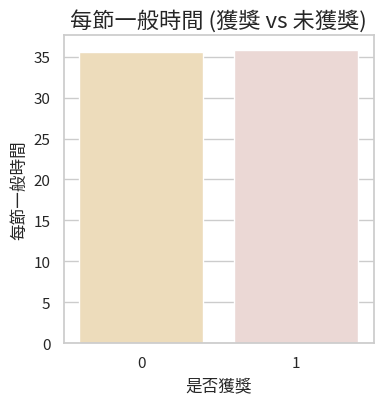

In [ ]:
data6 = pd.DataFrame({
    '是否獲獎': [1] * len(award_info6) + [0] * len(no_award_info6),
    '每節一般時間': award_info6.tolist() + no_award_info6.tolist()
})

plt.figure(figsize=(4, 4))
colors = ['#f5deb3', '#eed5d2']
sns.barplot(x='是否獲獎', y='每節一般時間', data=data6, palette=colors, ci=None)

plt.title('每節一般時間 (獲獎 vs 未獲獎)', fontsize=16)
plt.xlabel('是否獲獎', fontsize=12)
plt.ylabel('每節一般時間', fontsize=12)
plt.show()

**Result:**
*   Through t-test and bar chart, we can find that the time of each class is not much different between the winning group and the non-winning group, which shows that the time of each class has little effect on whether students win the prize in the competition. This may be because the content of the competition is different from the content of the class, so it has little to do with the content and time of normal classes.

10.   Check the relationship between the number of classrooms and whether or not you receive an award

In [ ]:
award_info7 = merged_df_if_award[merged_df_if_award['是否獲獎'] == 1]['課室數目']
no_award_info7 = merged_df_if_award[merged_df_if_award['是否獲獎'] == 0]['課室數目']

t_stat, p_value = stats.ttest_ind(award_info7, no_award_info7, nan_policy='omit')

print(f"課室數目 t检验结果: T-statistic = {t_stat}, p-value = {p_value}")

課室數目 t检验结果: T-statistic = 10.763796101241121, p-value = 2.621860835428183e-26


<ipython-input-69-874aa8d781e9>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




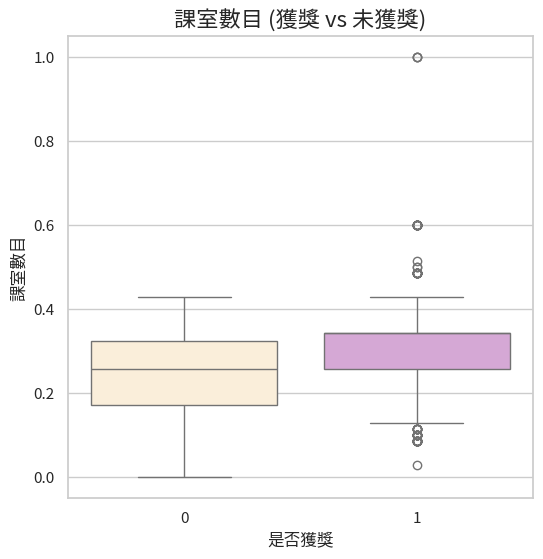

In [ ]:
data7 = pd.DataFrame({
    '是否獲獎': [1] * len(award_info7) + [0] * len(no_award_info7),
    '課室數目': award_info7.tolist() + no_award_info7.tolist()
})

scaler = MinMaxScaler()
data7['課室數目'] = scaler.fit_transform(data7[['課室數目']])

plt.figure(figsize=(6, 6))
colors = ['#ffefd5', '#dda0dd']
ax7 = sns.boxplot(x='是否獲獎', y='課室數目', data=data7, palette=colors)

for box in ax7.artists:
    box.set_edgecolor('black')
    box.set_linewidth(1.5)

plt.title('課室數目 (獲獎 vs 未獲獎)', fontsize=16)
plt.xlabel('是否獲獎', fontsize=12)
plt.ylabel('課室數目', fontsize=12)
plt.show()

**Result:**
*   Through t-test and box plot, we can find that the number of classrooms in the winning schools is more than that in the non-winning schools. This shows that the winning schools will spend more financial resources on teaching facilities and may set up classrooms in different subjects and fields to provide students with specialized teaching, so that these students can achieve better performance in the competition.

**Part 4.1 Conclusion:**
*   In section 4.1, it can be concluded that students’ awards are related to the following factors:
*   Teacher’s education level is master’s or doctoral degree or above
*   Total number of teachers
*   Teacher’s teaching experience is 10 years or more than 10 years
*   Number of classrooms




## 4.2  Find the school type of Top 10 most awarded schools in each year



In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/COM6001 Group Project/Part 1 (Wing)/Part 4 DataSet/'

Code explanation:

*  Combine awarded list csv file and school profiles csv file, then find out top 10 most awarded school is.

*  And also find out what school type of those schools are

**4.2.1 2021 Year**

In [ ]:
import pandas as pd

# Load the CSV files into DataFrames
winners_df = pd.read_csv(path+'merged_data2021.csv')
profiles_df = pd.read_csv(path+'final_school_profiles_tc.csv')

# Count the number of winners for each school
school_winner_counts = winners_df['學校名稱'].value_counts()

# Get the top 10 schools with the most winners
top_10_schools = school_winner_counts.head(10)

# Convert top 10 schools to a DataFrame
top_10_df = top_10_schools.reset_index()
top_10_df.columns = ['學校名稱', '獲獎人數']

# Merge with school profiles to get school types
merged_df = pd.merge(top_10_df, profiles_df[['學校名稱', '學校類別1']], on='學校名稱', how='left')

# Display the results
print("Top 10 schools with the most winners and their types:")
print(merged_df)

Top 10 schools with the most winners and their types:
         學校名稱  獲獎人數 學校類別1
0   拔萃男書院附屬小學    69    直資
1    聖方濟各英文小學    44    私立
2  優才（楊殷有娣）書院    44    直資
3        英華小學    43    直資
4        弘立書院    34   NaN
5        培僑書院    31    直資
6     聖保羅書院小學    30    直資
7       聖若瑟小學    29    資助
8       拔萃女小學    28    私立
9        蘇浙小學    28   NaN


**4.2.2 2022 Year**

In [ ]:
import pandas as pd

# Load the CSV files into DataFrames
winners_df = pd.read_csv(path+'merged_data2022.csv')
profiles_df = pd.read_csv(path+'final_school_profiles_tc.csv')

# Count the number of winners for each school
school_winner_counts = winners_df['學校名稱'].value_counts()

# Get the top 10 schools with the most winners
top_10_schools = school_winner_counts.head(10)

# Convert top 10 schools to a DataFrame
top_10_df = top_10_schools.reset_index()
top_10_df.columns = ['學校名稱', '獲獎人數']

# Merge with school profiles to get school types
merged_df = pd.merge(top_10_df, profiles_df[['學校名稱', '學校類別1']], on='學校名稱', how='left')

# Display the results
print("Top 10 schools with the most winners and their types:")
print(merged_df)

Top 10 schools with the most winners and their types:
         學校名稱  獲獎人數 學校類別1
0   拔萃男書院附屬小學    72    直資
1        英華小學    59    直資
2  優才（楊殷有娣）書院    54    直資
3       聖若瑟小學    37    資助
4        培僑書院    36    直資
5       拔萃女小學    35    私立
6    聖方濟各英文小學    35    私立
7        喇沙小學    32    資助
8      香港培正小學    32    私立
9     九龍塘宣道小學    28    私立


**4.2.3 2023 Year**

In [ ]:
import pandas as pd

# Load the CSV files into DataFrames
winners_df = pd.read_csv(path+'merged_data2023.csv')
profiles_df = pd.read_csv(path+'final_school_profiles_tc.csv')

# Count the number of winners for each school
school_winner_counts = winners_df['學校名稱'].value_counts()

# Get the top 10 schools with the most winners
top_10_schools = school_winner_counts.head(10)

# Convert top 10 schools to a DataFrame
top_10_df = top_10_schools.reset_index()
top_10_df.columns = ['學校名稱', '獲獎人數']

# Merge with school profiles to get school types
merged_df = pd.merge(top_10_df, profiles_df[['學校名稱', '學校類別1']], on='學校名稱', how='left')

# Display the results
print("Top 10 schools with the most winners and their types:")
print(merged_df)

Top 10 schools with the most winners and their types:
         學校名稱  獲獎人數 學校類別1
0   拔萃男書院附屬小學   102    直資
1        英華小學    60    直資
2        培僑書院    52    直資
3       拔萃女小學    51    私立
4      香港培正小學    42    私立
5     聖保羅書院小學    39    直資
6        喇沙小學    37    資助
7  優才（楊殷有娣）書院    36    直資
8  九龍塘學校（小學部）    35    私立
9        弘立書院    35   NaN


**4.2.4 2024 Year**

In [ ]:
import pandas as pd

# Load the CSV files into DataFrames
winners_df = pd.read_csv(path+'merged_data2024.csv')
profiles_df = pd.read_csv(path+'final_school_profiles_tc.csv')

# Count the number of winners for each school
school_winner_counts = winners_df['學校名稱'].value_counts()

# Get the top 10 schools with the most winners
top_10_schools = school_winner_counts.head(10)

# Convert top 10 schools to a DataFrame
top_10_df = top_10_schools.reset_index()
top_10_df.columns = ['學校名稱', '獲獎人數']

# Merge with school profiles to get school types
merged_df = pd.merge(top_10_df, profiles_df[['學校名稱', '學校類別1']], on='學校名稱', how='left')

# Display the results
print("Top 10 schools with the most winners and their types:")
print(merged_df)

Top 10 schools with the most winners and their types:
         學校名稱  獲獎人數 學校類別1
0   拔萃男書院附屬小學   107    直資
1  九龍塘學校（小學部）    65    私立
2        培僑書院    62    直資
3        弘立書院    62   NaN
4    聖方濟各英文小學    57    私立
5      香港培正小學    55    私立
6       聖若瑟小學    53    資助
7   蘇浙小學(國際部)    50   NaN
8        蘇浙小學    50   NaN
9     聖保羅書院小學    47    直資


**Fun Insight:**
*   Most of the winners are coming from Private and DSS school

# **5 Conclusion**

1、 Reference from the 4.1 & 4.2 analysis, maybe Private and DSS school have more resources to hire teachers with higher academic qualifications and provide more resources (special room)

2、 Reference from the 3 analysis, In recent years, the school has collected more non-standard fees, which may be used for the development of second classes and interest classes.

